# IMPLEMENTEZ UN MODELE DE SCORING

# Création du modèle de scoring

### Contexte

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

### Missions
- **Mission 1: Construction d'un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.**
- **Mission 2: Construction d'un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle et d’améliorer la connaissance client des chargés de relation client.**
- **Mission 3: Mise en production du modèle de scoring de prédiction à l’aide d’une API, ainsi que le dashboard interactif appelant l’API pour les prédictions.**

### Nettoyage des jeux de données
- **Le jeu de données est réparti en 7 dataframes avec des clés secondaires permettant leur jointure.**
- **Les 5 jeux de données concernant les historiques de prêts ont déjà été analysés et nettoyés les 3 précédents notebooks.**

### Contenu de ce notebook
- **Nettoyage, feature engineering et EDA des 2 principaux jeux de données: 'application_train.csv' et 'application_test.csv'.
- **Jointure avec le jeu de données issu du précédent notebook.**

In [1]:
# Import des librairies classiques pour l'EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ANALYSE EXPLORATOIRE DES 2 JEUX DE DONNEES

**STRATEGIE**
- **Analyse et nettoyage des 2 tables**
    - **Vision générale des clients sans leur historique de prêt**
    - **Familiarisation avec les jeux de données**
    - **Features engineering**
- **Jointure avec le jeu de données issu du notebook 'Ple_Coline_3_notebook_historique_prets'**

**VIGILANCE: Les dataframes application et test devront être traités parallèlement et de façon similaire.**

# 1. Les jeux de données 'application_train.csv' et 'application_test.csv'

## 1.1. Informations principales

### 1. Ouverture et copie des 2 fichiers

In [2]:
# Ouverture du fichier application_train
file_1 = pd.read_csv("application_train.csv", sep=',')
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)
file_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Copie du fichier
train = file_1.copy()

In [4]:
# Ouverture du fichier application_test
file_2 = pd.read_csv("application_test.csv", sep=',')
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)
file_2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [5]:
# Copie du fichier
test = file_2.copy()

### 2. Informations générales sur les 2 jeux de données

**Vérification de l'absence de doublon**

In [6]:
doublon_entrainement = train["SK_ID_CURR"].duplicated().sum()
doublon_test = test["SK_ID_CURR"].duplicated().sum()
print(f"Le jeu de données d\'entraînement contient {doublon_entrainement} doublon(s).")
print("----------------------------------------------------------------------------")
print(f"Le jeu de données de test contient {doublon_test} doublon(s).")

Le jeu de données d'entraînement contient 0 doublon(s).
----------------------------------------------------------------------------
Le jeu de données de test contient 0 doublon(s).


**Dimensions des 2 dataframes**

In [7]:
print(f"Le jeu de données d\'entraînement comprend {train.shape[0]} clients et {train.shape[1]} variables.")
print("---------------------------------------------------------------------------------------------------")
print(f"Le jeu de test comprend {test.shape[0]} clients et {test.shape[1]} variables.")

Le jeu de données d'entraînement comprend 307511 clients et 122 variables.
---------------------------------------------------------------------------------------------------
Le jeu de test comprend 48744 clients et 121 variables.


*La variable manquante dans le jeu test est logiquement la 'TARGET'. Néanmoins, il est nécessaire de s'assurer que les 121 autres variables soient bien identiques.*

**Vérification de l'absence de différence entre les 121 variables des jeux d'entraînement et de test**

In [8]:
# Liste des variables des jeux d'entraînement et de test
liste_variables_train = train.columns.tolist()
liste_variables_test = test.columns.tolist()

difference_1 = set(liste_variables_train).difference(set(liste_variables_test))
difference_2 = set(liste_variables_test).difference(set(liste_variables_train))

liste_difference_variables = list(difference_1.union(difference_2))
print(f"Variable(s) différente(s) entre les 2 listes: {liste_difference_variables}")

Variable(s) différente(s) entre les 2 listes: ['TARGET']


*Comme attendu, seule la variable 'TARGET' diffère entre les 2 jeux de données.*

**Nombre total de clients tous jeux confondus**

In [9]:
print(f"Nous sommes en présence d'un total de {train.shape[0] + test.shape[0]} clients.")

Nous sommes en présence d'un total de 356255 clients.


### 3. Pourcentage de valeurs manquantes par variable

In [10]:
# Pourcentage de valeurs manquantes dans le jeu d'entraînement
missing_train = (train.isna().sum()/train.shape[0]).sort_values(ascending=False)
missing_train.head(30)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
LANDAREA_AVG                0.593767
BASEMENTAREA_MEDI           0.585160
BASEMENTAREA_AVG            0.585160
BASEMENTAREA_MODE           0.585160
EXT_SOURCE_1                0.563811
NONLIVINGAREA_MODE          0.551792
NONLIVINGAREA_AVG           0.551792
NONLIVINGAREA_MEDI          0.551792
E

In [11]:
# Pourcentage de valeurs manquantes dans le jeu de test
missing_test = (test.isna().sum()/test.shape[0]).sort_values(ascending=False)
missing_test.head(30)

COMMONAREA_AVG              0.687161
COMMONAREA_MODE             0.687161
COMMONAREA_MEDI             0.687161
NONLIVINGAPARTMENTS_AVG     0.684125
NONLIVINGAPARTMENTS_MODE    0.684125
NONLIVINGAPARTMENTS_MEDI    0.684125
FONDKAPREMONT_MODE          0.672842
LIVINGAPARTMENTS_AVG        0.672493
LIVINGAPARTMENTS_MODE       0.672493
LIVINGAPARTMENTS_MEDI       0.672493
FLOORSMIN_MEDI              0.666051
FLOORSMIN_AVG               0.666051
FLOORSMIN_MODE              0.666051
OWN_CAR_AGE                 0.662892
YEARS_BUILD_AVG             0.652757
YEARS_BUILD_MEDI            0.652757
YEARS_BUILD_MODE            0.652757
LANDAREA_MEDI               0.579641
LANDAREA_AVG                0.579641
LANDAREA_MODE               0.579641
BASEMENTAREA_MEDI           0.567065
BASEMENTAREA_AVG            0.567065
BASEMENTAREA_MODE           0.567065
NONLIVINGAREA_AVG           0.535122
NONLIVINGAREA_MODE          0.535122
NONLIVINGAREA_MEDI          0.535122
ELEVATORS_MODE              0.516761
E

**VALEURS MANQUANTES**
- **Globalement, les 2 jeux de données présentent un fort pourcentage de données manquantes sur les mêmes variables...**
- **L'imputation des valeurs manquantes sera réalisée en fonction de la variable.**

**LES VARIABLES NON PERTINENTES POUR LE PROJET**
- **Les variables "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"**
- **Les variables normalisées suffixées _MODE, _AVG et _MEDI.**
- **Les variables AMT_REQ_CREDIT_BUREAU_ : Ces dernières pourraient avoir une importance dans la détection de tentatives de fraudes mais sont totalement inutiles pour l'implémentation d'un modèle de scoring.**

**Le feature engineering sera réalisé au fil de l'eau**.

### 4. Elimination des variables inutiles

**1. LES VARIABLES AVEC PREFIXE OU SUFFIXE**

In [12]:
# Elimination dans le jeu d'entraînement
train.drop(list(train.filter(regex="_MODE|_AVG|_MEDI|AMT_REQ_CREDIT_BUREAU_")), axis=1, inplace=True)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Elimination dans le jeu de test
test.drop(list(test.filter(regex="_MODE|_AVG|_MEDI|AMT_REQ_CREDIT_BUREAU_")), axis=1, inplace=True)
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.202145,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Vérification de la taille des 2 dataframes
print(f"Après élimination des variables normalisées, le jeu d\'entraînement comprend {train.shape[0]} clients et {train.shape[1]} variables.")
print("--------------------------------------------------------------------------------------------------------------------------")
print(f"Après élimination des variables normalisées, le jeu de test comprend {test.shape[0]} clients et {test.shape[1]} variables.")

Après élimination des variables normalisées, le jeu d'entraînement comprend 307511 clients et 69 variables.
--------------------------------------------------------------------------------------------------------------------------
Après élimination des variables normalisées, le jeu de test comprend 48744 clients et 68 variables.


**2. LES AUTRES VARIABLES INUTILES**

In [15]:
# Elimination du jeu d'entraînement
train = train.drop(["DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"], axis=1)

In [16]:
# Elimination du jeu de test
test = test.drop(["DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"], axis=1)

In [17]:
# Vérification de la taille des 2 dataframes
print(f"Le jeu d\'entraînement comprend désormais {train.shape[0]} clients et {train.shape[1]} variables.")
print("-----------------------------------------------------------------------------------------------")
print(f"Le jeu de test comprend désormais {test.shape[0]} clients et {test.shape[1]} variables.")

Le jeu d'entraînement comprend désormais 307511 clients et 65 variables.
-----------------------------------------------------------------------------------------------
Le jeu de test comprend désormais 48744 clients et 64 variables.


## 1.2. EDA des 2 jeux de données sans tenir compte de la target

In [18]:
# Informations sur le jeu de données d'entraînement
train.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
# Informations sur le jeu de données de test
test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_TYPE_SUITE              47833 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
 12  NAME_EDUCATION_TYPE          48744 non-null  object 
 13  NAME_FAMILY_STAT

### ANALYSE DES PRINCIPALES DONNEES PERSONELLES

### 1. Répartition du sexe de clients

**1. COMPTAGE DES DONNEES PAR SEXE**

In [20]:
train["CODE_GENDER"].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [21]:
test["CODE_GENDER"].value_counts()

CODE_GENDER
F    32678
M    16066
Name: count, dtype: int64

*Bien que nous ne sommes en présence que de 4 'XNA', il serait tout à fait envisageable de les supprimer. Néanmoins, il se peut que l'on soit confronté à ce genre de situation. Par conséquent, le modèle doit savoir répondre à ce genre de situation. Ces clients seront 'sexés' ultérieurement dans la catégorie jugée la plus à risque.*

**2. ENCODAGE MANUEL DE LA TARGET**

In [22]:
# Encodage manuel du sexe en 0 (Homme) et 1 (Femme)
train["CODE_GENDER"] = train["CODE_GENDER"].replace({"M": 0, "F": 1})
test["CODE_GENDER"] = test["CODE_GENDER"].replace({"M": 0, "F": 1})

### 2. L'âge du client (Feature engineering)

Concernant l'âge du client, ce dernier est représenté de façon particulière dans le jeu de données. En effet, il est enregistré sous forme négative à compter du jour de la demande de prêt. Par conséquent, pour obtenir l'âge réel du client, il est nécessaire de multiplier par -1 et de diviser par 365.

**1. CREATION DES VARIABLES DANS LES 2 JEUX DE DONNEES**

In [23]:
# Création de la variable 'AGE' dans le jeu d'entrainement
train["AGE"] = round((train["DAYS_BIRTH"]*-1/365),0)

In [24]:
# Création de la variable 'AGE' dans le jeu de test
test["AGE"] = round((test["DAYS_BIRTH"]*-1/365),0)

**2. VERIFICATION D'ABSENCE D'ANOMALIE**

In [25]:
print("Description de la variable âge dans le jeu de données d'entraînement")
print(train["AGE"].describe())
print("---------------------------------------------------------------------")
print("Description de la variable âge dans le jeu de données de test")
print(test["AGE"].describe())

Description de la variable âge dans le jeu de données d'entraînement
count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64
---------------------------------------------------------------------
Description de la variable âge dans le jeu de données de test
count    48744.000000
mean        44.014894
std         11.854680
min         20.000000
25%         34.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: AGE, dtype: float64


**Les clients sont âgés de 20 à 69 ans, avec une répartition homogène entre les 2 jeux de données.**

**3. VISUALISATION PAR HISTOGRAMME**

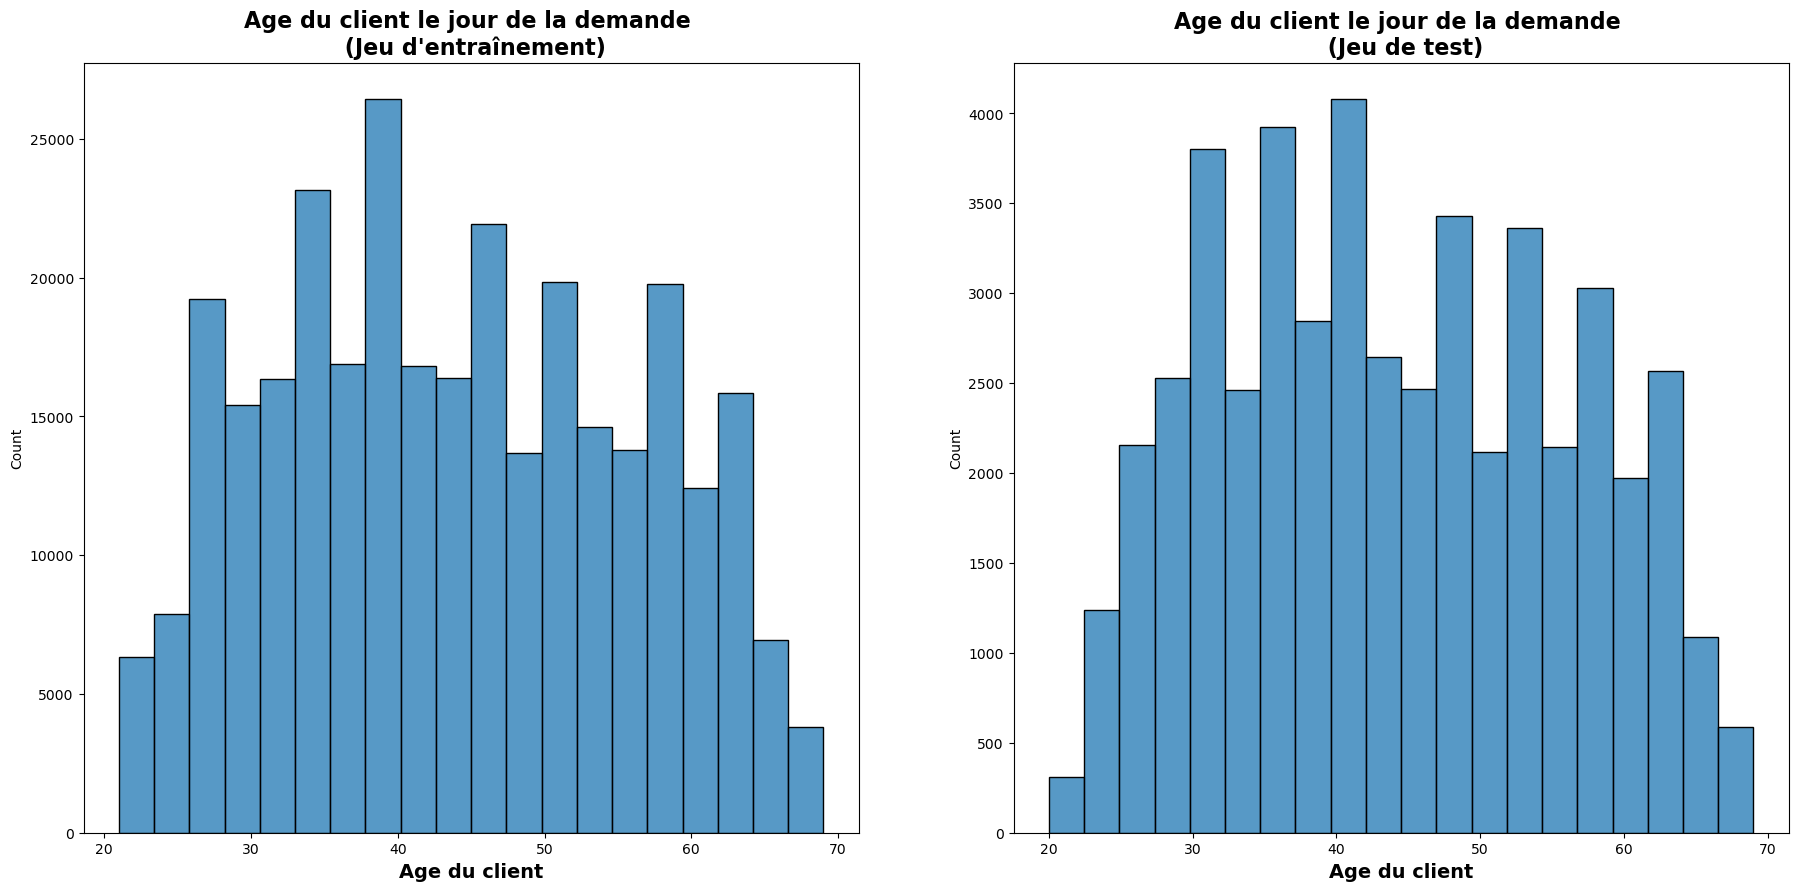

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.histplot(ax=axes[0], data= train, x="AGE", bins=20)
    axes[0].set_xlabel("Age du client", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_title("Age du client le jour de la demande \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.histplot(ax=axes[1], data= test, x="AGE", bins=20)
    axes[1].set_xlabel("Age du client", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_title("Age du client le jour de la demande \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show()                

**4. ELIMINATION DE LA VARIABLE D'ORIGINE**

**La variable initiale étant devenant inutile, cette dernière peut être éliminée des 2 jeux de données.**

In [27]:
# Elimination dans le jeu d'entraînement
train = train.drop("DAYS_BIRTH", axis=1)

# Elimination dans le jeu de test
test = test.drop("DAYS_BIRTH", axis= 1)

### 3. Le statut familial

In [28]:
print("Statut familial de chaque client dans le jeu d'entraînement")
print(train["NAME_FAMILY_STATUS"].value_counts(normalize=True))
print("----------------------------------------------------------")
print("Statut familial de chaque client dans le jeu test")
print(test["NAME_FAMILY_STATUS"].value_counts(normalize=True))

Statut familial de chaque client dans le jeu d'entraînement
NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64
----------------------------------------------------------
Statut familial de chaque client dans le jeu test
NAME_FAMILY_STATUS
Married                 0.662297
Single / not married    0.144346
Civil marriage          0.087416
Separated               0.060623
Widow                   0.045318
Name: proportion, dtype: float64


- **Nous pouvons remarquer qu'environ 65% des clients sont mariés. Pour ces derniers, les données 'Married' et 'Civil Marriage' seront regroupées car le principal est de savoir si le client est marié ou non.**
- **Dans le jeu de données d'entraînement, nous avons 2 clients dont le statut familial est non renseigné. Ces données seront 'injectées' ultérieurement dans la catégorie jugée la plus à risque.**

**Regroupement des 'Married' and 'Civil marriage'**

In [29]:
# Feature engineering dans le jeu d'entraînement

marriage_train = train[(train["NAME_FAMILY_STATUS"] == "Married") | (train["NAME_FAMILY_STATUS"] == "Civil marriage")]

for idx in marriage_train.index:
    train.loc[idx, "NAME_FAMILY_STATUS"] = "Married"
    
# Feature engineering dans le jeu de test

marriage_test = test[(test["NAME_FAMILY_STATUS"] == "Married") | (test["NAME_FAMILY_STATUS"] == "Civil marriage")]

for idx in marriage_test.index:
    test.loc[idx, "NAME_FAMILY_STATUS"] = "Married"

### 4. Nombre d'enfants du client

**Cette variable ne présente pas de donnée manquante.**

In [30]:
print("Nombre d'enfants de chaque client dans le jeu d'entraînement")
print(train["CNT_CHILDREN"].value_counts(normalize=True))
print("----------------------------------------------------------")
print("Nombre d'enfants de chaque client dans le jeu test")
print(test["CNT_CHILDREN"].value_counts(normalize=True))

Nombre d'enfants de chaque client dans le jeu d'entraînement
CNT_CHILDREN
0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: proportion, dtype: float64
----------------------------------------------------------
Nombre d'enfants de chaque client dans le jeu test
CNT_CHILDREN
0     0.711575
1     0.194978
2     0.081015
3     0.010976
4     0.001005
5     0.000246
8     0.000062
6     0.000062
11    0.000041
7     0.000021
20    0.000021
Name: proportion, dtype: float64


- **Plusieurs points sont à retenir:**
    - **Plus de 70% des clients n'ont pas d'enfant, quasi 20% en possèdent 1 et 8-9% en possèdent 2.**
    - **Les clients possédant plus de 3 enfants ou plus ne représentent qu'environ 1% du jeu de données.**
- **Répartition équitable entre les 2 jeux de données.**

### 5. Nombre de membres dans la famille

**ATTENTION: Présence de valeurs manquantes dans le jeu d'entraînement (2)**

In [31]:
print("Nombre de membres dans la famille du client dans le jeu d'entraînement")
print(train["CNT_FAM_MEMBERS"].value_counts(normalize=True))
print("----------------------------------------------------------")
print("Nombre de membres dans la famille du client dans le jeu de test")
print(test["CNT_FAM_MEMBERS"].value_counts(normalize=True))

Nombre de membres dans la famille du client dans le jeu d'entraînement
CNT_FAM_MEMBERS
2.0     0.514967
1.0     0.220634
3.0     0.171055
4.0     0.080313
5.0     0.011310
6.0     0.001327
7.0     0.000263
8.0     0.000065
9.0     0.000020
10.0    0.000010
14.0    0.000007
12.0    0.000007
20.0    0.000007
16.0    0.000007
13.0    0.000003
15.0    0.000003
11.0    0.000003
Name: proportion, dtype: float64
----------------------------------------------------------
Nombre de membres dans la famille du client dans le jeu de test
CNT_FAM_MEMBERS
2.0     0.534507
1.0     0.210303
3.0     0.167672
4.0     0.075702
5.0     0.010504
6.0     0.000882
7.0     0.000246
10.0    0.000062
8.0     0.000041
13.0    0.000041
9.0     0.000021
21.0    0.000021
Name: proportion, dtype: float64


**Comme mentionné dans le précédent notebook, d'un point de vue métier, il est inenvisageable d'imputer les données manquantes par des valeurs présentes dans la variable. En effet, ceci peut engendrer de grosses erreurs dans la modélisation. C'est pourquoi, il est d'usage de réaliser une imputation par une valeur fictive. Par conséquent, pour l'ensemble des variables numériques ne possédant que des valeurs positives, l'imputation sera réalisée par la valeur -2 (comme précédemment).**

In [32]:
train["CNT_FAM_MEMBERS"] = train["CNT_FAM_MEMBERS"].fillna(value=-2)

### 6. Le niveau d'études

**Cette variable ne présente pas de donnée manquante.**

In [33]:
print("Niveau d'études de chaque client dans le jeu d'entraînement")
print(train["NAME_EDUCATION_TYPE"].value_counts(normalize=True))
print("----------------------------------------------------------")
print("Niveau d'études de chaque client dans le jeu de test")
print(test["NAME_EDUCATION_TYPE"].value_counts(normalize=True))

Niveau d'études de chaque client dans le jeu d'entraînement
NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64
----------------------------------------------------------
Niveau d'études de chaque client dans le jeu de test
NAME_EDUCATION_TYPE
Secondary / secondary special    0.697276
Higher education                 0.256770
Incomplete higher                0.035368
Lower secondary                  0.009745
Academic degree                  0.000841
Name: proportion, dtype: float64


**Nous pouvons remarquer qu'environ 70% des clients n'ont pas réalisé d'études universitaires.**

### 7. Possession d'un bien immobilier

**Cette variable ne présente pas de donnée manquante.**

In [34]:
print("Possession d'un bien immobilier dans le jeu d'entraînement")
print(train["FLAG_OWN_REALTY"].value_counts(normalize=True))
print("----------------------------------------------------------")
print("Possession d'un bien immobilier dans le jeu de test")
print(test["FLAG_OWN_REALTY"].value_counts(normalize=True))

Possession d'un bien immobilier dans le jeu d'entraînement
FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64
----------------------------------------------------------
Possession d'un bien immobilier dans le jeu de test
FLAG_OWN_REALTY
Y    0.690505
N    0.309495
Name: proportion, dtype: float64


**Nous pouvons remarquer une répartition très équitable entre les 2 jeux de données, avec plus de 2/3 des clients possédant un bien immobilier.**

**ENCODAGE MANUEL POUR LA POSSESSION OU NON D'UN BIEN IMMOBILIER**

In [35]:
# Encodage manuel des N (0) et Y (1) dans les 2 jeux de données
train["FLAG_OWN_REALTY"] = train["FLAG_OWN_REALTY"].replace({"N": 0, "Y": 1})
test["FLAG_OWN_REALTY"] = test["FLAG_OWN_REALTY"].replace({"N": 0, "Y": 1})

### 8. Type de bien immobilier

**Cette variable ne présente pas de donnée manquante.**

In [36]:
print("Type de bien immobilier du client dans le jeu d'entraînement")
print(train["NAME_HOUSING_TYPE"].value_counts(normalize=True))
print("------------------------------------------------------------")
print("Type de bien immobilier du client dans le jeu de test")
print(test["NAME_HOUSING_TYPE"].value_counts(normalize=True))

Type de bien immobilier du client dans le jeu d'entraînement
NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64
------------------------------------------------------------
Type de bien immobilier du client dans le jeu de test
NAME_HOUSING_TYPE
House / apartment      0.895392
With parents           0.045831
Municipal apartment    0.033173
Rented apartment       0.014730
Office apartment       0.008350
Co-op apartment        0.002523
Name: proportion, dtype: float64


**Nous pouvons remarquer qu'environ 90% des clients habitent dans une maison ou un appartement 'classique'.**

### 9. Possession d'une voiture

**Cette variable ne présente pas de donnée manquante.**

In [37]:
print("Possession d'une voiture dans le jeu d'entraînement")
print(f'{train["FLAG_OWN_CAR"].value_counts(normalize=True)}')
print("------------------------------------------------------------")
print("Répartitition d'une voiture dans le jeu de test")
print(f'{test["FLAG_OWN_CAR"].value_counts(normalize= True)}')

Possession d'une voiture dans le jeu d'entraînement
FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64
------------------------------------------------------------
Répartitition d'une voiture dans le jeu de test
FLAG_OWN_CAR
N    0.662871
Y    0.337129
Name: proportion, dtype: float64


**Environ 1/3 des clients possède une voiture.**

**ENCODAGE MANUEL POUR LA POSSESSION OU NON D'UNE VOITURE**

In [38]:
# Encodage manuel des N (0) et Y (1) dans les 2 jeux de données
train["FLAG_OWN_CAR"] = train["FLAG_OWN_CAR"].replace({"N": 0, "Y": 1})
test["FLAG_OWN_CAR"] = test["FLAG_OWN_CAR"].replace({"N": 0, "Y": 1})

### 10. Age de la voiture

**Comme cette variable ne concerne que les clients possédant une voiture, nous sommes donc confrontés à quasiment 2/3 de 'fausses' données manquantes. De plus, il est à noter que l'âge de la voiture n'est pas renseigné pour 5 clients dans le jeu de données d'entraînement.**

In [39]:
print("Description de la variable Age de la voiture dans le jeu d'entraînement")
print(train["OWN_CAR_AGE"].describe())
print("------------------------------------------------------------------------")
print("Description de la variable Age de la voiture dans le jeu de test")
print(test["OWN_CAR_AGE"].describe())

Description de la variable Age de la voiture dans le jeu d'entraînement
count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64
------------------------------------------------------------------------
Description de la variable Age de la voiture dans le jeu de test
count    16432.000000
mean        11.786027
std         11.462889
min          0.000000
25%          4.000000
50%          9.000000
75%         15.000000
max         74.000000
Name: OWN_CAR_AGE, dtype: float64


**Des voitures sont très anciennes!!! Pour le moment, aucune imputation ne sera réalisée pour les valeurs manquantes, la variable ayant peu de chance d'être conservée.**

### 11. L'âge du téléphone

**Cette variable étant exprimée de la même façon que l'âge du client, elle sera retraitée de façon similaire (multiplication par -1 et division par 365).**

**1. CREATION DE LA NOUVELLE VARIABLE**

In [40]:
# Création de la variable dans le jeu d'entrainement
train["YEARS_LAST_PHONE_CHANGE"] = round(train["DAYS_LAST_PHONE_CHANGE"]*-1/365, 0)

In [41]:
# Création de la variable dans le jeu de test
test["YEARS_LAST_PHONE_CHANGE"] = round(test["DAYS_LAST_PHONE_CHANGE"]*-1/365, 0)

**2. VERIFICATION DE L'ABSENCE D'ANOMALIE**

In [42]:
print("Description de la variable âge du téléphone dans le jeu de données d'entraînement")
print(train["YEARS_LAST_PHONE_CHANGE"].describe())
print("---------------------------------------------------------------------")
print("Description de la variable âge du téléphone dans le jeu de données test")
print(test["YEARS_LAST_PHONE_CHANGE"].describe())

Description de la variable âge du téléphone dans le jeu de données d'entraînement
count    307510.000000
mean          2.632870
std           2.281344
min          -0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64
---------------------------------------------------------------------
Description de la variable âge du téléphone dans le jeu de données test
count    48744.000000
mean         2.964673
std          2.425761
min         -0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


**Il semblerait y avoir des valeurs négatives: très étrange. Une vérification s'impose donc.**

In [43]:
# Nombre d'anomalies dans le jeu d'entraînement
anomalie_anciennete_phone_train = train[train["YEARS_LAST_PHONE_CHANGE"] < 0]

In [44]:
print(f"Le jeu d'entraînement présente {anomalie_anciennete_phone_train.shape[0]} anomalie(s) pour cette variable.")

Le jeu d'entraînement présente 0 anomalie(s) pour cette variable.


In [45]:
# Nombre d'anomalies dans les jeu de test
anomalie_anciennete_phone_test = test[test["YEARS_LAST_PHONE_CHANGE"] < 0]

In [46]:
print(f"Le jeu d'entraînement présente {anomalie_anciennete_phone_test.shape[0]} anomalie(s) pour cette variable.")

Le jeu d'entraînement présente 0 anomalie(s) pour cette variable.


**3. VISUALISATION PAR BOXPLOT**

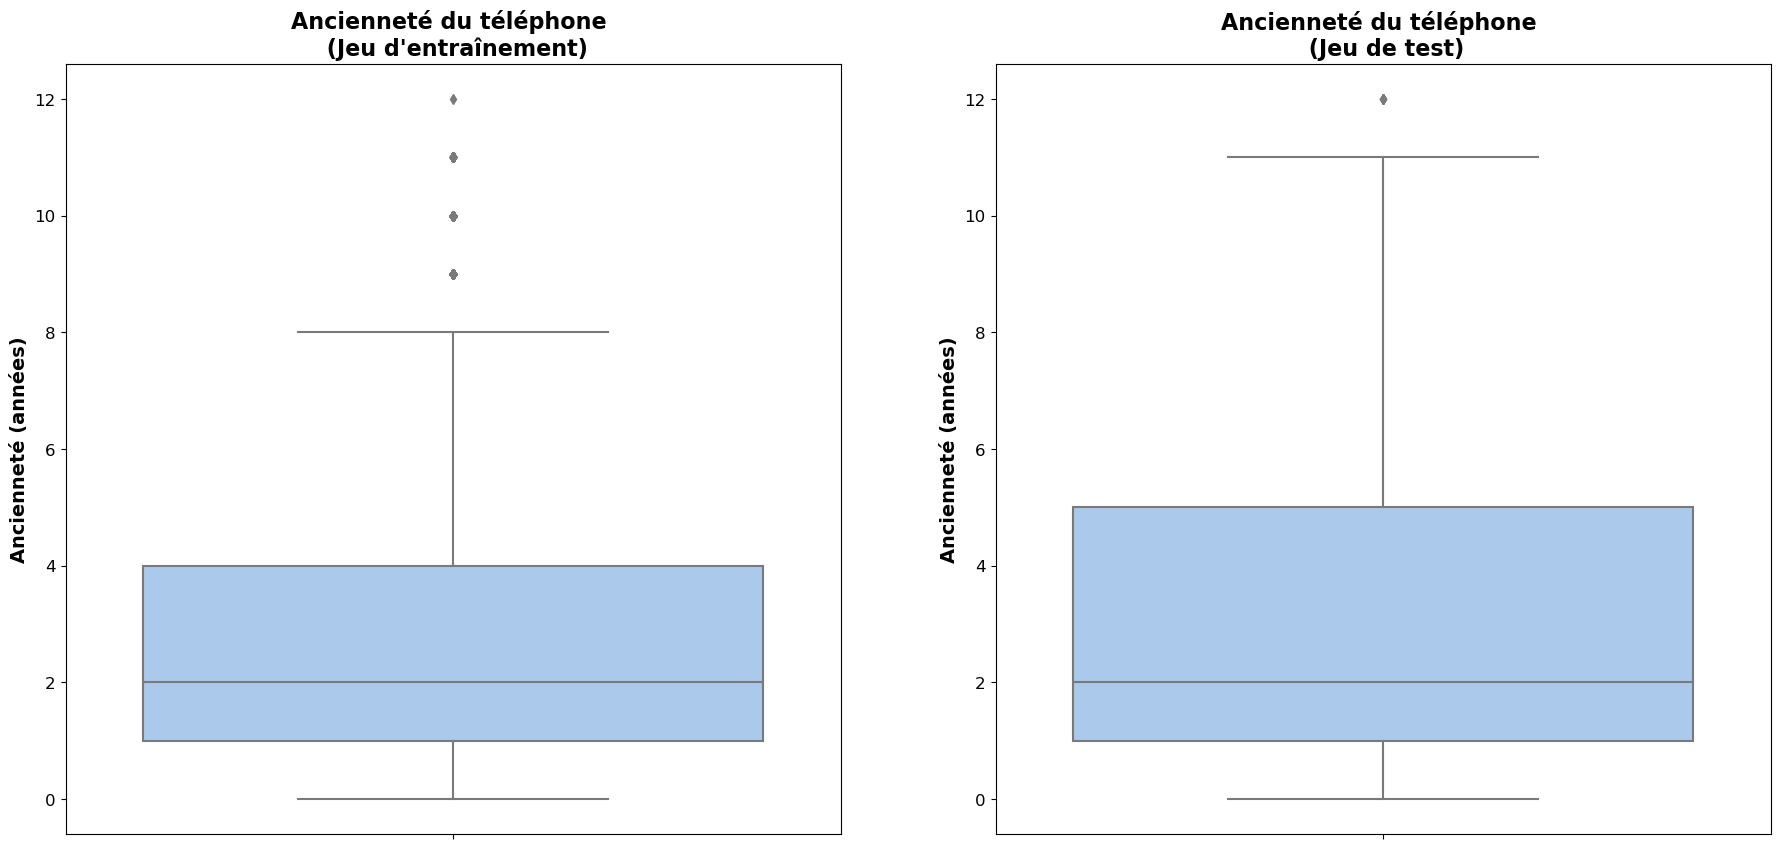

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0], data= train, y="YEARS_LAST_PHONE_CHANGE")
    axes[0].set_ylabel("Ancienneté (années)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_title("Ancienneté du téléphone \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1], data= test, y="YEARS_LAST_PHONE_CHANGE")
    axes[1].set_ylabel("Ancienneté (années)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_title("Ancienneté du téléphone \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show() 

**4. IMPUTATION DE LA VALEUR MANQUANTE DANS LE TRAIN PAR -2**

In [48]:
train["YEARS_LAST_PHONE_CHANGE"] = train["YEARS_LAST_PHONE_CHANGE"].fillna(value=-2)

**5. ELIMINATION DE LA VARIABLE D'ORIGINE**

**La variable initiale étant devenue inutile, cette dernière sera éliminée des 2 jeux de données.**

In [49]:
# Elimination du jeu d'entraînement
train = train.drop("DAYS_LAST_PHONE_CHANGE", axis = 1)

# Elimination du jeu de test
test = test.drop("DAYS_LAST_PHONE_CHANGE", axis = 1)

### 12. Secteurs d'activités

**Concernant cette variable, 2 opérations seront nécessaires:**
- **Remplacement des 'XNA' par 'Unknown'**
- **Remplacement des valeurs manquantes par 'Unknown'**

**1. OPERATIONS AVANT ANALYSE**

In [50]:
# Remplacement dans le jeu d'entraînement
train_unknown_organization_type = train[(train["ORGANIZATION_TYPE"]== "XNA") | (train["ORGANIZATION_TYPE"].isna())]

for index in train_unknown_organization_type.index:
    train.loc[index, "ORGANIZATION_TYPE"] = "Unknown" 

In [51]:
# Remplacement dans le jeu de test
test_unknown_organization_type = test[(test["ORGANIZATION_TYPE"]== "XNA") | (test["ORGANIZATION_TYPE"].isna())]

for index in test_unknown_organization_type.index:
    test.loc[index, "ORGANIZATION_TYPE"] = "Unknown" 

In [52]:
print("Secteur d'activités des clients dans le jeu d'entraînement")
print(f'{train["ORGANIZATION_TYPE"].value_counts(normalize=True)}')
print("------------------------------------------------------------")
print("Secteur d'activités des clients dans le jeu de test")
print(f'{test["ORGANIZATION_TYPE"].value_counts(normalize= True)}')

Secteur d'activités des clients dans le jeu d'entraînement
ORGANIZATION_TYPE
Business Entity Type 3    0.221104
Unknown                   0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2

**Nous avons beaucoup trop de secteurs d'activités, avec en plus peu de données. Par conséquent, du feature engineering est indispensable et peut aisément être réalisé. Le regroupement sera réalisé comme suit:**
- **Gouvernement, Sécurité et Services publics**: Government, Military, Police, Security Ministries, Emergency, Security et Legal Services
- **Éducation, Santé et Services sociaux**: Medicine, School, Kindergarten, University, Culture et Religion
- **Commerce, Finance, Services et business**: Trade: type 1, 2, 3, 4, 5, 6, 7, , Bank, Insurance, Realtor, Restaurant, Hotel, Services, Telecom, Mobile, Postal, Advertising, Cleaning, Business Entity Type 1, 2, 3 et Transport: type 1, 2, 3, 4
- **Industrie, Construction et Agriculture:** All "Industry" types (1-13), Construction, Agriculture, Electricity, Housing
- **Entrepreneuriat**: Self employed
- **Divers**: Other et Unknown

In [53]:
# Gouvernement, Sécurité et Services publiques dans le jeu d'entraînement

securite_train = train[(train["ORGANIZATION_TYPE"] == "Government") | (train["ORGANIZATION_TYPE"] == "Military") |
                 (train["ORGANIZATION_TYPE"] == "Police") | (train["ORGANIZATION_TYPE"] == "Security Ministries") |
                 (train["ORGANIZATION_TYPE"] == "Emergency") | (train["ORGANIZATION_TYPE"] == "Security") |
                 (train["ORGANIZATION_TYPE"] == "Legal Services")]

for idx in securite_train.index:
    train.loc[idx, "ORGANIZATION_TYPE"] = "Gouvernement, Securite et Services publics"
    
# Gouvernement, Sécurité et Services publiques dans le jeu de test
securite_test = test[(test["ORGANIZATION_TYPE"] == "Government") | (test["ORGANIZATION_TYPE"] == "Military") |
                 (test["ORGANIZATION_TYPE"] == "Police") | (test["ORGANIZATION_TYPE"] == "Security Ministries") |
                 (test["ORGANIZATION_TYPE"] == "Emergency") | (test["ORGANIZATION_TYPE"] == "Security") |
                 (test["ORGANIZATION_TYPE"] == "Legal Services")]

for idx in securite_test.index:
    test.loc[idx, "ORGANIZATION_TYPE"] = "Gouvernement, Securite et Services publics"

In [54]:
# Éducation, Santé et Services Sociaux dans le jeu d'entraînement
sante_train = train[(train["ORGANIZATION_TYPE"] == "Medicine") | (train["ORGANIZATION_TYPE"] == "School") |
                    (train["ORGANIZATION_TYPE"] == "Kindergarten") | (train["ORGANIZATION_TYPE"] == "University") |
                    (train["ORGANIZATION_TYPE"] == "Culture") | (train["ORGANIZATION_TYPE"] == "Religion")]

for idx in sante_train.index:
    train.loc[idx, "ORGANIZATION_TYPE"] = "Sante, education et religion"
    
# Éducation, Santé et Services Sociaux dans le jeu de test
sante_test = test[(test["ORGANIZATION_TYPE"] == "Medicine") | (test["ORGANIZATION_TYPE"] == "School") |
                    (test["ORGANIZATION_TYPE"] == "Kindergarten") | (test["ORGANIZATION_TYPE"] == "University") |
                    (test["ORGANIZATION_TYPE"] == "Culture") | (test["ORGANIZATION_TYPE"] == "Religion")]

for idx in sante_test.index:
    test.loc[idx, "ORGANIZATION_TYPE"] = "Sante, education et religion"

In [55]:
# Commerce, Finance, Services et business dans le jeu d'entraînement
commerce_train = train[(train["ORGANIZATION_TYPE"] == "Trade: type 1") | (train["ORGANIZATION_TYPE"] == "Trade: type 2") |
                 (train["ORGANIZATION_TYPE"] == "Trade: type 3") | (train["ORGANIZATION_TYPE"] == "Trade: type 4") |
                 (train["ORGANIZATION_TYPE"] == "Trade: type 5") | (train["ORGANIZATION_TYPE"] == "Trade: type 6") |
                 (train["ORGANIZATION_TYPE"] == "Trade: type 7") | (train["ORGANIZATION_TYPE"] == "Bank") |
                 (train["ORGANIZATION_TYPE"] == "Insurance") | (train["ORGANIZATION_TYPE"] == "Realtor") |
                 (train["ORGANIZATION_TYPE"] == "Restaurant") | (train["ORGANIZATION_TYPE"] == "Hotel") |
                 (train["ORGANIZATION_TYPE"] == "Services") | (train["ORGANIZATION_TYPE"] == "Telecom") |
                 (train["ORGANIZATION_TYPE"] == "Mobile") | (train["ORGANIZATION_TYPE"] == "Postal") |
                 (train["ORGANIZATION_TYPE"] == "Advertising") | (train["ORGANIZATION_TYPE"] == "Cleaning") |
                 (train["ORGANIZATION_TYPE"] == "Business Entity Type 1") | (train["ORGANIZATION_TYPE"] == "Business Entity Type 2") |
                 (train["ORGANIZATION_TYPE"] == "Business Entity Type 3") | (train["ORGANIZATION_TYPE"] == "Business Entity Type 2") |
                 (train["ORGANIZATION_TYPE"] == "Transport: type 1") | (train["ORGANIZATION_TYPE"] == "Transport: type 2") |
                 (train["ORGANIZATION_TYPE"] == "Transport: type 3") | (train["ORGANIZATION_TYPE"] == "Transport: type 4")]

for idx in commerce_train.index:
    train.loc[idx, "ORGANIZATION_TYPE"] = "Commerce, finance, services et business"
    
# Commerce, Finance, Services et business dans le jeu de test
commerce_test = test[(test["ORGANIZATION_TYPE"] == "Trade: type 1") | (test["ORGANIZATION_TYPE"] == "Trade: type 2") |
                 (test["ORGANIZATION_TYPE"] == "Trade: type 3") | (test["ORGANIZATION_TYPE"] == "Trade: type 4") |
                 (test["ORGANIZATION_TYPE"] == "Trade: type 5") | (test["ORGANIZATION_TYPE"] == "Trade: type 6") |
                 (test["ORGANIZATION_TYPE"] == "Trade: type 7") | (test["ORGANIZATION_TYPE"] == "Bank") |
                 (test["ORGANIZATION_TYPE"] == "Insurance") | (test["ORGANIZATION_TYPE"] == "Realtor") |
                 (test["ORGANIZATION_TYPE"] == "Restaurant") | (test["ORGANIZATION_TYPE"] == "Hotel") |
                 (test["ORGANIZATION_TYPE"] == "Services") | (test["ORGANIZATION_TYPE"] == "Telecom") |
                 (test["ORGANIZATION_TYPE"] == "Mobile") | (test["ORGANIZATION_TYPE"] == "Postal") |
                 (test["ORGANIZATION_TYPE"] == "Advertising") | (test["ORGANIZATION_TYPE"] == "Cleaning") |
                 (test["ORGANIZATION_TYPE"] == "Business Entity Type 1") | (test["ORGANIZATION_TYPE"] == "Business Entity Type 2") |
                 (test["ORGANIZATION_TYPE"] == "Business Entity Type 3") | (test["ORGANIZATION_TYPE"] == "Business Entity Type 2") |
                 (test["ORGANIZATION_TYPE"] == "Transport: type 1") | (test["ORGANIZATION_TYPE"] == "Transport: type 2") |
                 (test["ORGANIZATION_TYPE"] == "Transport: type 3") | (test["ORGANIZATION_TYPE"] == "Transport: type 4")]

for idx in commerce_test.index:
    test.loc[idx, "ORGANIZATION_TYPE"] = "Commerce, finance, services et business"

In [56]:
# Industrie, Construction et Agriculture dans le jeu d'entraînement

industrie_train = train[(train["ORGANIZATION_TYPE"]=="Industry: type 1") | (train["ORGANIZATION_TYPE"]=="Industry: type 2") |
                      (train["ORGANIZATION_TYPE"]=="Industry: type 3") | (train["ORGANIZATION_TYPE"]=="Industry: type 4") |
                      (train["ORGANIZATION_TYPE"]=="Industry: type 5") | (train["ORGANIZATION_TYPE"]=="Industry: type 6")|
                      (train["ORGANIZATION_TYPE"]=="Industry: type 7") | (train["ORGANIZATION_TYPE"]=="Industry: type 8") |
                      (train["ORGANIZATION_TYPE"]=="Industry: type 9") | (train["ORGANIZATION_TYPE"]=="Industry: type 10") |
                      (train["ORGANIZATION_TYPE"]=="Industry: type 11") | (train["ORGANIZATION_TYPE"]=="Industry: type 12") |
                      (train["ORGANIZATION_TYPE"]=="Industry: type 13") | (train["ORGANIZATION_TYPE"]=="Agriculture") |
                      (train["ORGANIZATION_TYPE"]=="Construction") | (train["ORGANIZATION_TYPE"]=="Housing") |
                      (train["ORGANIZATION_TYPE"] == "Electricity")]

for idx in industrie_train.index:
    train.loc[idx, "ORGANIZATION_TYPE"] = "Industrie, construction et agriculture"
    
# Industrie, Construction et Agriculture dans le jeu de test

industrie_test = test[(test["ORGANIZATION_TYPE"]=="Industry: type 1") | (test["ORGANIZATION_TYPE"]=="Industry: type 2") |
                      (test["ORGANIZATION_TYPE"]=="Industry: type 3") | (test["ORGANIZATION_TYPE"]=="Industry: type 4") |
                      (test["ORGANIZATION_TYPE"]=="Industry: type 5") | (test["ORGANIZATION_TYPE"]=="Industry: type 6")|
                      (test["ORGANIZATION_TYPE"]=="Industry: type 7") | (test["ORGANIZATION_TYPE"]=="Industry: type 8") |
                      (test["ORGANIZATION_TYPE"]=="Industry: type 9") | (test["ORGANIZATION_TYPE"]=="Industry: type 10") |
                      (test["ORGANIZATION_TYPE"]=="Industry: type 11") | (test["ORGANIZATION_TYPE"]=="Industry: type 12") |
                      (test["ORGANIZATION_TYPE"]=="Industry: type 13") | (test["ORGANIZATION_TYPE"]=="Agriculture") |
                      (test["ORGANIZATION_TYPE"]=="Construction") | (test["ORGANIZATION_TYPE"]=="Housing") |
                      (test["ORGANIZATION_TYPE"] == "Electricity")]

for idx in industrie_test.index:
    test.loc[idx, "ORGANIZATION_TYPE"] = "Industrie, construction et agriculture"

In [57]:
# Self employed dans le jeu d'entraînement

self_employed_train = train[(train["ORGANIZATION_TYPE"] == "Self-employed")]

for idx in self_employed_train.index:
    train.loc[idx, "ORGANIZATION_TYPE"] = "Self employed"
    
# Self employed dans le jeu test
self_employed_test = test[(test["ORGANIZATION_TYPE"] == "Self-employed")]

for idx in self_employed_test.index:
    test.loc[idx, "ORGANIZATION_TYPE"] = "Self employed"

In [58]:
# Divers dans le jeu d'entraînement

divers_train = train[(train["ORGANIZATION_TYPE"] == "Unknown") | (train["ORGANIZATION_TYPE"] == "Other")]

for idx in divers_train.index:
    train.loc[idx, "ORGANIZATION_TYPE"] = "Divers"
    
# Divers dans le jeu de test

divers_test = test[(test["ORGANIZATION_TYPE"] == "Unknown") | (test["ORGANIZATION_TYPE"] == "Other")]

for idx in divers_test.index:
    test.loc[idx, "ORGANIZATION_TYPE"] = "Divers"

In [59]:
print("Secteur d'activités des clients dans le jeu d'entraînement après feature engineering")
print(f'{train["ORGANIZATION_TYPE"].value_counts(normalize=True)}')
print("------------------------------------------------------------------------------------")
print("Secteur d'activités des clients dans le jeu test après feature engineering")
print(f'{test["ORGANIZATION_TYPE"].value_counts(normalize= True)}')

Secteur d'activités des clients dans le jeu d'entraînement après feature engineering
ORGANIZATION_TYPE
Commerce, finance, services et business       0.388363
Divers                                        0.234323
Self employed                                 0.124913
Sante, education et religion                  0.093515
Industrie, construction et agriculture        0.089083
Gouvernement, Securite et Services publics    0.069802
Name: proportion, dtype: float64
------------------------------------------------------------------------------------
Secteur d'activités des clients dans le jeu test après feature engineering
ORGANIZATION_TYPE
Commerce, finance, services et business       0.387186
Divers                                        0.245794
Self employed                                 0.121451
Sante, education et religion                  0.088934
Industrie, construction et agriculture        0.086144
Gouvernement, Securite et Services publics    0.070491
Name: proportion, dtype: f

### 13. Métiers des clients

**Avant d'analyser cette variable, les valeurs manquantes seront remplacées par 'Unknown'.**

**1. REMPLACEMENT DES VALEURS MANQUANTES PAR UNKNOWN**

In [60]:
# Remplacement dans le jeu d'entraînement
train["OCCUPATION_TYPE"] = train["OCCUPATION_TYPE"].fillna(value='Unknown')

# Remplacement dans le jeu de test
test["OCCUPATION_TYPE"] = test["OCCUPATION_TYPE"].fillna(value='Unknown')

**2. ANALYSE DES METIERS PRESENTS**

In [61]:
print("Métiers des clients dans le jeu d'entraînement")
print(f'{train["OCCUPATION_TYPE"].value_counts(normalize=True)}')
print("------------------------------------------------------------")
print("Métiers des clients dans le jeu de test")
print(f'{test["OCCUPATION_TYPE"].value_counts(normalize= True)}')

Métiers des clients dans le jeu d'entraînement
OCCUPATION_TYPE
Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64
------------------------------------------------------------
Métiers des clients dans le jeu de test
OCCUPATION_TYPE
Unknown                  0.320142
Laborers                 0.177560
Sales staff              0.104054
Core staff               0.089467
Manag

**3. FEATURE ENGINEERING SUR LES METIERS**

**Comme pour le secteur d'activités, nous pouvons regrouper certains métiers, ce qui permettra non seulement d'avoir plus de données (meilleur apprentissage pour le ML) mais aussi moins de variables à encoder. Par conséquent, du feature engineering sera réalisé comme suit:**
- **Personnel administratif, de gestion et spécialisé**: Managers, Accountants, Secretaries, HR staff, Realty agents High skill, tech staff, IT staff, Medicine staff 
- **Personnel de vente et de service à la clientèle**: Sales staff, Waiters/barmen staff, Private service staff, Cooking staff
- **Personnel de sécurité, transport et logistique**: Drivers, Security staff, Core staff
- **Personnel manuel et d'entretien**: Laborers, Low-skill Laborers, Cleaning staff
- **Unknown**: Catégorie en elle-même

In [62]:
# Personnel administratif, de gestion et spécialisé dans le jeu d'entraînement

gestion_train = train[(train["OCCUPATION_TYPE"] == "Managers") | (train["OCCUPATION_TYPE"] == "Accountants") |
                      (train["OCCUPATION_TYPE"] == "Secretaries") | (train["OCCUPATION_TYPE"] == "HR staff") |
                      (train["OCCUPATION_TYPE"] == "Realty agents") | (train["OCCUPATION_TYPE"] == "High skill tech staff") |
                     (train["OCCUPATION_TYPE"] == "IT staff") | (train["OCCUPATION_TYPE"] == "Medicine staff")]

for idx in gestion_train.index:
    train.loc[idx, "EMPLOI"] = "Personnel administratif, de gestion et specialise"
    
# Personnel administratif, de gestion et spécialisé dans le jeu de test

gestion_test = test[(test["OCCUPATION_TYPE"] == "Managers") | (test["OCCUPATION_TYPE"] == "Accountants") |
                    (test["OCCUPATION_TYPE"] == "Secretaries") | (test["OCCUPATION_TYPE"] == "HR staff") |
                    (test["OCCUPATION_TYPE"] == "Realty agents") | (test["OCCUPATION_TYPE"] == "High skill tech staff") |
                    (test["OCCUPATION_TYPE"] == "IT staff") | (test["OCCUPATION_TYPE"] == "Medicine staff")]

for idx in gestion_test.index:
    test.loc[idx, "EMPLOI"] = "Personnel administratif, de gestion et specialise"

In [63]:
# Personnel de vente et de service à la clientèle dans le jeu d'entraînement

vente_train = train[(train["OCCUPATION_TYPE"] == "Sales staff") | (train["OCCUPATION_TYPE"] == "Waiters/barmen staff") |
                    (train["OCCUPATION_TYPE"] == "Private service staff") | (train["OCCUPATION_TYPE"] == "Cooking staff")]

for idx in vente_train.index:
    train.loc[idx, "EMPLOI"] = "Personnel de vente et de service client"
    
# Personnel de vente et de service à la clientèle dans le jeu de test

vente_test = test[(test["OCCUPATION_TYPE"] == "Sales staff") | (test["OCCUPATION_TYPE"] == "Waiters/barmen staff") |
                  (test["OCCUPATION_TYPE"] == "Private service staff") | (test["OCCUPATION_TYPE"] == "Cooking staff")]

for idx in vente_test.index:
    test.loc[idx, "EMPLOI"] = "Personnel de vente et de service client"

In [64]:
# Personnel de sécurité, transport et logistique dans le jeu d'entraînement

logistique_train = train[(train["OCCUPATION_TYPE"] == "Drivers") | (train["OCCUPATION_TYPE"] == "Security staff") |
                         (train["OCCUPATION_TYPE"] == "Core staff")]

for idx in logistique_train.index:
    train.loc[idx, "EMPLOI"] = "Personnel de securite, transport et logistique"
    
# Personnel de sécurité, transport et logistique dans le jeu d'entraînement

logistique_test = test[(test["OCCUPATION_TYPE"] == "Drivers") | (test["OCCUPATION_TYPE"] == "Security staff") |
                       (test["OCCUPATION_TYPE"] == "Core staff")]

for idx in logistique_test.index:
    test.loc[idx, "EMPLOI"] = "Personnel de securite, transport et logistique"

In [65]:
# Personnel manuel et d'entretien dans le jeu d'entraînement

manuel_train = train[(train["OCCUPATION_TYPE"] == "Laborers") | (train["OCCUPATION_TYPE"] == "Low-skill Laborers") |
                     (train["OCCUPATION_TYPE"] == "Cleaning staff")]

for idx in manuel_train.index:
    train.loc[idx, "EMPLOI"] = "Personnel manuel et entretien"
    
# Personnel manuel et d'entretien dans le jeu de test

manuel_test = test[(test["OCCUPATION_TYPE"] == "Laborers") | (test["OCCUPATION_TYPE"] == "Low-skill Laborers") |
                  (test["OCCUPATION_TYPE"] == "Cleaning staff")]

for idx in manuel_test.index:
    test.loc[idx, "EMPLOI"] = "Personnel manuel et entretien"

In [66]:
# Unknown dans le jeu d'entraînement

unknown_job_train = train[(train["OCCUPATION_TYPE"] == "Unknown")]
 
for idx in unknown_job_train.index:
    train.loc[idx, "EMPLOI"] = "Unknown"
    
# Unknown dans le jeu de test

unknown_job_test = test[(test["OCCUPATION_TYPE"] == "Unknown")]
 
for idx in unknown_job_test.index:
    test.loc[idx, "EMPLOI"] = "Unknown"

In [67]:
print("Métiers des clients dans le jeu d'entraînement après feature engineering")
print(f'{train["EMPLOI"].value_counts(normalize=True)}')
print("------------------------------------------------------------------------")
print("Métiers des clients dans le jeu test après feature engineering")
print(f'{test["EMPLOI"].value_counts(normalize= True)}')

Métiers des clients dans le jeu d'entraînement après feature engineering
EMPLOI
Unknown                                              0.313455
Personnel manuel et entretien                        0.201398
Personnel administratif, de gestion et specialise    0.176403
Personnel de securite, transport et logistique       0.172007
Personnel de vente et de service client              0.136737
Name: proportion, dtype: float64
------------------------------------------------------------------------
Métiers des clients dans le jeu test après feature engineering
EMPLOI
Unknown                                              0.320142
Personnel manuel et entretien                        0.196599
Personnel administratif, de gestion et specialise    0.182751
Personnel de securite, transport et logistique       0.165128
Personnel de vente et de service client              0.135381
Name: proportion, dtype: float64


### 14. Source de revenus

**Contrairement aux 2 précédentes variables, cette dernière ne présente aucune valeur manquante.**

In [68]:
print("Source de revenus des clients dans le jeu d'entraînement")
print(f'{train["NAME_INCOME_TYPE"].value_counts(normalize=True)}')
print("------------------------------------------------------------")
print("Source de revenus des clients dans le jeu test")
print(f'{test["NAME_INCOME_TYPE"].value_counts(normalize= True)}')

Source de revenus des clients dans le jeu d'entraînement
NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64
------------------------------------------------------------
Source de revenus des clients dans le jeu test
NAME_INCOME_TYPE
Working                 0.503303
Commercial associate    0.233916
Pensioner               0.190239
State servant           0.072460
Student                 0.000041
Businessman             0.000021
Unemployed              0.000021
Name: proportion, dtype: float64


**Nous pouvons constater qu'il y a très peu d'étudiants et de chômeurs, la majorité des clients étant des personnes actives. Néanmoins, nous avons environ 20% de retraités.**

### 15. Ancienneté dans le dernier métier

**Cette variable est représentée de façon similaire à l'âge. Ainsi, cette dernière sera multipliée par -1 et divisée par 365.**

**1. CREATION DES VARIABLES DANS LES 2 JEUX DE DONNEES**

In [69]:
# Création de la variable dans le jeu d'entrainement
train["YEARS_EMPLOYED"] = round(train["DAYS_EMPLOYED"]*-1/365, 1)

# Création de la variable dans le jeu de test
test["YEARS_EMPLOYED"] = round(test["DAYS_EMPLOYED"]*-1/365, 1)

**2. DESCRIPTION DE CETTE VARIABLE**

In [70]:
print("Description de l'ancienneté du client dans son dernier métier dans le jeu d'entraînement")
print(f'{train["YEARS_EMPLOYED"].describe()}')
print("---------------------------------------------------------------------------------------------")
print("Description de l'ancienneté du client dans son dernier métier dans le jeu de test")
print(f'{test["YEARS_EMPLOYED"].describe()}')

Description de l'ancienneté du client dans son dernier métier dans le jeu d'entraînement
count    307511.000000
mean       -174.841963
std         387.070028
min       -1000.700000
25%           0.800000
50%           3.300000
75%           7.600000
max          49.100000
Name: YEARS_EMPLOYED, dtype: float64
---------------------------------------------------------------------------------------------
Description de l'ancienneté du client dans son dernier métier dans le jeu de test
count    48744.000000
mean      -184.898002
std        395.488767
min      -1000.700000
25%          0.800000
50%          3.500000
75%          8.000000
max         47.800000
Name: YEARS_EMPLOYED, dtype: float64


**ATTENTION: Nous sommes en présence de valeurs aberrantes. En effet, il est impossible d'avoir des valeurs négatives et encore moins 1000 ans!!!**

In [71]:
# Nombre d'anomalies dans les jeux de données
anomalie_anciennete_train = train[train["YEARS_EMPLOYED"] < 0]
anomalie_anciennete_test = test[test["YEARS_EMPLOYED"] < 0]

print(f"Le jeu d'entraînement présente {anomalie_anciennete_train.shape[0]} anomalies pour cette variable.")
print("---------------------------------------------------------------------------------------------------")
print(f"Le jeu de test présente {anomalie_anciennete_test.shape[0]} anomalies pour cette variable.")

Le jeu d'entraînement présente 55374 anomalies pour cette variable.
---------------------------------------------------------------------------------------------------
Le jeu de test présente 9274 anomalies pour cette variable.


**ENORMISSIME!!!** Vu le nombre de clients concernés, il est inenvisageable de supprimer ces clients. Néanmoins, il est également hors de question d'imputer les valeurs par la médiane. En effet, d'un point de vue métier, cette anomalie peut avoir une signication particulière et une analyse de la raison de cette dernière sera recherchée par curiosité... Ainsi, l'analyse de quelques clients sur le jeu d'entraînement possédant cette valeur sera réalisée (il peut s'agir tout simplement d'une valeur fictive attribuée aux personnes sans emploi au moment du prêt).

In [72]:
anomalie_fictive = train[(train["YEARS_EMPLOYED"] < 0)]
anomalie_fictive.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,YEARS_LAST_PHONE_CHANGE,EMPLOI,YEARS_EMPLOYED
8,100011,0,Cash loans,1,0,1,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,365243,NaN,1,0,0,1,0,0,Unknown,2.0,2,2,0,0,0,0,0,0,Divers,0.587334,0.205747,0.751724,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.0,-0.0,Unknown,-1000.7
11,100015,0,Cash loans,1,0,1,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,365243,NaN,1,0,0,1,1,0,Unknown,2.0,2,2,0,0,0,0,0,0,Divers,0.722044,0.555183,0.652897,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.0,7.0,Unknown,-1000.7
23,100027,0,Cash loans,1,0,1,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,365243,NaN,1,0,0,1,1,0,Unknown,2.0,3,3,0,0,0,0,0,0,Divers,NaN,0.624305,0.669057,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68.0,2.0,Unknown,-1000.7
38,100045,0,Cash loans,1,0,1,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,365243,NaN,1,0,0,1,1,0,Unknown,2.0,2,2,0,0,0,0,0,0,Divers,NaN,0.650765,0.751724,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66.0,-0.0,Unknown,-1000.7
43,100050,0,Cash loans,1,0,1,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,365243,NaN,1,0,0,1,0,0,Unknown,1.0,2,2,0,0,0,0,0,0,Divers,NaN,0.766138,0.684828,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65.0,1.0,Unknown,-1000.7


**Les 10 premières lignes correspondent aux retraités!!!**

In [73]:
retraites_etudiant = anomalie_fictive[(anomalie_fictive["NAME_INCOME_TYPE"] == "Pensioner") | (anomalie_fictive["NAME_INCOME_TYPE"] == "Student")]
retraites_etudiant.shape[0]

55352

**Sur les 55374 clients concernés par cette valeur aberrante, 55352 sont des retraités ou des étudiants. Par conséquent, il s'agit vraiment d'une attribution d'une valeur fictive et non d'une anomalie... HEUREUSEMENT que pour cette variable, l'imputation par une valeur fictive était envisagée et non pas une imputation par la médiane!!!**

**3. IMPUTATION DES FAUSSES ANOMALIES PAR LA VALEUR -2**

In [74]:
# Remplacement dans le jeu d'entraînement
train.loc[train["YEARS_EMPLOYED"] < 0, "YEARS_EMPLOYED"] = -2

# Remplacement dans le jeu de test
test.loc[test["YEARS_EMPLOYED"] < 0, "YEARS_EMPLOYED"] = -2

In [75]:
print("Ancienneté du client dans son dernier métier dans le jeu d'entraînement après élimination des valeurs aberrantes")
print(f'{train["YEARS_EMPLOYED"].describe()}')
print("------------------------------------------------------------------------------------------------------------")
print("Ancienneté du client dans son dernier métier dans le jeu de test après élimination des valeurs aberrantes")
print(f'{test["YEARS_EMPLOYED"].describe()}')

Ancienneté du client dans son dernier métier dans le jeu d'entraînement après élimination des valeurs aberrantes
count    307511.000000
mean          4.995551
std           6.663397
min          -2.000000
25%           0.800000
50%           3.300000
75%           7.600000
max          49.100000
Name: YEARS_EMPLOYED, dtype: float64
------------------------------------------------------------------------------------------------------------
Ancienneté du client dans son dernier métier dans le jeu de test après élimination des valeurs aberrantes
count    48744.000000
mean         5.113975
std          6.653291
min         -2.000000
25%          0.800000
50%          3.500000
75%          8.000000
max         47.800000
Name: YEARS_EMPLOYED, dtype: float64


**4. VISUALISATION PAR BOXPLOT**

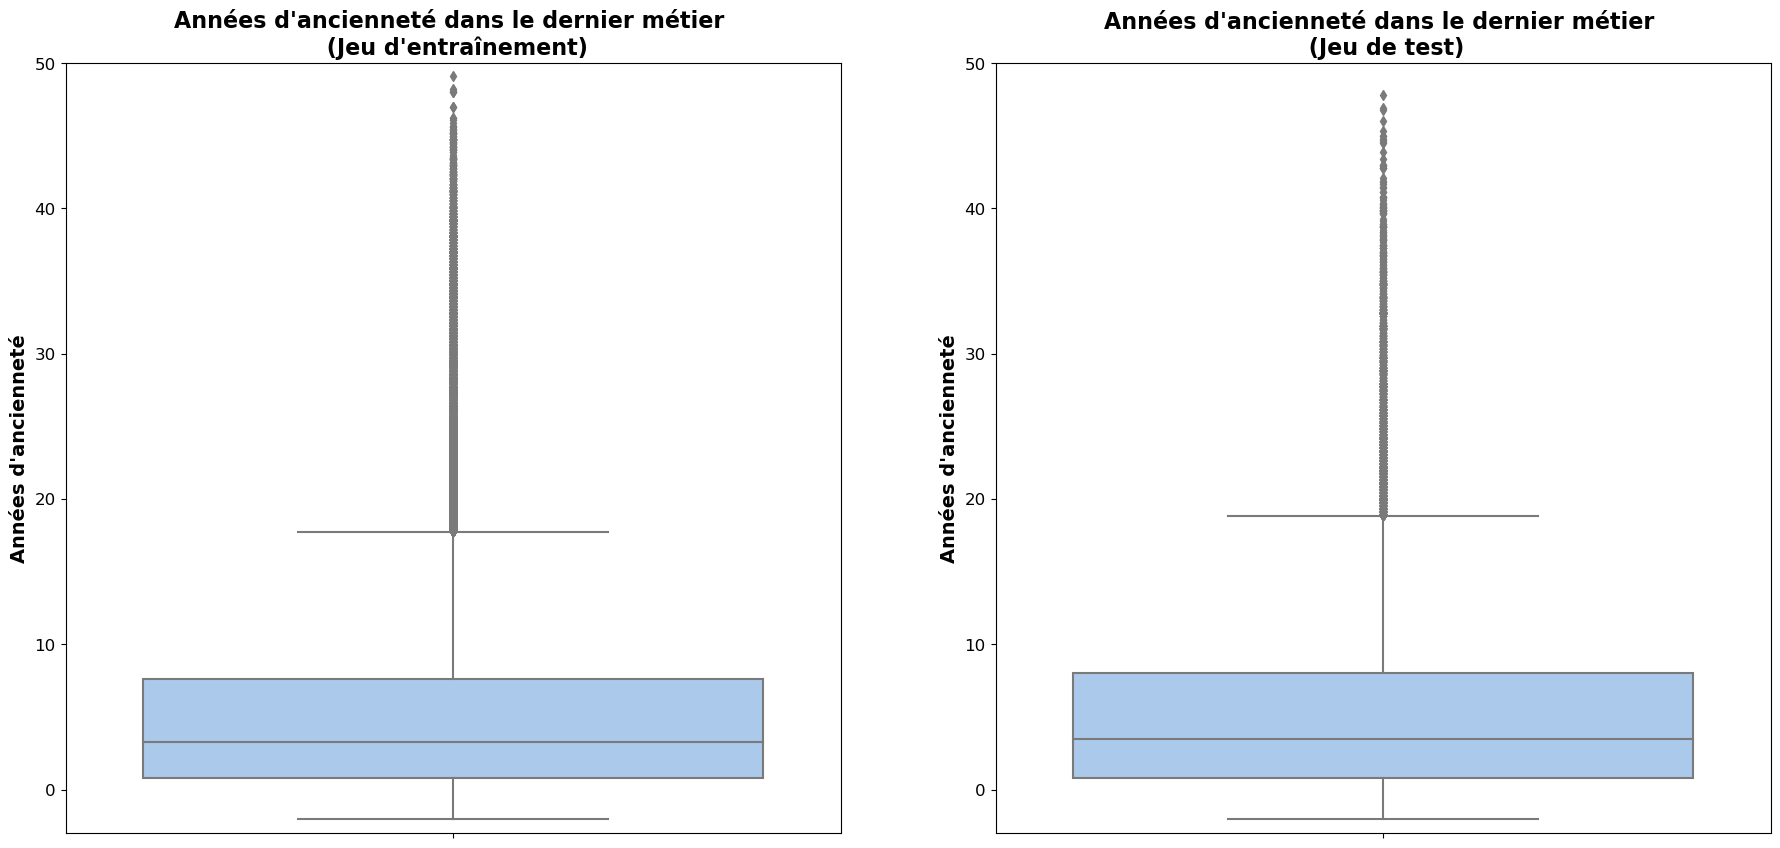

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0], data= train, y="YEARS_EMPLOYED")
    axes[0].set_ylabel("Années d'ancienneté", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_ylim(-3,50)
    axes[0].set_title("Années d'ancienneté dans le dernier métier \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1], data= test, y="YEARS_EMPLOYED")
    axes[1].set_ylabel("Années d'ancienneté", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_ylim(-3,50)
    axes[1].set_title("Années d'ancienneté dans le dernier métier \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show() 

**5. ELIMINATION DE LA VARIABLE D'ORIGINE**

In [77]:
# Elimination du jeu d'entraînement
train = train.drop("DAYS_EMPLOYED", axis = 1)

# Elimination du jeu de test
test = test.drop("DAYS_EMPLOYED", axis = 1)

### 16. Montant des revenus

**Pour rappel, cette variable ne présente aucune valeur manquante.**

In [78]:
print("Description du montant des revenus des clients dans le jeu d'entraînement")
print(f'{train["AMT_INCOME_TOTAL"].describe()}')
print("-------------------------------------------------------------------------")
print("Description du montant des revenus des clients dans le jeu de test")
print(f'{test["AMT_INCOME_TOTAL"].describe()}')

Description du montant des revenus des clients dans le jeu d'entraînement
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
-------------------------------------------------------------------------
Description du montant des revenus des clients dans le jeu de test
count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


**Nous pouvons remarquer la présence d'au moins un outlier dans le jeu d'entraînement. Afin de mieux appréhender cette variable, une visualisation par boxplot sera réalisée.**

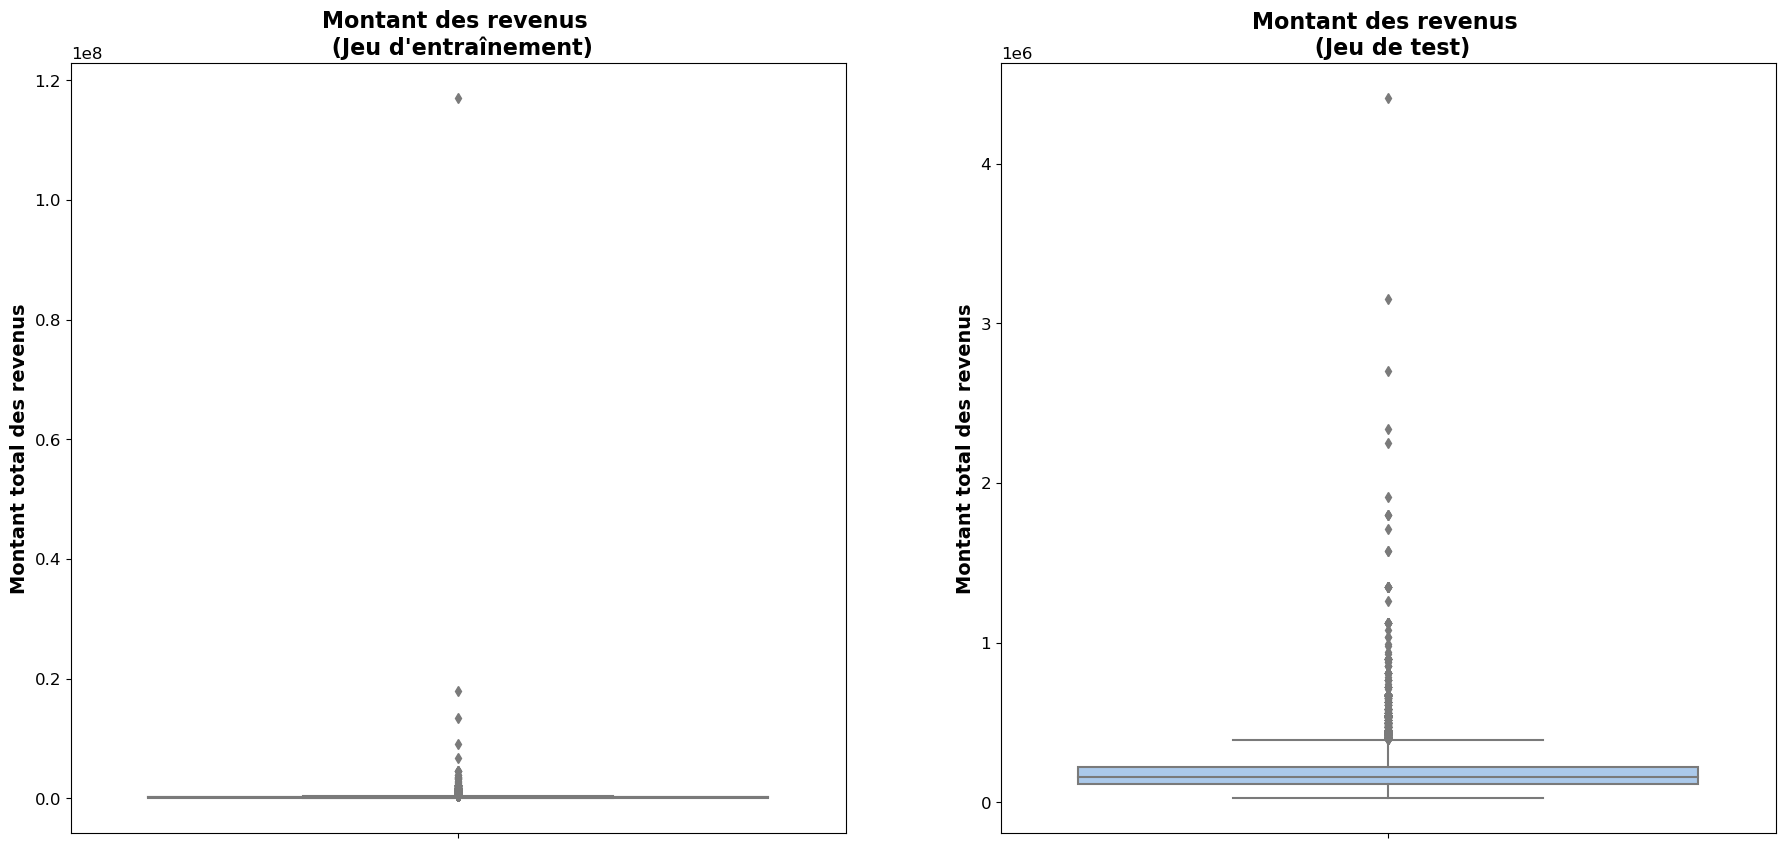

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0], data= train, y="AMT_INCOME_TOTAL")
    axes[0].set_ylabel("Montant total des revenus", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_title("Montant des revenus \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1], data= test, y="AMT_INCOME_TOTAL")
    axes[1].set_ylabel("Montant total des revenus", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_title("Montant des revenus \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show()     

**Nous sommes bien en présence d'un outlier. Afin de mieux visualiser la répartition de montant total des revenus dans le jeu d'entraînement, ce dernier sera éliminé pour la visualisation.**

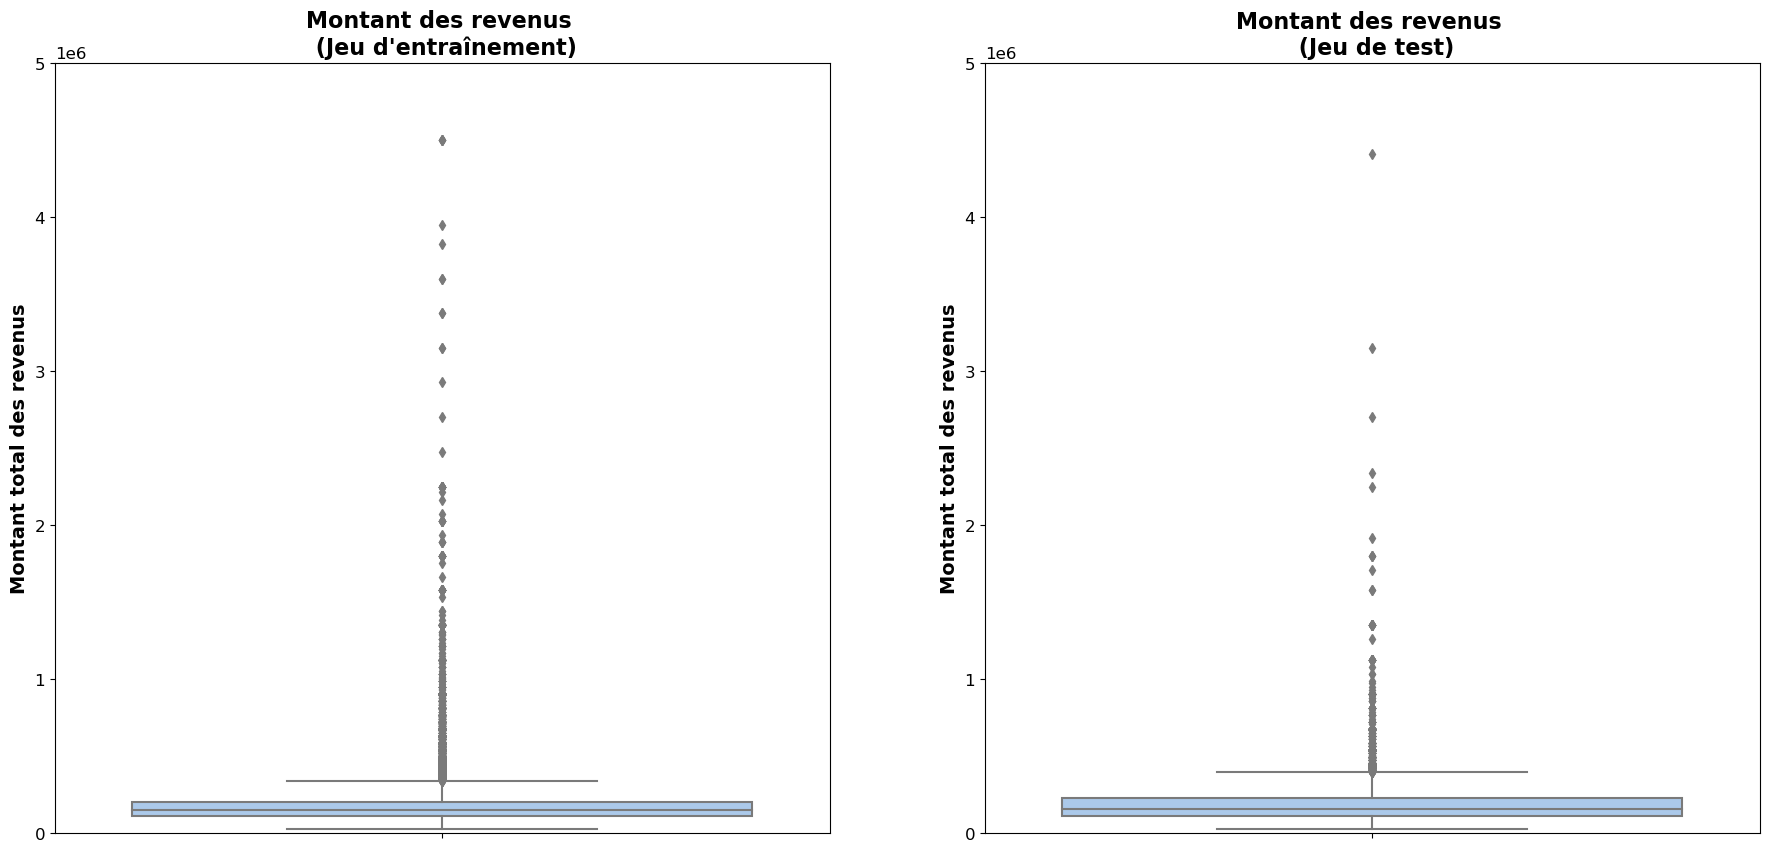

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0], data= train, y="AMT_INCOME_TOTAL")
    axes[0].set_ylabel("Montant total des revenus", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_ylim(0, 5000000)
    axes[0].set_title("Montant des revenus \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1], data= test, y="AMT_INCOME_TOTAL")
    axes[1].set_ylabel("Montant total des revenus", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_ylim(0, 5000000)
    axes[1].set_title("Montant des revenus \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show()    

### 17. Les variables concernant la joignabilité du client

**Concernant ce critère, nous sommes en possession de trop d'informations dans le jeu de données: 4 variables pour le téléphone et 1 pour l'adresse mail, toutes complètes. Afin de limiter le nombre de variables tout en conservant les informations, un feature engineering sera réalisé:**
- **Comptage du nombre de moyens de joignabilité du clients**
- **Elimination des variables d'origine**    

In [81]:
# Feature engineering dans le jeu d'entraînement
train["FLAG_CONTACT"] = train["FLAG_MOBIL"] + train["FLAG_EMP_PHONE"] + train["FLAG_WORK_PHONE"] + train["FLAG_CONT_MOBILE"] + train["FLAG_PHONE"] + train["FLAG_EMAIL"]

# Feature engineering dans le jeu de test
test["FLAG_CONTACT"] = test["FLAG_MOBIL"] + test["FLAG_EMP_PHONE"] + test["FLAG_WORK_PHONE"] + test["FLAG_CONT_MOBILE"] + test["FLAG_PHONE"] + test["FLAG_EMAIL"]

# Elimination des variables d'origine dans le jeu d'entraînement
train = train.drop(["FLAG_PHONE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_EMAIL"], axis =1)

# Elimination des variables d'origine dans le jeu de test
test = test.drop(["FLAG_PHONE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_EMAIL"], axis =1) 

### 18. Création d'une variable pour le nombre de documents fournis

**Le nombre de documents fourni fera l'objet d'une nouvelle variable. Néanmoins, comme nous ne savons pas si un document est plus important qu'un autre, les variables FLAG_DOCUMENT_ seront analysées avant leur éventuelle élimination.**

In [82]:
# Création de la variable FLAG_DOCUMENT_SUM dans le jeu d'entraînement

# Sélection des colonnes avec le préfixe "FLAG_DOCUMENT_"
cols_with_prefix_FLAG_DOCUMENT_ = [col for col in train.columns if col.startswith("FLAG_DOCUMENT_")]

# Création de la nouvelle colonne FLAG_DOCUMENT_SUM
train["FLAG_DOCUMENT_SUM"] = train[cols_with_prefix_FLAG_DOCUMENT_].sum(axis=1)

In [83]:
# Création de la variable FLAG_DOCUMENT_SUM dans le jeu de test

# Sélection des colonnes avec le préfixe "FLAG_DOCUMENT_"
cols_with_prefix_FLAG_DOCUMENT_ = [col for col in test.columns if col.startswith("FLAG_DOCUMENT_")]

# Création de la nouvelle colonne FLAG_DOCUMENT_SUM
test["FLAG_DOCUMENT_SUM"] = test[cols_with_prefix_FLAG_DOCUMENT_].sum(axis=1)

In [84]:
print("Répartition du nombre de documents fourni dans le jeu d'entraînement")
print(f'{train["FLAG_DOCUMENT_SUM"].describe()}')
print("---------------------------------------------------------------------")
print("Répartition du nombre de documents fourni dans le jeu de test")
print(f'{test["FLAG_DOCUMENT_SUM"].describe()}')

Répartition du nombre de documents fourni dans le jeu d'entraînement
count    307511.000000
mean          0.930155
std           0.344295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: FLAG_DOCUMENT_SUM, dtype: float64
---------------------------------------------------------------------
Répartition du nombre de documents fourni dans le jeu de test
count    48744.000000
mean         0.984675
std          0.122843
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: FLAG_DOCUMENT_SUM, dtype: float64


**Dans la majorité des cas, un seul document est fourni!!! Par curiosité, nous allons regarder s'il s'agit d'un document  spécifique.**

In [85]:
# Sélection des colonnes avec le préfixe "FLAG_DOCUMENT_" dans le jeu de test
cols_with_prefix_FLAG_DOCUMENT_ = [col for col in test.columns if col.startswith("FLAG_DOCUMENT_")]

# Identification si une colonne ne contient que des 1
cols_with_only_1 = [col for col in cols_with_prefix_FLAG_DOCUMENT_ if test[col].eq(1).all()]

print(cols_with_only_1)

[]


**Il s'avère qu'il ne semble pas y avoir un document indispensable pour la demande de prêt. Comme nous étions sur le jeu de test et non sur le jeu d'entraînement, nous pouvons réaliser cette même procédure sur le jeu d'entraînement.**

In [86]:
# Sélection des colonnes avec le préfixe "FLAG_DOCUMENT_" dans le jeu d'entraînement
cols_with_prefix_FLAG_DOCUMENT_train = [col for col in train.columns if col.startswith("FLAG_DOCUMENT_")]

# Identification si une colonne ne contient que des 1
cols_with_only_1_train = [col for col in cols_with_prefix_FLAG_DOCUMENT_train if train[col].eq(1).all()]

print(cols_with_only_1_train)

[]


**Nous obtenons le même résultat. Nous pouvons déjà conclure qu'un document spécifique ne joue pas un rôle dans l'octroi ou non d'un prêt. Par conséquent, seule la variable FLAG_DOCUMENT_SUM sera conservée.**

In [87]:
# Elimination de l'ensemble des variables FLAG_DOCUMENT_ dans le jeu d'entraînement
train = train.drop(["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6",
                   "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11",
                   "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
                   "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"], axis=1)

# Elimination de l'ensemble des variables FLAG_DOCUMENT_ dans le jeu de test
test = test.drop(["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6",
                   "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11",
                   "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
                   "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"], axis=1)

In [88]:
# Informations sur le jeu de données d'entraînement à ce stade 
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**Toutes les informations plutôt personnelles sont quasi-complètes. Nous pouvons maintenant nous attaquer aux informations concernant le prêt en lui-même.**

### ANALYSE DES PRINCIPALES DONNEES PORTANT SUR LE PRET

### 1. Le type de crédit

In [89]:
print("Répartition du type de contrats dans le jeu d'entraînement")
print(f'{train["NAME_CONTRACT_TYPE"].value_counts(normalize=True)}')
print("------------------------------------------------------------")
print("Répartition du type de contrats dans le jeu test")
print(f'{test["NAME_CONTRACT_TYPE"].value_counts(normalize= True)}')

Répartition du type de contrats dans le jeu d'entraînement
NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64
------------------------------------------------------------
Répartition du type de contrats dans le jeu test
NAME_CONTRACT_TYPE
Cash loans         0.990994
Revolving loans    0.009006
Name: proportion, dtype: float64


**Définition du revolving loans**: Contrairement à un prêt traditionnel où un montant fixe est reçu et le remboursement réalisé en plusieurs échéances jusqu'à ce qu'il soit entièrement remboursé, avec un crédit rotatif, chaque fois qu'une partie du prêt est remboursée, cette somme redevient disponible pour être réempruntée. Par exemple, si nous dépensons 500 euros sur une limite de 1 000 euros et que nous remboursons ces 500 euros, nous avons de nouveau accès à la totalité de la limite de 1 000 euros.

### 2. Le montant du crédit

**Pour rappel, cette variable présente une valeur manquante dans le jeu d'entraînement.**

In [90]:
print("Répartition du montant des crédits dans le jeu d'entraînement")
print(f'{train["AMT_CREDIT"].describe()}')
print("------------------------------------------------------------")
print("Répartition du montant des crédits dans le jeu de test")
print(f'{test["AMT_CREDIT"].describe()}')

Répartition du montant des crédits dans le jeu d'entraînement
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
------------------------------------------------------------
Répartition du montant des crédits dans le jeu de test
count    4.874400e+04
mean     5.167404e+05
std      3.653970e+05
min      4.500000e+04
25%      2.606400e+05
50%      4.500000e+05
75%      6.750000e+05
max      2.245500e+06
Name: AMT_CREDIT, dtype: float64


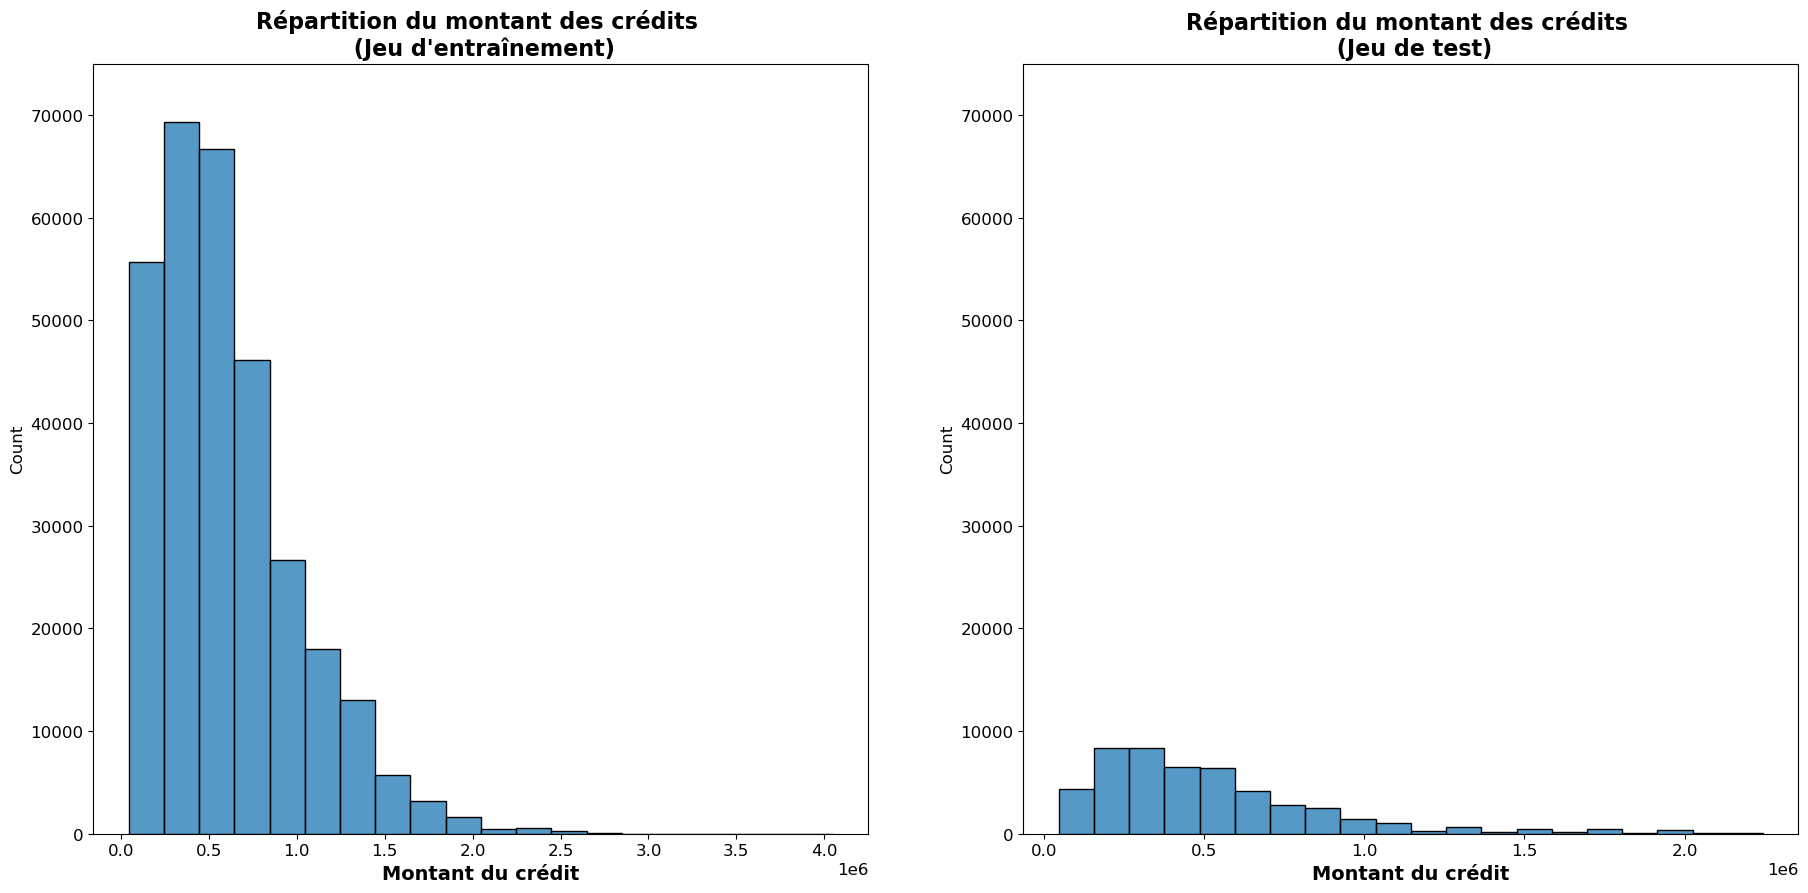

In [91]:
# Visualisation par histogramme
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.histplot(ax=axes[0], data= train, x="AMT_CREDIT", bins=20)
    axes[0].set_xlabel("Montant du crédit", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_ylim(0, 75000)
    axes[0].set_title("Répartition du montant des crédits \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.histplot(ax=axes[1], data= test, x="AMT_CREDIT", bins=20)
    axes[1].set_xlabel("Montant du crédit", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_ylim(0, 75000)
    axes[1].set_title("Répartition du montant des crédits \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show() 

In [92]:
# Imputation de la valeur manquante par -2 dans le jeu d'entraînement
train["AMT_CREDIT"] = train["AMT_CREDIT"].fillna(value=-2)

### 3. Revenu versé périodiquement

**ATTENTION: Présence de données manquantes dans les 2 jeux de données.**

In [93]:
print("Répartition du revenu versé périodiquement dans le jeu d'entraînement")
print(f'{train["AMT_ANNUITY"].describe()}')
print("---------------------------------------------------------------------")
print("Répartition du revenu versé périodiquement dans le jeu de test")
print(f'{test["AMT_ANNUITY"].describe()}')

Répartition du revenu versé périodiquement dans le jeu d'entraînement
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
---------------------------------------------------------------------
Répartition du revenu versé périodiquement dans le jeu de test
count     48720.000000
mean      29426.240209
std       16016.368315
min        2295.000000
25%       17973.000000
50%       26199.000000
75%       37390.500000
max      180576.000000
Name: AMT_ANNUITY, dtype: float64


**A RETENIR: Présence d'au moins un outlier dans les 2 jeux de données.**

**1. VISUALISATION PAR BOXPLOT**

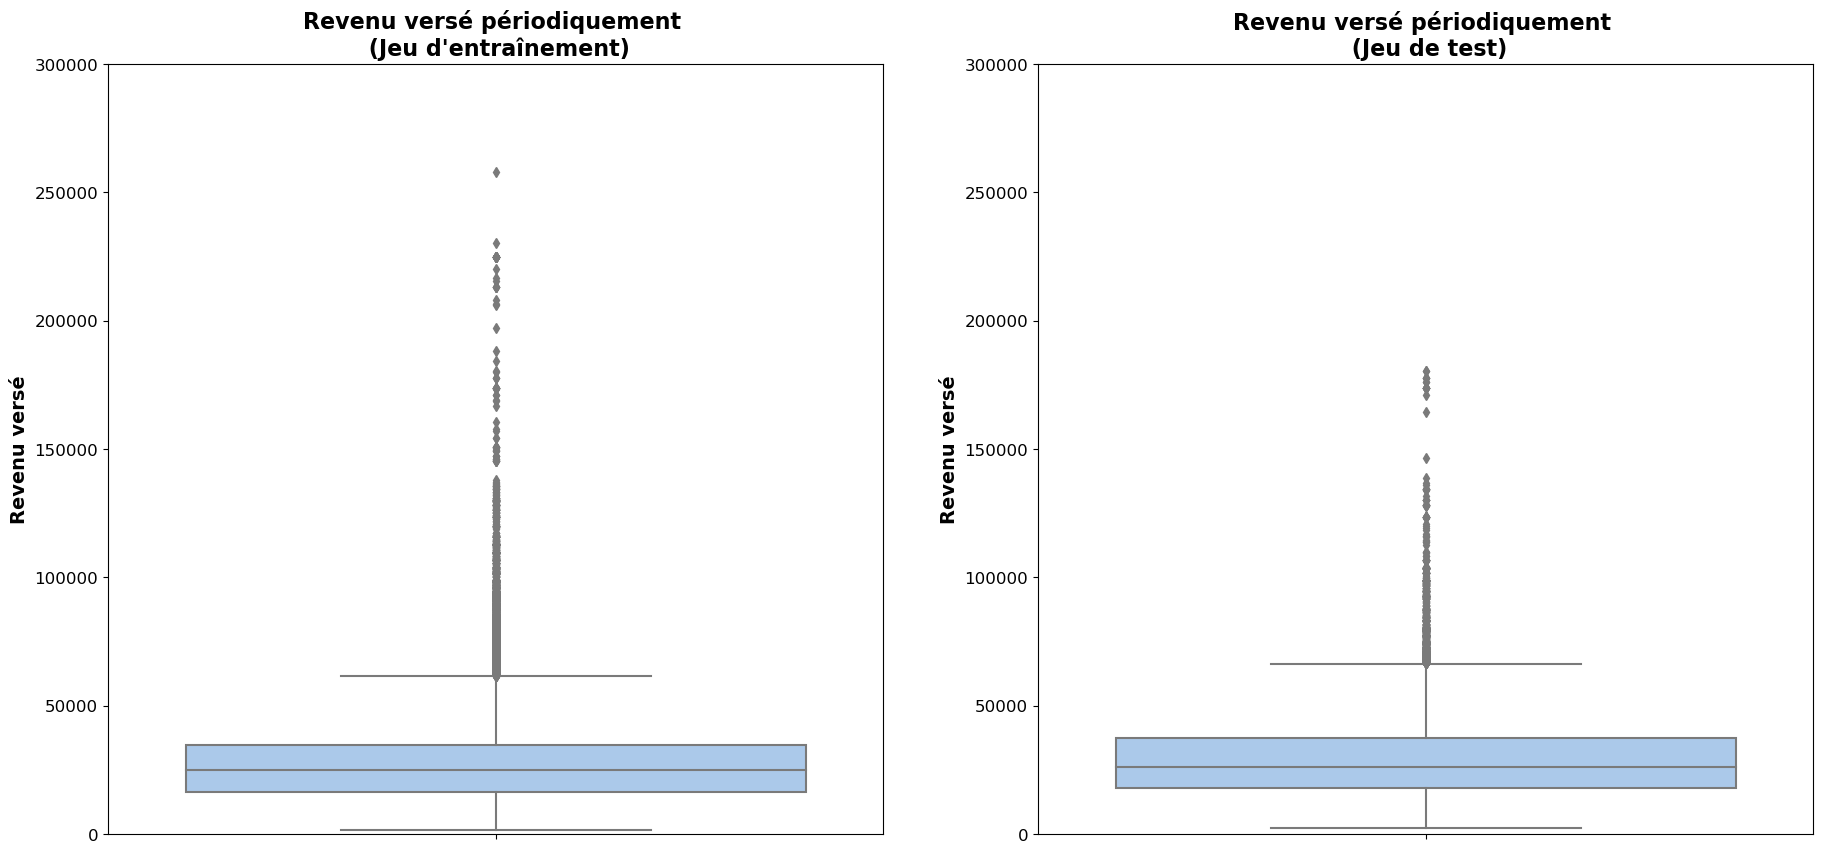

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0], data= train, y="AMT_ANNUITY")
    axes[0].set_ylabel("Revenu versé", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_ylim(0, 300000)
    axes[0].set_title("Revenu versé périodiquement \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1], data= test, y="AMT_ANNUITY")
    axes[1].set_ylabel("Revenu versé", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_ylim(0, 300000)
    axes[1].set_title("Revenu versé périodiquement \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show()     

**En réalité, il ne s'agit pas vraiment d'outliers... Concernant l'imputation des valeurs, toujours d'un point de vue métier, il est nécessaire que le modèle sache apprendre avec des données manquantes. Ainsi, la valeur fictive de -2 sera attribuée pour les valeurs manquantes.**

**2. FEATURE ENGINEERING: CREATION DE 3 VARIABLES**

**Plutôt que de regarder 2 variables séparément, je trouve plus pertinent de réaliser des pourcentages pour le remboursement:**
- **Montant de l'annuité par rapport au revenu total du client (%)**
- **Montant de l'annuité par rapport au montant du crédit (%)**
- **Montant du crédit par rapport au revenu total du client (%)**

In [95]:
# Création des variables dans le jeu d'entraînement
train["ANNUITY_INCOME_PERC"] = (train["AMT_ANNUITY"]/train["AMT_INCOME_TOTAL"])*100
train["ANNUITY_RATE_PERC"] = (train["AMT_ANNUITY"]/train["AMT_CREDIT"])*100
train["CREDIT_INCOME_PERC"] = (train["AMT_CREDIT"] / train["AMT_INCOME_TOTAL"])*100

# Création des variables dans le jeu de test
test["ANNUITY_INCOME_PERC"] = (test["AMT_ANNUITY"]/test["AMT_INCOME_TOTAL"])*100
test["ANNUITY_RATE_PERC"] = (test["AMT_ANNUITY"]/test["AMT_CREDIT"])*100
test["CREDIT_INCOME_PERC"] = (test["AMT_CREDIT"] / test["AMT_INCOME_TOTAL"])*100

In [96]:
# Vérification de la création des variables dans le jeu d'entrainement
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,EMPLOI,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC
0,100002,1,Cash loans,0,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,Laborers,1.0,2,2,0,0,0,0,0,0,"Commerce, finance, services et business",0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,26.0,3.0,Personnel manuel et entretien,1.7,4,1,12.197778,6.074927,200.788889
1,100003,0,Cash loans,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,Core staff,2.0,1,1,0,0,0,0,0,0,"Sante, education et religion",0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,46.0,2.0,"Personnel de securite, transport et logistique",3.3,4,1,13.221667,2.759832,479.075000
2,100004,0,Revolving loans,0,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,Laborers,1.0,2,2,0,0,0,0,0,0,"Gouvernement, Securite et Services publics",NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,52.0,2.0,Personnel manuel et entretien,0.6,5,0,10.000000,5.000000,200.000000
3,100006,0,Cash loans,1,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,NaN,Laborers,2.0,2,2,0,0,0,0,0,0,"Commerce, finance, services et business",NaN,0.650442,NaN,2.0,0.0,2.0,0.0,52.0,2.0,Personnel manuel et entretien,8.3,3,1,21.990000,9.494135,231.616667
4,100007,0,Cash loans,0,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,Core staff,1.0,2,2,0,0,0,0,1,1,"Sante, education et religion",NaN,0.322738,NaN,0.0,0.0,0.0,0.0,55.0,3.0,"Personnel de securite, transport et logistique",8.3,3,1,17.996296,4.262281,422.222222


**Théoriquement, comme nous sommes en présence de données manquantes concernant les annuités, il devrait y avoir des données manquantes dans 2 des 3 nouvelles variables créées. Nous allons donc vérifier cela.** 

In [97]:
missing_income_per_train = train["ANNUITY_INCOME_PERC"].isna().sum()
missing_rate_per_train = train["ANNUITY_RATE_PERC"].isna().sum()
missing_credit_income_per_train = train["CREDIT_INCOME_PERC"].isna().sum()
missing_income_per_test = test["ANNUITY_INCOME_PERC"].isna().sum()
missing_rate_per_test = test["ANNUITY_RATE_PERC"].isna().sum()
missing_credit_income_per_test = train["CREDIT_INCOME_PERC"].isna().sum()


print("Valeurs manquantes pour les 3 variables dans le jeu de données d'entrainement")
print(f"La variable ANNUITY_INCOME_PERC présente {missing_income_per_train} valeurs manquantes.")
print(f"La variable ANNUITY_RATE_PERC présente {missing_rate_per_train} valeurs manquantes.")
print(f"La variable CREDIT_INCOME_PERC présente {missing_credit_income_per_train} valeurs manquantes.")
print(f"--------------------------------------------------------------------------------------------------------")
print("Valeurs manquantes pour les 3 variables dans le jeu de données de test")
print(f"La variable ANNUITY_INCOME_PERC présente {missing_income_per_test} valeurs manquantes.")
print(f"La variable ANNUITY_RATE_PERC présente {missing_rate_per_test} valeurs manquantes.")
print(f"La variable CREDIT_INCOME_PERC présente {missing_credit_income_per_test} valeurs manquantes.")

Valeurs manquantes pour les 3 variables dans le jeu de données d'entrainement
La variable ANNUITY_INCOME_PERC présente 12 valeurs manquantes.
La variable ANNUITY_RATE_PERC présente 12 valeurs manquantes.
La variable CREDIT_INCOME_PERC présente 0 valeurs manquantes.
--------------------------------------------------------------------------------------------------------
Valeurs manquantes pour les 3 variables dans le jeu de données de test
La variable ANNUITY_INCOME_PERC présente 24 valeurs manquantes.
La variable ANNUITY_RATE_PERC présente 24 valeurs manquantes.
La variable CREDIT_INCOME_PERC présente 0 valeurs manquantes.


**Tel est bien le cas.**

**2. VISUALISATION PAR BOXPLOT**

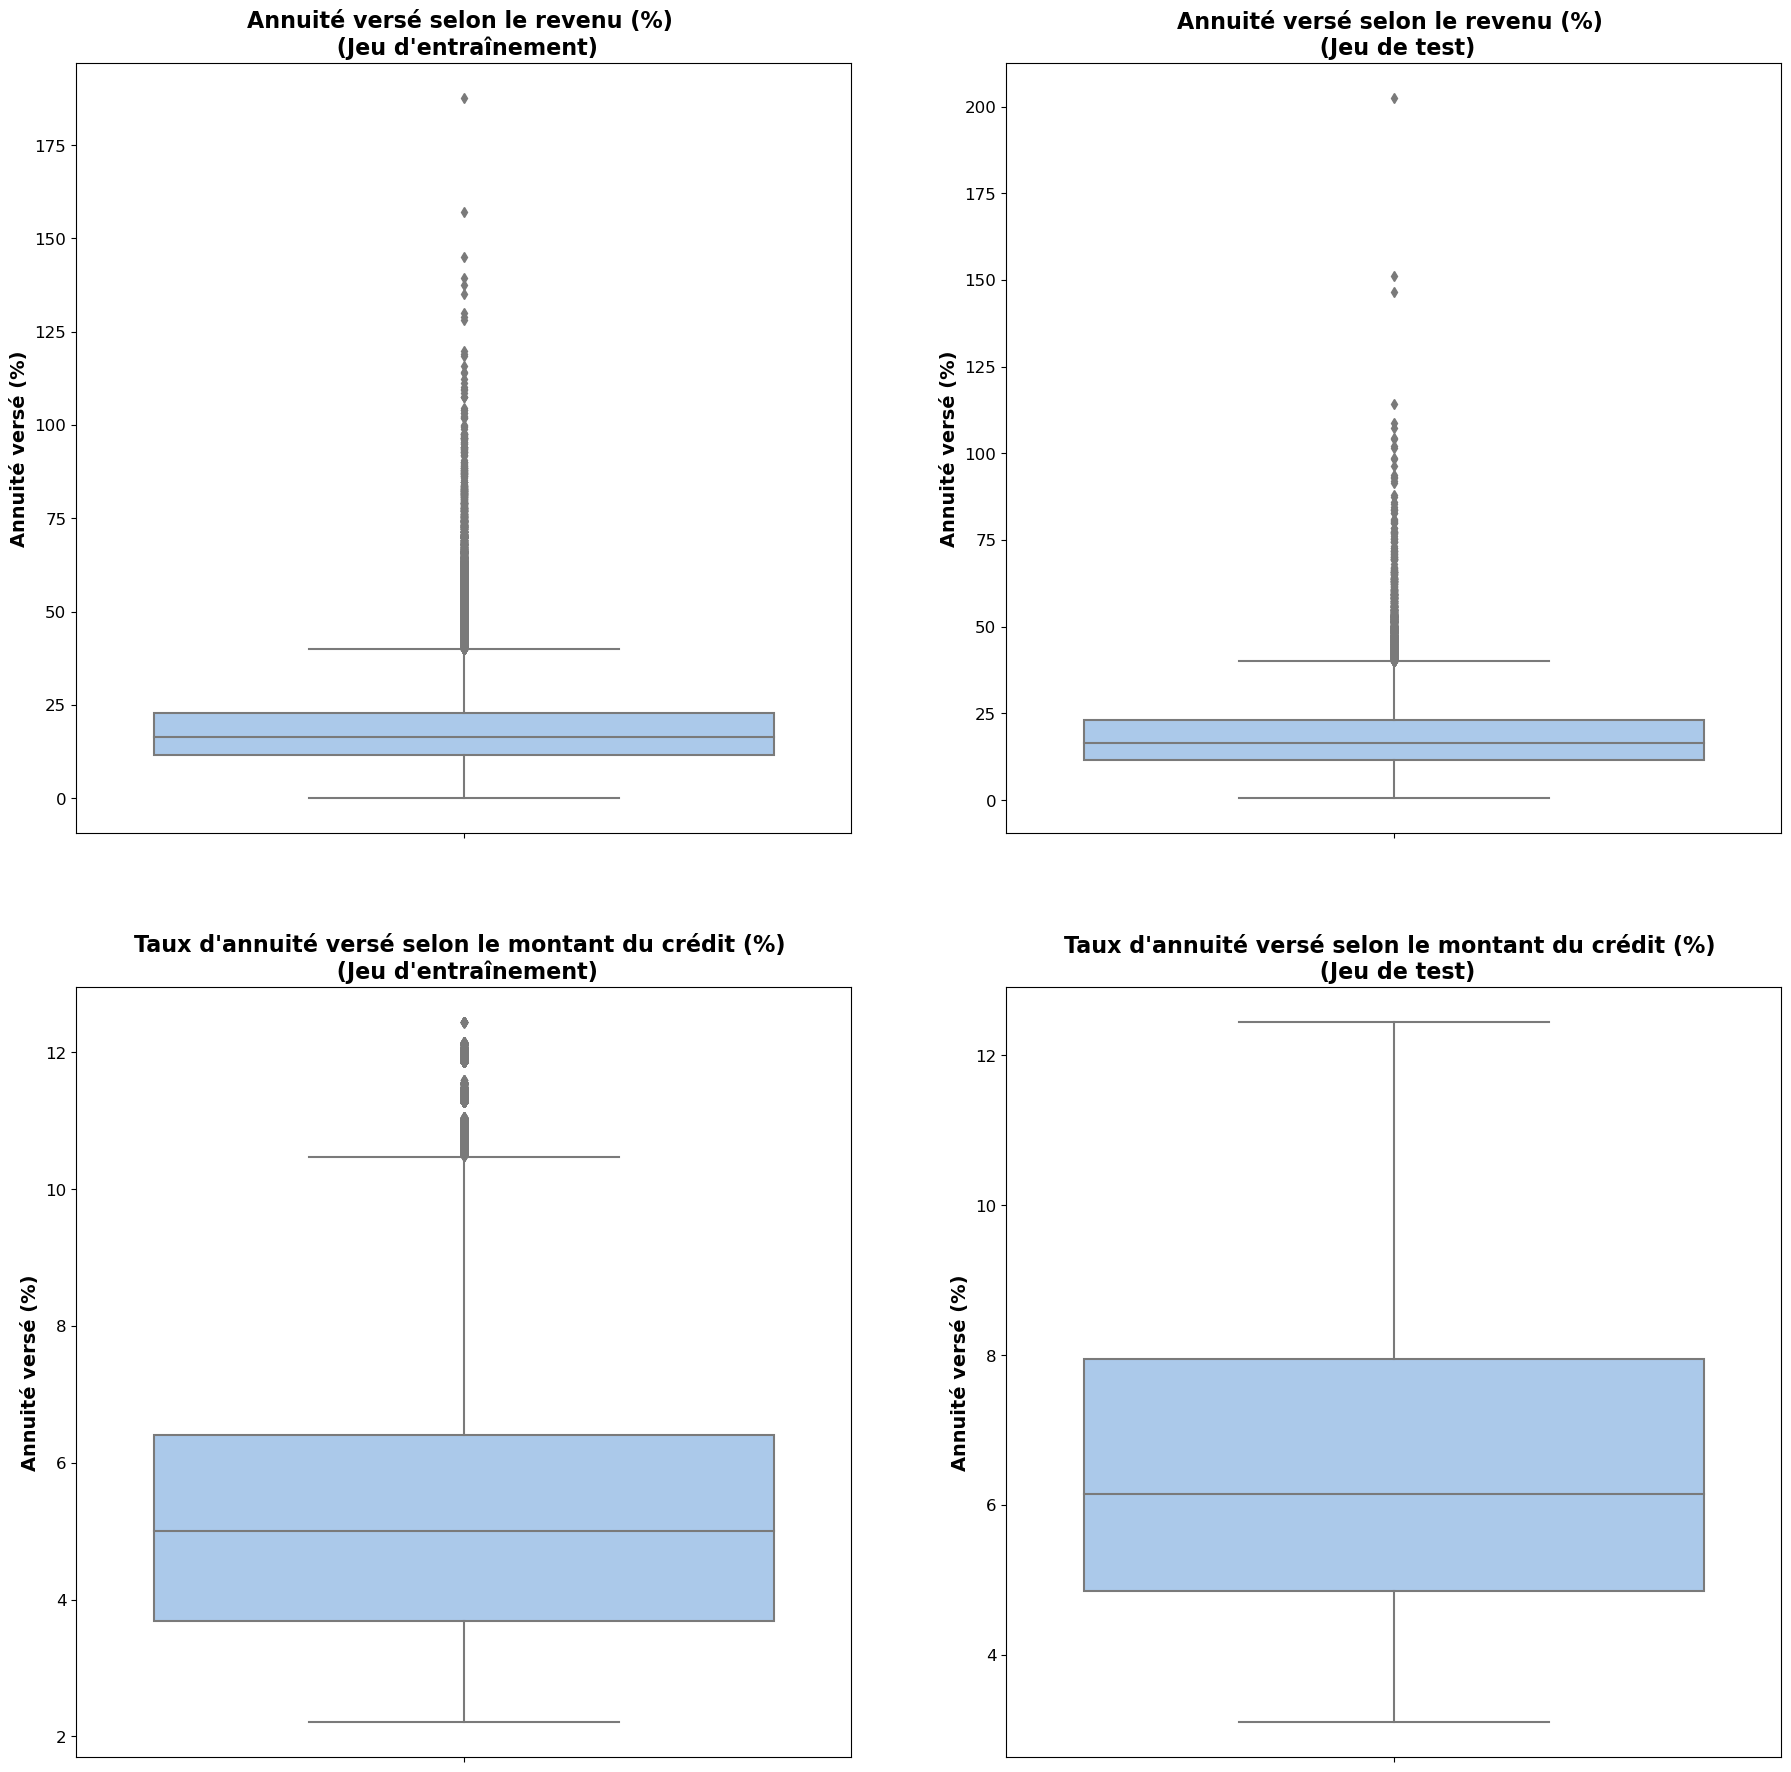

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 22))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0,0], data= train, y="ANNUITY_INCOME_PERC")
    axes[0,0].set_ylabel("Annuité versé (%)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0,0].set_ylim()
    axes[0,0].set_title("Annuité versé selon le revenu (%) \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[0,1], data= test, y="ANNUITY_INCOME_PERC")
    axes[0,1].set_ylabel("Annuité versé (%)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0,1].set_ylim()
    axes[0,1].set_title("Annuité versé selon le revenu (%) \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1,0], data= train, y="ANNUITY_RATE_PERC")
    axes[1,0].set_ylabel("Annuité versé (%)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1,0].set_ylim()
    axes[1,0].set_title("Taux d'annuité versé selon le montant du crédit (%) \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1,1], data= test, y="ANNUITY_RATE_PERC")
    axes[1,1].set_ylabel("Annuité versé (%)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1,1].set_ylim()
    axes[1,1].set_title("Taux d'annuité versé selon le montant du crédit (%) \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show()    

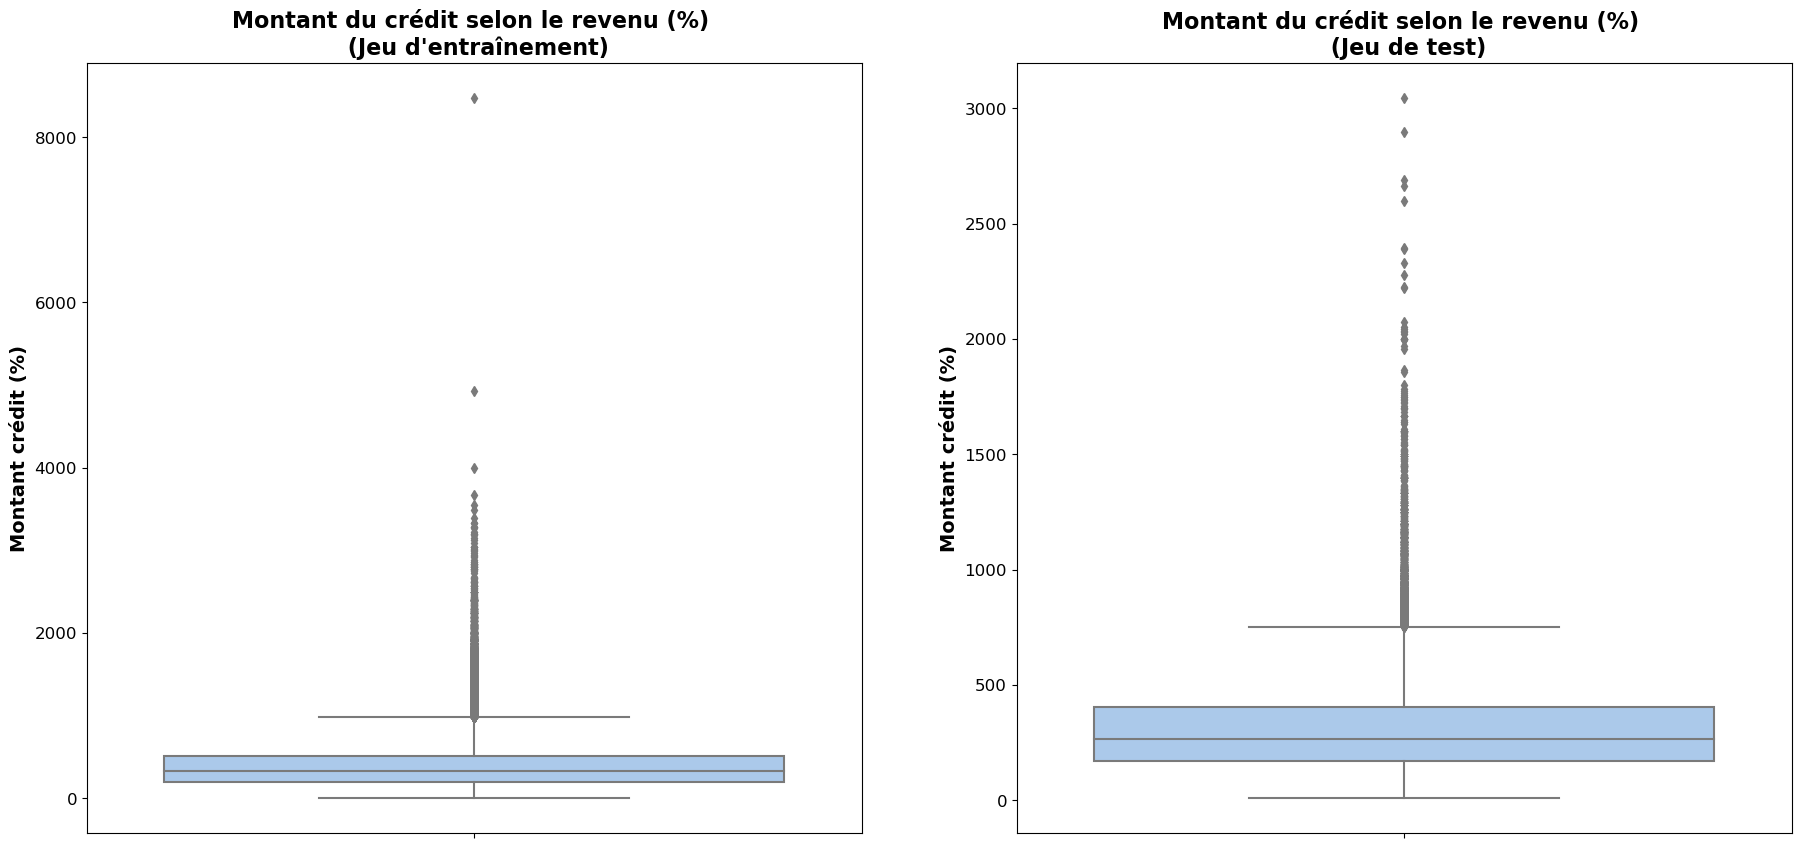

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0], data= train, y="CREDIT_INCOME_PERC")
    axes[0].set_ylabel("Montant crédit (%)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_ylim()
    axes[0].set_title("Montant du crédit selon le revenu (%) \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1], data= test, y="CREDIT_INCOME_PERC")
    axes[1].set_ylabel("Montant crédit (%)", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_ylim()
    axes[1].set_title("Montant du crédit selon le revenu (%) \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show()     

**Bien que nous sommes en présence d'outliers, le jeu de données sera conservé en l'état.**

**3. IMPUTATION DES VALEURS MANQUANTES PAR -2**

In [100]:
# Imputation par la valeur -2 dans le jeu d'entraînement
train["AMT_ANNUITY"] = train["AMT_ANNUITY"].fillna(value=-2)
train["ANNUITY_INCOME_PERC"] = train["ANNUITY_INCOME_PERC"].fillna(value=-2)
train["ANNUITY_RATE_PERC"] = train["ANNUITY_RATE_PERC"].fillna(value=-2)

# Imputation par la valeur -2 dans le jeu de test
test["AMT_ANNUITY"] = test["AMT_ANNUITY"].fillna(value=-2)
test["ANNUITY_INCOME_PERC"] = test["ANNUITY_INCOME_PERC"].fillna(value=-2)
test["ANNUITY_RATE_PERC"] = test["ANNUITY_RATE_PERC"].fillna(value=-2)

### 4. La variable AMT_GOODS_PRICE

- **Cette variable ne concerne que les prêts à la consommation. Par exemple, si le prêt est pour l'achat d'une voiture, la somme empruntée est généralement basée sur le prix de cette voiture.**

- **Rappel: Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.**

**1. DESCRIPTION DE LA VARIABLE AVANT IMPUTATION**

In [101]:
print("Répartition de la somme normalement empruntée dans le jeu d'entraînement")
print(f'{train["AMT_GOODS_PRICE"].describe()}')
print("---------------------------------------------------------------------")
print("Répartition de la somme normalement empruntée dans le jeu de test")
print(f'{test["AMT_GOODS_PRICE"].describe()}')

Répartition de la somme normalement empruntée dans le jeu d'entraînement
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
---------------------------------------------------------------------
Répartition de la somme normalement empruntée dans le jeu de test
count    4.874400e+04
mean     4.626188e+05
std      3.367102e+05
min      4.500000e+04
25%      2.250000e+05
50%      3.960000e+05
75%      6.300000e+05
max      2.245500e+06
Name: AMT_GOODS_PRICE, dtype: float64


**Cette variable ne semble pas présenter de valeur anormale.**

**2. VISUALISATION PAR BOXPLOT**

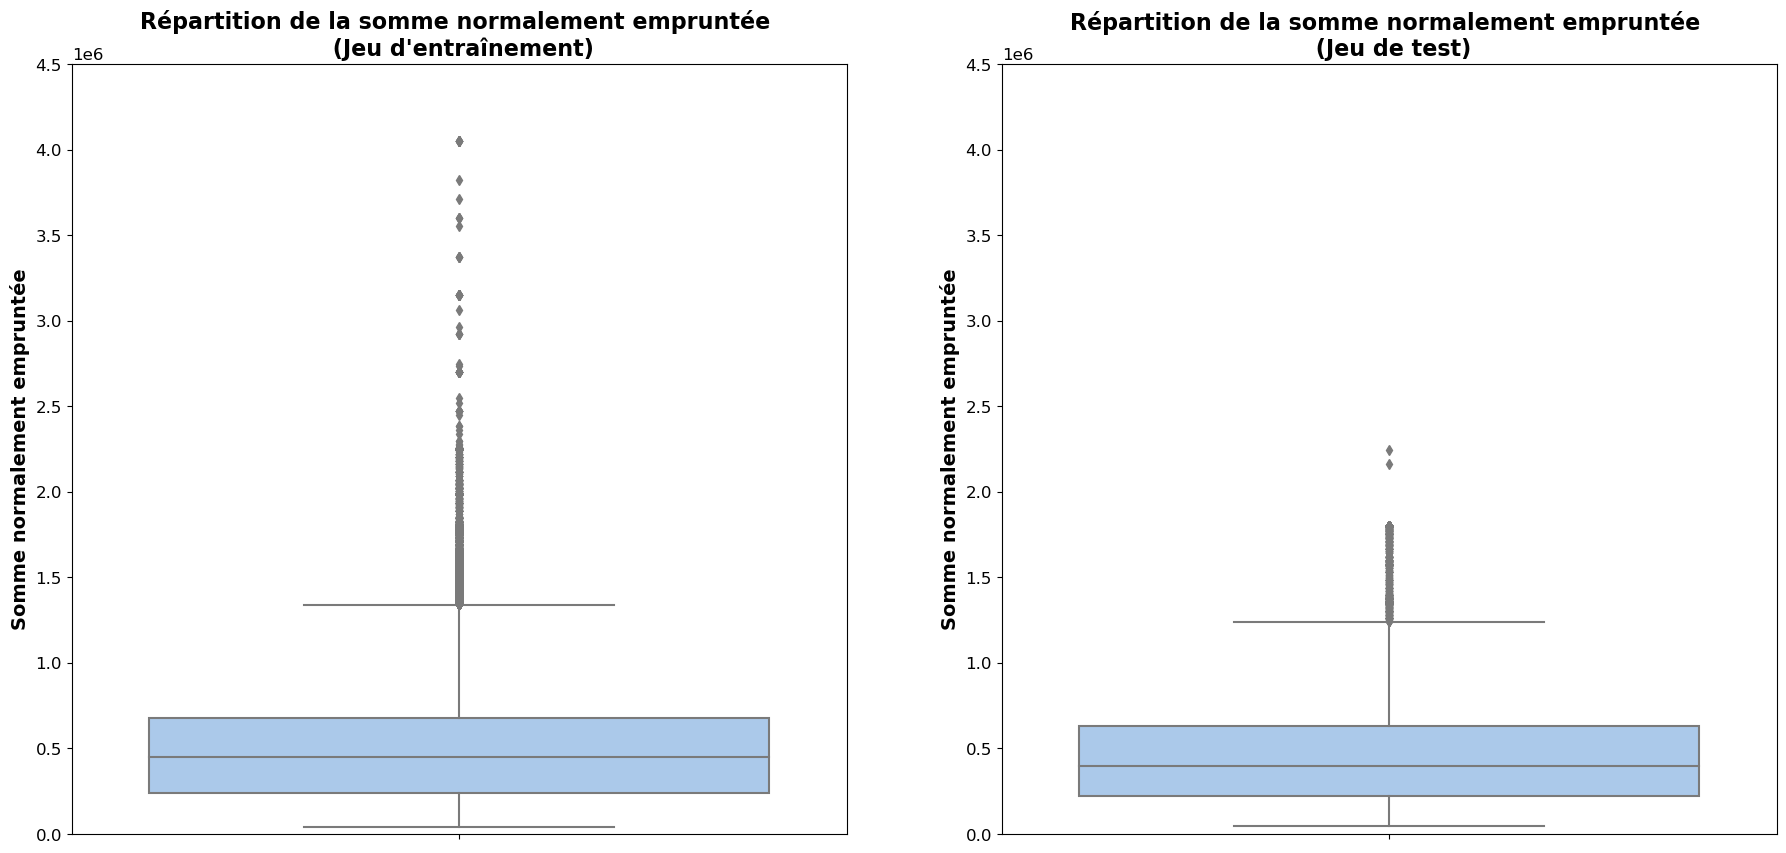

In [102]:
# Visualisation par boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size":12})
    sns.boxplot(ax=axes[0], data= train, y="AMT_GOODS_PRICE")
    axes[0].set_ylabel("Somme normalement empruntée", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[0].set_ylim(0, 4500000)
    axes[0].set_title("Répartition de la somme normalement empruntée \n (Jeu d'entraînement)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
    sns.boxplot(ax=axes[1], data= test, y="AMT_GOODS_PRICE")
    axes[1].set_ylabel("Somme normalement empruntée", fontname = 'sans-serif', fontsize = 14, fontweight= 'bold')
    axes[1].set_ylim(0, 4500000)
    axes[1].set_title("Répartition de la somme normalement empruntée \n (Jeu de test)", fontname = 'sans-serif', fontsize = 16, fontweight= 'bold')
plt.show() 

**3. IMPUTATION PAR LA VALEUR -2 DANS LE JEU D'ENTRAINEMENT POUR LES VALEURS MANQUANTES**

In [103]:
train["AMT_GOODS_PRICE"] = train["AMT_GOODS_PRICE"].fillna(value=-2)

### 5. Les sources externes

**Pour ces 3 variables, nous sommes en présence de données manquantes. Après l'analyse de la description de chacune d'entres elles, une imputation pour les valeurs manquantes sera réalisée.**

In [104]:
print("Description de la variable 'EXT_SOURCE_1' dans le jeu d'entraînement")
print(train["EXT_SOURCE_1"].describe())
print("--------------------------------------------------------------------")
print("Description de la variable 'EXT_SOURCE_1' dans le jeu de test")
print(test["EXT_SOURCE_1"].describe())

Description de la variable 'EXT_SOURCE_1' dans le jeu d'entraînement
count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64
--------------------------------------------------------------------
Description de la variable 'EXT_SOURCE_1' dans le jeu de test
count    28212.000000
mean         0.501180
std          0.205142
min          0.013458
25%          0.343695
50%          0.506771
75%          0.665956
max          0.939145
Name: EXT_SOURCE_1, dtype: float64


In [105]:
print("Description de la variable 'EXT_SOURCE_2' dans le jeu d'entraînement")
print(train["EXT_SOURCE_2"].describe())
print("--------------------------------------------------------------------")
print("Description de la variable 'EXT_SOURCE_2' dans le jeu de test")
print(test["EXT_SOURCE_2"].describe())

Description de la variable 'EXT_SOURCE_2' dans le jeu d'entraînement
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
--------------------------------------------------------------------
Description de la variable 'EXT_SOURCE_2' dans le jeu de test
count    48736.000000
mean         0.518021
std          0.181278
min          0.000008
25%          0.408066
50%          0.558758
75%          0.658497
max          0.855000
Name: EXT_SOURCE_2, dtype: float64


In [106]:
print("Description de la variable 'EXT_SOURCE_3' dans le jeu d'entraînement")
print(train["EXT_SOURCE_3"].describe())
print("--------------------------------------------------------------------")
print("Description de la variable 'EXT_SOURCE_3' dans le jeu de test")
print(test["EXT_SOURCE_3"].describe())

Description de la variable 'EXT_SOURCE_3' dans le jeu d'entraînement
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64
--------------------------------------------------------------------
Description de la variable 'EXT_SOURCE_3' dans le jeu de test
count    40076.000000
mean         0.500106
std          0.189498
min          0.000527
25%          0.363945
50%          0.519097
75%          0.652897
max          0.882530
Name: EXT_SOURCE_3, dtype: float64


**Bien que l'ensemble de ces variables me semblent tout à fait abstraites, elles peuvent être d'une grande importance dans le métier. Par conséquent, comme ces dernières ne présentant que des valeurs positives, les valeurs manquantes seront imputées par -2.**

In [107]:
# Imputation dans le jeu d'entrainement
train["EXT_SOURCE_1"] = train["EXT_SOURCE_1"].fillna(value=-2)
train["EXT_SOURCE_2"] = train["EXT_SOURCE_2"].fillna(value=-2)
train["EXT_SOURCE_3"] = train["EXT_SOURCE_3"].fillna(value=-2)

# Imputation dans le jeu de test
test["EXT_SOURCE_1"] = test["EXT_SOURCE_1"].fillna(value=-2)
test["EXT_SOURCE_2"] = test["EXT_SOURCE_2"].fillna(value=-2)
test["EXT_SOURCE_3"] = test["EXT_SOURCE_3"].fillna(value=-2)

### 6. Les variables 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'

**Ces 4 variables présentent des valeurs manquantes et font référence aux difficultés de paiement de l'entourage du client et non au client lui-même. Un describe() de ces variables sera réalisé suivi d'une imputation des valeurs manquantes.**

In [108]:
print("Description de la variable 'OBS_30_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement")
print(train["OBS_30_CNT_SOCIAL_CIRCLE"].describe())
print("--------------------------------------------------------------------")
print("Description de la variable 'OBS_30_CNT_SOCIAL_CIRCLE' dans le jeu de test")
print(test["OBS_30_CNT_SOCIAL_CIRCLE"].describe())

Description de la variable 'OBS_30_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
--------------------------------------------------------------------
Description de la variable 'OBS_30_CNT_SOCIAL_CIRCLE' dans le jeu de test
count    48715.000000
mean         1.447644
std          3.608053
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        354.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [109]:
print("Description de la variable 'DEF_30_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement")
print(train["DEF_30_CNT_SOCIAL_CIRCLE"].describe())
print("--------------------------------------------------------------------")
print("Description de la variable 'DEF_30_CNT_SOCIAL_CIRCLE' dans le jeu de test")
print(test["DEF_30_CNT_SOCIAL_CIRCLE"].describe())

Description de la variable 'DEF_30_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
--------------------------------------------------------------------
Description de la variable 'DEF_30_CNT_SOCIAL_CIRCLE' dans le jeu de test
count    48715.000000
mean         0.143652
std          0.514413
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [110]:
print("Description de la variable 'OBS_60_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement")
print(train["OBS_60_CNT_SOCIAL_CIRCLE"].describe())
print("--------------------------------------------------------------------------------")
print("Description de la variable 'OBS_60_CNT_SOCIAL_CIRCLE' dans le jeu de test")
print(test["OBS_60_CNT_SOCIAL_CIRCLE"].describe())

Description de la variable 'OBS_60_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
--------------------------------------------------------------------------------
Description de la variable 'OBS_60_CNT_SOCIAL_CIRCLE' dans le jeu de test
count    48715.000000
mean         1.435738
std          3.580125
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        351.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [111]:
print("Description de la variable 'DEF_60_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement")
print(train["DEF_60_CNT_SOCIAL_CIRCLE"].describe())
print("--------------------------------------------------------------------")
print("Description de la variable 'DEF_60_CNT_SOCIAL_CIRCLE' dans le jeu de test")
print(test["DEF_60_CNT_SOCIAL_CIRCLE"].describe())

Description de la variable 'DEF_60_CNT_SOCIAL_CIRCLE' dans le jeu d'entraînement
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
--------------------------------------------------------------------
Description de la variable 'DEF_60_CNT_SOCIAL_CIRCLE' dans le jeu de test
count    48715.000000
mean         0.101139
std          0.403791
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


**L'ensemble de ces variables ne présentant que des valeurs positives, les valeurs manquantes seront imputées par -2.**

In [112]:
# Imputation dans le jeu d'entraînement
train["OBS_30_CNT_SOCIAL_CIRCLE"] = train["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(value=-2)
train["OBS_60_CNT_SOCIAL_CIRCLE"] = train["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(value=-2)
train["DEF_30_CNT_SOCIAL_CIRCLE"] = train["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(value=-2)
train["DEF_60_CNT_SOCIAL_CIRCLE"] = train["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(value=-2)

# Imputation dans le jeu de test
test["OBS_30_CNT_SOCIAL_CIRCLE"] = test["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(value=-2)
test["OBS_60_CNT_SOCIAL_CIRCLE"] = test["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(value=-2)
test["DEF_30_CNT_SOCIAL_CIRCLE"] = test["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(value=-2)
test["DEF_60_CNT_SOCIAL_CIRCLE"] = test["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(value=-2)

### 7. L'accompagnement de la personne au moment du prêt

*Dans le contexte d'octroi de crédit, cette donnée peut être utile. En effet, l'accompagnement d'une personne pourrait être une source de 'garantie'. Nous ne sommes qu'en présence d'environ 50 % de données et afin d'éviter de perdre cette variable, nous pouvons essayer de répartir les données en 3 types de catégories: 'Unknown', 'Accompanied' et 'Unaccompanied'.*

In [113]:
# Contenu de la variable
print(train["NAME_TYPE_SUITE"].unique().tolist())

['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people']


In [114]:
# Création de la donnée 'Unknown' dans le jeu d'entraînement
train["NAME_TYPE_SUITE"] = train["NAME_TYPE_SUITE"].fillna(value='Unknown')

# Création de la donnée 'Accompanied'
accompanied_train = train[(train["NAME_TYPE_SUITE"]== "Spouse, partner") | (train["NAME_TYPE_SUITE"]== "Family") |
                                 (train["NAME_TYPE_SUITE"]== "Children") | (train["NAME_TYPE_SUITE"]== "Other_B") |
                                 (train["NAME_TYPE_SUITE"]== "Other_A") | (train["NAME_TYPE_SUITE"]== "Group of people")]

for idx in accompanied_train.index:
    train.loc[idx, "NAME_TYPE_SUITE"] = "Accompanied"

In [115]:
# Création de la donnée 'Unknown' dans le jeu test
test["NAME_TYPE_SUITE"] = test["NAME_TYPE_SUITE"].fillna(value='Unknown')

# Création de la donnée 'Accompanied'
accompanied_test = test[(test["NAME_TYPE_SUITE"]== "Spouse, partner") | (test["NAME_TYPE_SUITE"]== "Family") |
                                 (test["NAME_TYPE_SUITE"]== "Children") | (test["NAME_TYPE_SUITE"]== "Other_B") |
                                 (test["NAME_TYPE_SUITE"]== "Other_A") | (test["NAME_TYPE_SUITE"]== "Group of people")]

for idx in accompanied_test.index:
    test.loc[idx, "NAME_TYPE_SUITE"] = "Accompanied"

In [116]:
print("Pourcentage de données par catégorie dans le jeu d'entraînement")
print(train["NAME_TYPE_SUITE"].value_counts(normalize=True))
print("----------------------------------------------------------------")
print("Pourcentage de données par catégorie dans le jeu de test")
print(test["NAME_TYPE_SUITE"].value_counts(normalize=True))

Pourcentage de données par catégorie dans le jeu d'entraînement
NAME_TYPE_SUITE
Unaccompanied    0.808186
Accompanied      0.187613
Unknown          0.004201
Name: proportion, dtype: float64
----------------------------------------------------------------
Pourcentage de données par catégorie dans le jeu de test
NAME_TYPE_SUITE
Unaccompanied    0.815013
Accompanied      0.166297
Unknown          0.018689
Name: proportion, dtype: float64


**A NOTER: Les jeux de données concernant l'historique des prêts des clients étant traités en parallèle, la répartition s'est montrée beaucoup plus homogène pour ces derniers...**

### Conclusion de cette première EDA basique
- **Feature engineering afin d'avoir des données exprimées en âge ce qui est davantage explicite.**
- **Feature engineering sur les métiers et les secteurs d'activités, ce dernier permettant non seulement d'avoir des variables comportant plus de valeurs (meilleur apprentissage en ML), mais aussi une réduction du nombre de variables à encoder.**
- **Valeurs manquantes imputées par la valeur fictive de -2.**
- **Même si certaines variables ne sont pas explicites (ex: EXT_SOURCES_), elles n'ont pas été éliminées du jeu de données car elles peuvent être importantes.**
- **Seules les variables inutiles pour ce projet ont été éliminées.**

### Prochaine étape: Focus sur le jeu d'entraînement
- **EDA en fonction de la target.**
- **Encodage manuel de la plupart des variables catégorielles (jeux d'entraînement et de test).**
- **Imputation des dernières valeurs manquantes (jeux d'entraînement et de test).**

## 1.3. EDA en fonction de la target

**Cette analyse exploratoire ne sera bien évidemment uniquement réalisée sur le jeu de données d'entraînement. Du plus, ayant énormément de variables, seules certaines variables feront l'objet d'une analyse bivariée. Enfin, durant cette étape, nous réaliserons les imputations sur les dernières variables présentant des données manquantes.**

In [117]:
# Informations sur le jeu de données
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

*Nous sommes bien en présence d'un jeu de données complet, hormis pour la variable 'OWN_CAR_AGE'.*

### 1. Analyse de la variable 'TARGET'

In [118]:
# Comptage du nombre de valeurs
train["TARGET"].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

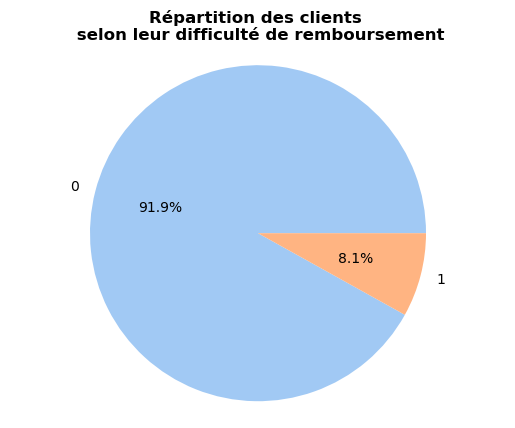

In [119]:
# Visualisation par 'camembert'
plt.figure()
with sns.color_palette(palette='pastel'):
    plt.rcParams.update({"font.size": 10})
    plt.pie(train["TARGET"].value_counts(), autopct='%1.1f%%', labels=train["TARGET"].value_counts().index)
    plt.axis('equal')
    plt.title("Répartition des clients \n selon leur difficulté de remboursement", fontname = 'sans-serif', fontsize = 12, fontweight = 'bold')
plt.show()

**Nous sommes en présence d'un jeu de données totalement déséquilibré, où 8% des clients présentent des difficultés de remboursement.**

### 2. Remboursement en fonction du sexe du client

**RAPPEL:** Nous avons 4 clients non sexés dans le jeu de données d'entraînement et il n'est nullement question de les supprimer car cela pourrait se produire dans le monde professionnel. En pratique, d'un point de vue métier, il est d'usage dans ce cas-là d'attribuer la valeur du sexe du client à priori le plus 'à risque'. Une analyse des difficultés de remboursement sera donc réalisée en fonction du sexe avant d'imputer un genre pour les 'XNA'.

**1. IMPUTATION DES VALEURS MANQUANTES**

**Analyse par un groupby**

In [120]:
sexe_risque = train.groupby("CODE_GENDER")["TARGET"].mean()
sexe_risque

CODE_GENDER
0      0.101419
1      0.069993
XNA    0.000000
Name: TARGET, dtype: float64

Les hommes sembleraient présenter plus de difficultés de remboursement que les femmes... Par conséquent, les XNA seront injectés dans le sexe masculin (0).

**Injection des XNA dans le sexe masculin**

In [121]:
sexe_xna = train[train["CODE_GENDER"] == "XNA"]

for idx in sexe_xna.index:
    train.loc[idx, "CODE_GENDER"] = 0

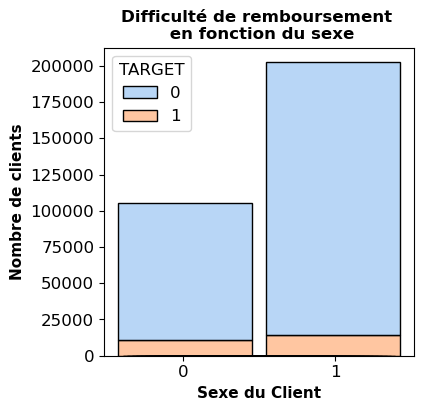

In [122]:
# Visualisation par histogramme
plt.figure(figsize=(4,4))
with sns.color_palette(palette='pastel'):
    plt.rcParams.update({"font.size" : 12})
    sns.histplot(data= train, stat="count", multiple="stack", x="CODE_GENDER", hue="TARGET", element="bars", legend=True, shrink=30)
    plt.xlabel("Sexe du Client", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    plt.xticks([0, 1], [0, 1])
    plt.ylabel("Nombre de clients", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    plt.title("Difficulté de remboursement \n en fonction du sexe", fontname = "sans-serif", fontsize = 12, fontweight = "bold")
plt.show()

In [123]:
# Vérification que la variable soit bien restée de type numérique
train["CODE_GENDER"].dtypes

dtype('O')

In [124]:
# Réencodage de la variable dans les 2 jeux de données
train["CODE_GENDER"] = train["CODE_GENDER"].replace({"0":0, "1":1})
test["CODE_GENDER"] = test["CODE_GENDER"].replace({"0":0, "1":1})

### 3. Remboursement en fonction de l'âge du client

**Afin de faciliter la visualisation, nous allons réaliser des tranches d'âge de 5 ans et nous focaliser uniquement sur les clients ayant des difficultés de remboursement.**

In [125]:
# Création d'un dataframe spécial
age_data = train[["TARGET", "AGE"]]

In [126]:
# Réalisation des tranches d'âge via la création d'une nouvelle variable
age_data['AGE_BINNED'] = pd.cut(train['AGE'], bins = np.linspace(20, 70, num = 11))
age_data.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\3537581193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['AGE_BINNED'] = pd.cut(train['AGE'], bins = np.linspace(20, 70, num = 11))


,TARGET,AGE,AGE_BINNED
0,1,26.0,"(25.0, 30.0]"
1,0,46.0,"(45.0, 50.0]"
2,0,52.0,"(50.0, 55.0]"
3,0,52.0,"(50.0, 55.0]"
4,0,55.0,"(50.0, 55.0]"


In [127]:
# Groupement par intervalle et calcul de la moyenne d'âge de ces derniers 
age_groups  = age_data.groupby('AGE_BINNED').mean()
age_groups

,TARGET,AGE
AGE_BINNED,,
"(20.0, 25.0]",0.121086,23.609512
"(25.0, 30.0]",0.111727,28.232196
"(30.0, 35.0]",0.100854,32.969751
"(35.0, 40.0]",0.088413,38.027623
"(40.0, 45.0]",0.077393,42.940963
"(45.0, 50.0]",0.073989,47.951609
"(50.0, 55.0]",0.065655,53.062876
"(55.0, 60.0]",0.054774,57.983749
"(60.0, 65.0]",0.052917,62.873175


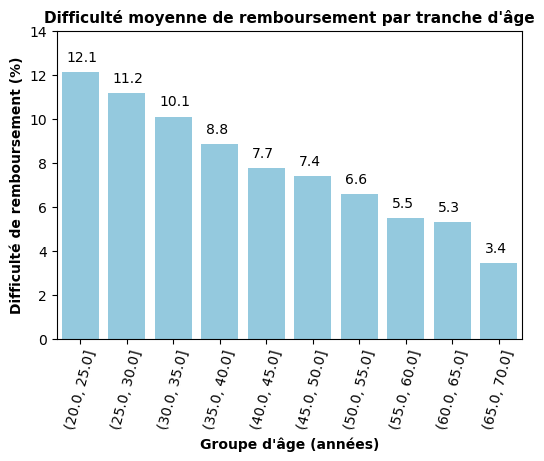

In [128]:
# Visualisation par histogramme

plt.figure(figsize = (6, 4))
plt.rcParams.update({"font.size" : 10})
sns.barplot(data = age_groups, x= age_groups.index.astype(str), y = age_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 75)
plt.xlabel("Groupe d'âge (années)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
plt.ylim(0,14)
plt.title("Difficulté moyenne de remboursement par tranche d'âge", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
age_nombre = age_groups["TARGET"]*100
indices = age_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.3, age_nombre[idx]+0.5, round(age_nombre[idx], 1))

plt.show()

**Cette visualisation montre que l'âge du client semble avec un impact sur le remboursement du prêt. En effet, plus le client est jeune, plus ce dernier présenterait des difficultés de remboursement.**

### 4. Remboursement en fonction du niveau d'études du client

In [129]:
# Création d'une variable scolarity_status
scolarity_status = train[["TARGET", "NAME_EDUCATION_TYPE"]]

# Réalisation d'un groupby
scolarity_status = scolarity_status.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
scolarity_status_sorted = scolarity_status.sort_values(by="TARGET", ascending=False)
scolarity_status_sorted

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


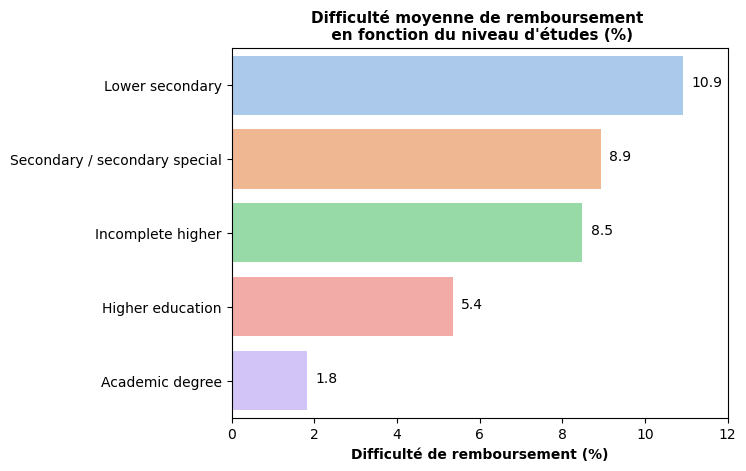

In [130]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = scolarity_status_sorted, x= scolarity_status_sorted["TARGET"]*100, y = "NAME_EDUCATION_TYPE")
    ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_xlim(0,12)
    ax.set_ylabel("")
    ax.set_title("Difficulté moyenne de remboursement \n en fonction du niveau d'études (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
scolarity_nombre = scolarity_status_sorted["TARGET"]*100
for i, v in enumerate(scolarity_nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

*D'après cette visualisation, le niveau d'études semble clairement impacter sur la capacité de remboursement du prêt. Ainsi, plus le niveau d'études est élevé, moins il y a de difficultés de remboursement.*

*ATTENTION: Un comptage de clients en nombre par niveau d'études sera réalisé (réalisé précédemment en pourcentage (Output 33) afin de s'assurer que ce constat est correct.*

In [131]:
# Comptage du nombre de clients par niveau d'éducation
education_counts = train['NAME_EDUCATION_TYPE'].value_counts()
print(education_counts)

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


**CONCLUSION: Comme la catégorie Secondary / secondary special contient à elle seule quasi 71% des clients, il est impossible au final d'avoir une idée sur l'impact du niveau d'études.**

### 4. Remboursement en fonction du statut familial

**ATTENTION:** Cette variable catégorielle présentent 2 valeurs 'Unknown'. Ces dernières sront 'injectées' dans le statut familial considéré le plus à risque.

In [132]:
# Création d'une variable statut familial
familial_status = train[["TARGET", "NAME_FAMILY_STATUS"]]

# Réalisation d'un groupby
familial_status = familial_status.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
familial_status_sorted = familial_status.sort_values(by="TARGET", ascending=False)
familial_status_sorted

,NAME_FAMILY_STATUS,TARGET
2,Single / not married,0.098077
1,Separated,0.081942
0,Married,0.078738
4,Widow,0.058242
3,Unknown,0.000000


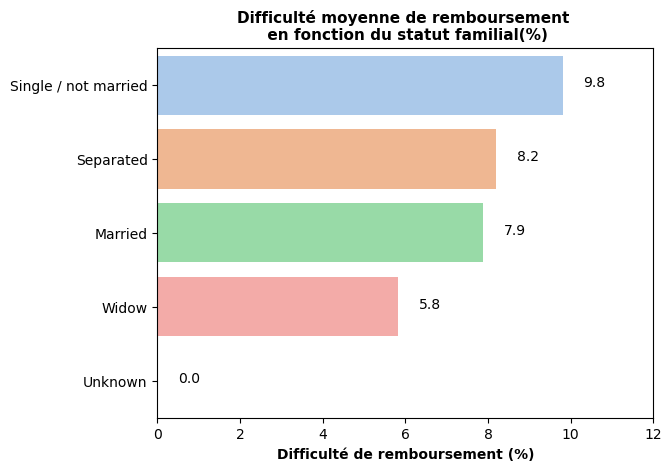

In [133]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = familial_status_sorted, x= familial_status_sorted["TARGET"]*100, y = "NAME_FAMILY_STATUS")
    ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_xlim(0,12)
    ax.set_ylabel("")
    ax.set_title("Difficulté moyenne de remboursement \n en fonction du statut familial(%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
statut_nombre = familial_status_sorted["TARGET"]*100
for i, v in enumerate(statut_nombre):
    ax.text(v+0.5,i+0.02, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

*Il semble que les veufs/veuves présentent le moins de difficultés de remboursement et que  célibataires/non mariés en présentent le plus. Par conséquent, les 2 clients de statut inconnu seront 'injectés' dans Single/Not married. Un comptage de clients en nombre par statut familial sera réalisé (réalisé précédemment en pourcentage (Output 28).*

In [134]:
familial_status_unknown = train[train["NAME_FAMILY_STATUS"] == "Unknown"]

for idx in familial_status_unknown.index:
    train.loc[idx, "NAME_FAMILY_STATUS"] = "Single / not married"

In [135]:
# Comptage du nombre de clients par statut familial
familial_counts = train['NAME_FAMILY_STATUS'].value_counts()
print(familial_counts)

NAME_FAMILY_STATUS
Married                 226207
Single / not married     45446
Separated                19770
Widow                    16088
Name: count, dtype: int64


**CONCLUSION: Comme la catégorie Married contient à elle seule plus de 70% des clients, il est impossible au final d'avoir une idée sur l'impact du statut familial.**

### 5. Remboursement en fonction du type de revenus du clients

In [136]:
# Création d'une variable type_revenu
type_revenu = train[["TARGET", "NAME_INCOME_TYPE"]]

# Réalisation d'un groupby
type_revenu = type_revenu.groupby("NAME_INCOME_TYPE")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
type_revenu_sorted = type_revenu.sort_values(by="TARGET", ascending=False)
type_revenu_sorted

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


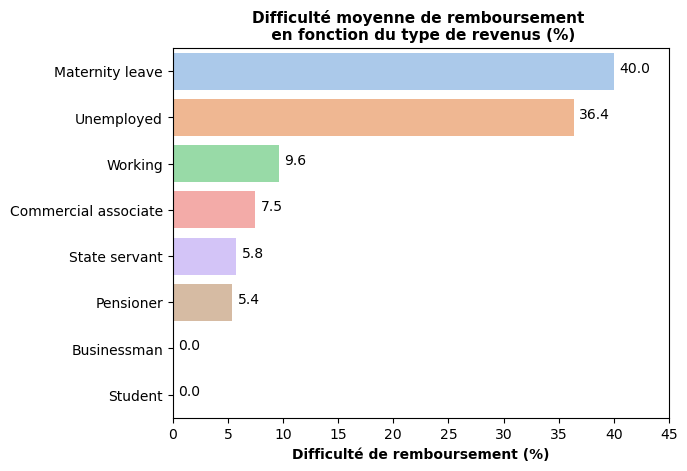

In [137]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = type_revenu_sorted, x= type_revenu_sorted["TARGET"]*100, y = "NAME_INCOME_TYPE")
    ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_xlim(0,45)
    ax.set_ylabel("")
    ax.set_title("Difficulté moyenne de remboursement \n en fonction du type de revenus (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
type_revenu_nombre = type_revenu_sorted["TARGET"]*100
for i, v in enumerate(type_revenu_nombre):
    ax.text(v+0.5,i+0.02, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

*D'après cette visualisation, il semble indéniable que les femmes en congés maternité et les chômeurs sont des personnes à risque.*

*ATTENTION: Un comptage de clients en nombre par type de revenus sera réalisé (réalisé précédemment en pourcentage (Output 68) afin de s'assurer que ce constat est correct.*

In [138]:
# Comptage du nombre de clients par type de revenus
income_counts = train['NAME_INCOME_TYPE'].value_counts()
print(income_counts)

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


**CONCLUSION: Avec les données en notre possession, il est difficile de tirer une conclusion sur la capacité de remboursement d'un crédit en fonction du type de revenus. En effet, nous ne sommes qu'en présence de 5 femmes en congés maternité et 22 chômeurs!!!**

### 6. Remboursement en fonction du secteur d'activités du client

In [139]:
# Création d'une variable activite_client
activite_client = train[["TARGET", "ORGANIZATION_TYPE"]]

# Réalisation d'un groupby
activite_client = activite_client.groupby("ORGANIZATION_TYPE")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
activite_client_sorted = activite_client.sort_values(by="TARGET", ascending=False)
activite_client_sorted

,ORGANIZATION_TYPE,TARGET
5,Self employed,0.101739
3,"Industrie, construction et agriculture",0.093853
0,"Commerce, finance, services et business",0.090273
2,"Gouvernement, Securite et Services publics",0.068111
4,"Sante, education et religion",0.063915
1,Divers,0.059189


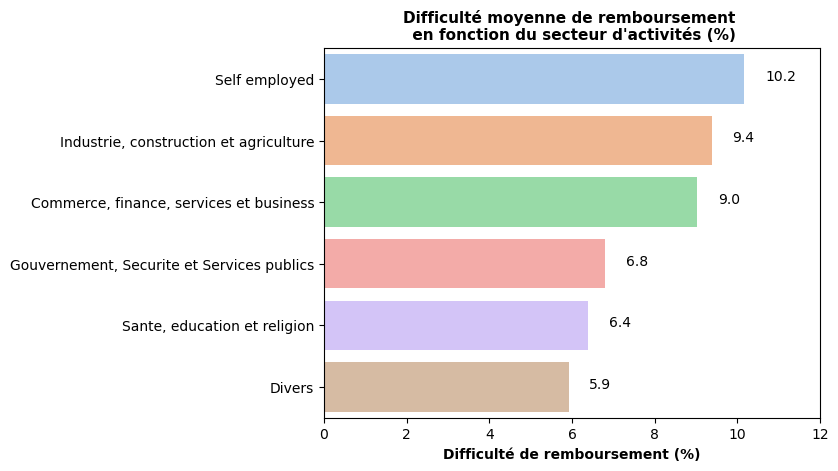

In [140]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = activite_client_sorted, x= activite_client_sorted["TARGET"]*100, y = "ORGANIZATION_TYPE")
    ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_xlim(0,12)
    ax.set_ylabel("")
    ax.set_title("Difficulté moyenne de remboursement \n en fonction du secteur d'activités (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
activity_client = activite_client_sorted["TARGET"]*100
for i, v in enumerate(activity_client):
    ax.text(v+0.5,i+0.02, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

**De mon point de vue, il est difficile de conclure sur la difficulté de remboursement selon le secteur d'activités du client.**

### 7. Remboursement en fonction de l'emploi du client

**1. SANS FEATURE ENGINEERING**

In [141]:
# Création d'une variable activite_client
emploi_client = train[["TARGET", "OCCUPATION_TYPE"]]

# Réalisation d'un groupby
emploi_client = emploi_client.groupby("OCCUPATION_TYPE")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
emploi_client_sorted = emploi_client.sort_values(by="TARGET", ascending=False)
emploi_client_sorted

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
18,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


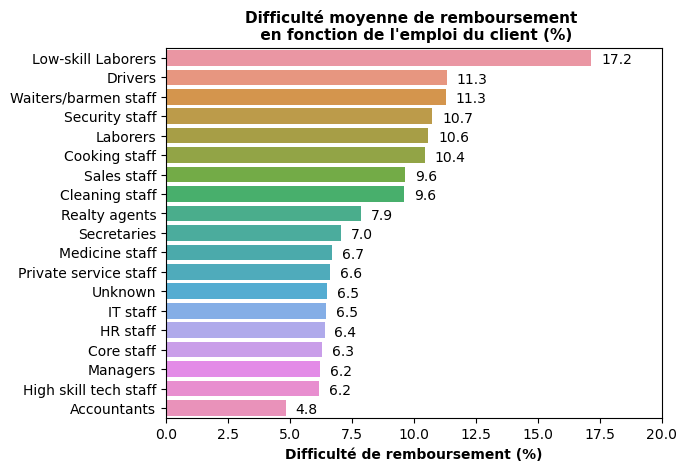

In [142]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = emploi_client_sorted, x= emploi_client_sorted["TARGET"]*100, y = "OCCUPATION_TYPE")
    ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_xlim(0,20)
    ax.set_ylabel("")
    ax.set_title("Difficulté moyenne de remboursement \n en fonction de l'emploi du client (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
emploi_nombre = emploi_client_sorted["TARGET"]*100
for i, v in enumerate(emploi_nombre):
    ax.text(v+0.4,i+0.30, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

**2. AVEC FEATURE ENGINEERING**

In [143]:
# Création d'une variable activite_client
emploi_client_engineering = train[["TARGET", "EMPLOI"]]

# Réalisation d'un groupby
emploi_client_engineering = emploi_client_engineering.groupby("EMPLOI")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
emploi_client_engineering_sorted = emploi_client_engineering.sort_values(by="TARGET", ascending=False)
emploi_client_engineering_sorted

,EMPLOI,TARGET
3,Personnel manuel et entretien,0.107279
2,Personnel de vente et de service client,0.096081
1,"Personnel de securite, transport et logistique",0.086342
4,Unknown,0.065131
0,"Personnel administratif, de gestion et specialise",0.060760


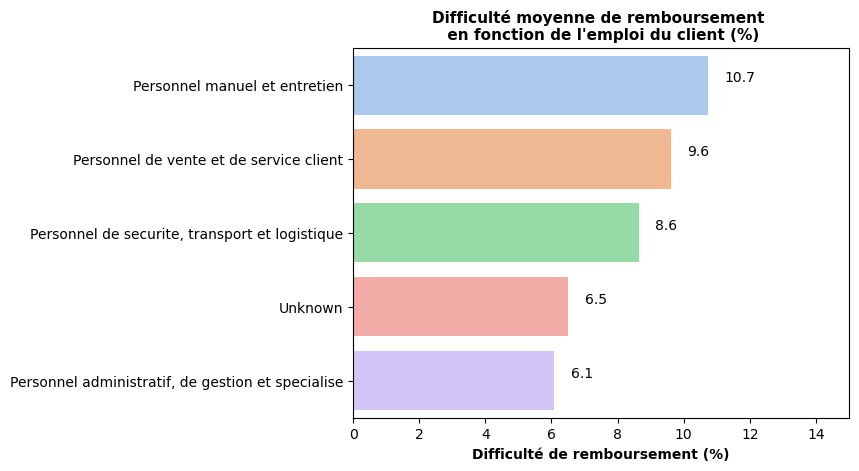

In [144]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette="pastel"):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = emploi_client_engineering_sorted, x= emploi_client_engineering_sorted["TARGET"]*100, y = "EMPLOI")
    ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_xlim(0,15)
    ax.set_ylabel("")
    ax.set_title("Difficulté moyenne de remboursement \n en fonction de l'emploi du client (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
emploi_nombre_engineering = emploi_client_engineering_sorted["TARGET"]*100
for i, v in enumerate(emploi_nombre_engineering):
    ax.text(v+0.5,i-0.05, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

*Il semble tout à fait pertinent que le personnel manuel et d'entretien présente en moyenne plus de difficultés de remboursement... La variable d'origine peut donc être éliminée. Néanmoins, étant en présence de 31% d'emplois non renseignés (output 67), cette variable est à prendre avec précaution.*

In [145]:
# Comptage du nombre de clients par type d'emploi
emploi_counts = train['EMPLOI'].value_counts()
print(emploi_counts)

EMPLOI
Unknown                                              96391
Personnel manuel et entretien                        61932
Personnel administratif, de gestion et specialise    54246
Personnel de securite, transport et logistique       52894
Personnel de vente et de service client              42048
Name: count, dtype: int64


In [146]:
# Elimination de la variable initiale dans le jeu d'entrainement
train = train.drop("OCCUPATION_TYPE", axis = 1)

# Elimination de la variable initiale dans le jeu de test
test = test.drop("OCCUPATION_TYPE", axis = 1)

### 8. Remboursement en fonction l'ancienneté du client dans son emploi actuel

**Afin de faciliter la visualisation, nous allons réaliser des tranches d'ancienneté de 5 ans et nous focaliser uniquement sur les clients ayant des difficultés de remboursement.**

In [147]:
# Création d'un dataframe spécial
anciennete_data = train[["TARGET", "YEARS_EMPLOYED"]]

In [148]:
# Réalisation des tranches de 5 ans via la création d'une nouvelle variable

# Génération des étiquettes et des intervalles
labels = ["<0", "0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45"]
bins = [-float('inf'), 0, 5, 10, 15, 20, 25, 30, 35, 40, 45] 

anciennete_data['ANCIENNETE_BINNED'] = pd.cut(anciennete_data['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)
anciennete_data.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\4249642889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anciennete_data['ANCIENNETE_BINNED'] = pd.cut(anciennete_data['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)


,TARGET,YEARS_EMPLOYED,ANCIENNETE_BINNED
0,1,1.7,0-5
1,0,3.3,0-5
2,0,0.6,0-5
3,0,8.3,5-10
4,0,8.3,5-10


In [149]:
# Groupement par intervalle et calcul de la moyenne de l'ancienneté
anciennete_groups  = anciennete_data.groupby('ANCIENNETE_BINNED').mean()
anciennete_groups

,TARGET,YEARS_EMPLOYED
ANCIENNETE_BINNED,,
<0,0.053996,-2.000000
0-5,0.105947,2.347981
5-10,0.073867,7.151214
10-15,0.057806,12.178385
15-20,0.048397,17.203872
20-25,0.047687,22.110488
25-30,0.039940,27.234985
30-35,0.041390,32.260807
35-40,0.019162,36.991497


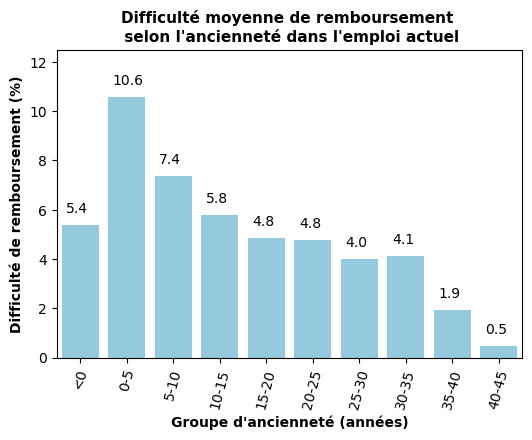

In [150]:
# Visualisation par histogramme

plt.figure(figsize = (6, 4))
plt.rcParams.update({"font.size" : 10})
sns.barplot(data = anciennete_groups, x= anciennete_groups.index.astype(str), y = anciennete_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 75)
plt.xlabel("Groupe d'ancienneté (années)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
plt.ylim(0,12.5)
plt.title("Difficulté moyenne de remboursement \n selon l'ancienneté dans l'emploi actuel", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
anciennete_nombre = anciennete_groups["TARGET"]*100
indices = anciennete_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.3, anciennete_nombre[idx]+0.5, round(anciennete_nombre[idx], 1))

plt.show()

**Nous pouvons clairement remarquer que l'ancienneté dans le dernier emploi présente un impact sur la difficulté de remboursement. HEUREUSEMENT que l'imputation pour les valeurs aberrantes n'a pas été réalisée sur la médiane!!!**

### 9. Possession d'un bien immobilier

In [151]:
# Création d'une variable bien_client
bien_client = train[["TARGET", "FLAG_OWN_REALTY"]]

# Réalisation d'un groupby
bien_client = bien_client.groupby("FLAG_OWN_REALTY")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
bien_client_sorted = bien_client.sort_values(by="TARGET", ascending=False)
bien_client_sorted

,FLAG_OWN_REALTY,TARGET
0,0,0.083249
1,1,0.079616


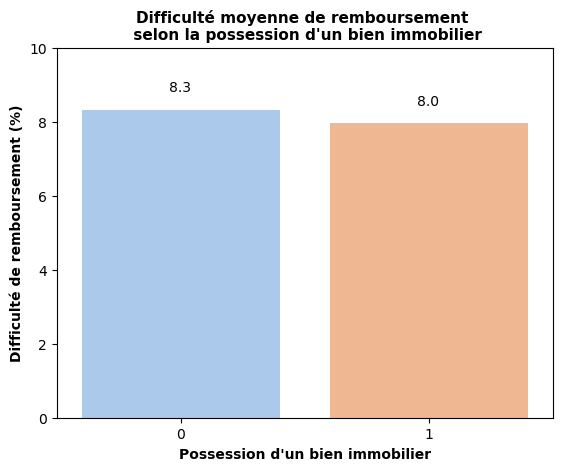

In [152]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette='pastel'):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = bien_client_sorted, x= "FLAG_OWN_REALTY", y = bien_client_sorted["TARGET"]*100)
    ax.set_xlabel("Possession d'un bien immobilier", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_ylim(0,10)
    ax.set_title("Difficulté moyenne de remboursement \n selon la possession d'un bien immobilier", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
bien_nombre = bien_client_sorted["TARGET"]*100
for i, v in enumerate(bien_nombre):
    ax.text(i-0.05, v+0.5, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

**Le fait de posséder ou non un bien immobilier ne semble pas influer sur la difficulté de remboursement d'un crédit.**

### 10. Remboursement en fonction du type de logement

In [153]:
# Création d'une variable type logement
type_logement = train[["TARGET", "NAME_HOUSING_TYPE"]]

# Réalisation d'un groupby
type_logement = type_logement.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
type_logement_sorted = type_logement.sort_values(by="TARGET", ascending=False)
type_logement_sorted

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


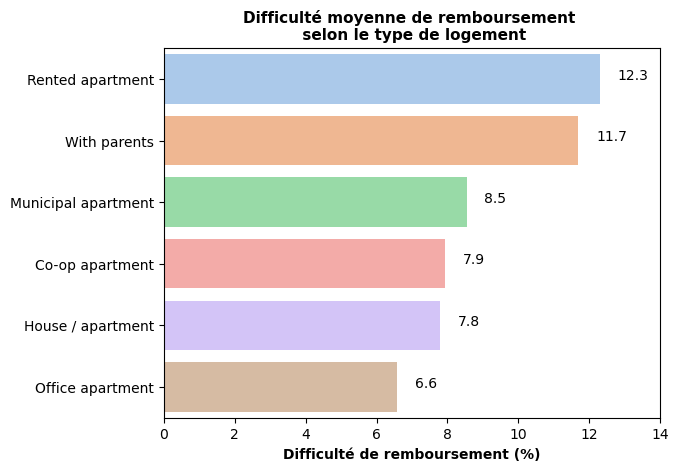

In [154]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette='pastel'):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = type_logement_sorted, y= "NAME_HOUSING_TYPE", x = type_logement_sorted["TARGET"]*100)
    ax.set_ylabel("")
    ax.set_xlim(0,14)
    ax.set_xlabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_title("Difficulté moyenne de remboursement \n selon le type de logement", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
logement_nombre = type_logement_sorted["TARGET"]*100
for i, v in enumerate(logement_nombre):
    ax.text(v+0.5, i, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

*Il semblerait que les clients étant en location ou habitant avec leurs parents aient davantage de difficultés de remboursement. Néanmoins, 88,7% des clients appartiennent à la catégorie House / apartment (output 36), rendant cette catégorie quasi-unique.*

In [155]:
# Comptage du nombre de clients par type d'hébergement
housing_counts = train['NAME_HOUSING_TYPE'].value_counts()
print(housing_counts)

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64


**CONCLUSION: Avec notre jeu de données, cette variable est à prendre avec précaution.**

### 11. Remboursement en fonction de la possession d'une voiture

In [156]:
# Création d'une variable car client
car_client = train[["TARGET", "FLAG_OWN_CAR"]]

# Réalisation d'un groupby
car_client = car_client.groupby("FLAG_OWN_CAR")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
car_client_sorted = car_client.sort_values(by="TARGET", ascending=False)
car_client_sorted

,FLAG_OWN_CAR,TARGET
0,0,0.085002
1,1,0.072437


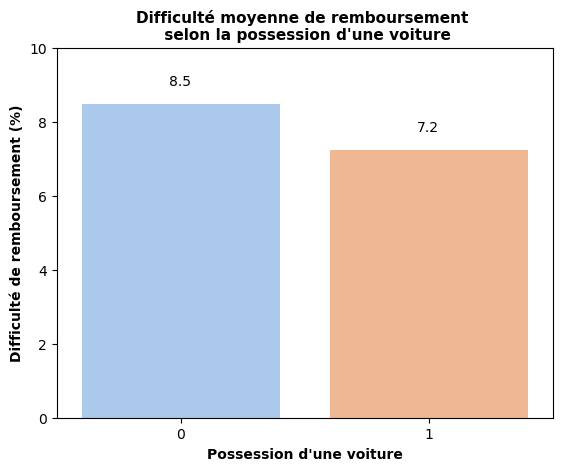

In [157]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette='pastel'):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = car_client_sorted, x= "FLAG_OWN_CAR", y = car_client_sorted["TARGET"]*100)
    ax.set_xlabel("Possession d'une voiture", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_ylim(0,10)
    ax.set_title("Difficulté moyenne de remboursement \n selon la possession d'une voiture", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
car_nombre = car_client_sorted["TARGET"]*100
for i, v in enumerate(car_nombre):
    ax.text(i-0.05, v+0.5, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

**Le fait de posséder ou non une voiture ne semble pas vraiment influer sur la difficulté de remboursement d'un crédit.**

### 12. Remboursement en fonction de l'accompagnement ou non de l'emprunteur

In [158]:
# Création du dataframe spécial
accompagnement_data = train[["TARGET", "NAME_TYPE_SUITE"]]

# Contenu de la variable 'NAME_TYPE_SUITE'
print(accompagnement_data["NAME_TYPE_SUITE"].unique().tolist())

['Unaccompanied', 'Accompanied', 'Unknown']


In [159]:
# Réalisation d'un groupby
accompagnement_data = accompagnement_data.groupby("NAME_TYPE_SUITE")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
accompagnement_data_sorted = accompagnement_data.sort_values(by="TARGET", ascending=False)
accompagnement_data_sorted

,NAME_TYPE_SUITE,TARGET
1,Unaccompanied,0.081830
0,Accompanied,0.076578
2,Unknown,0.054180


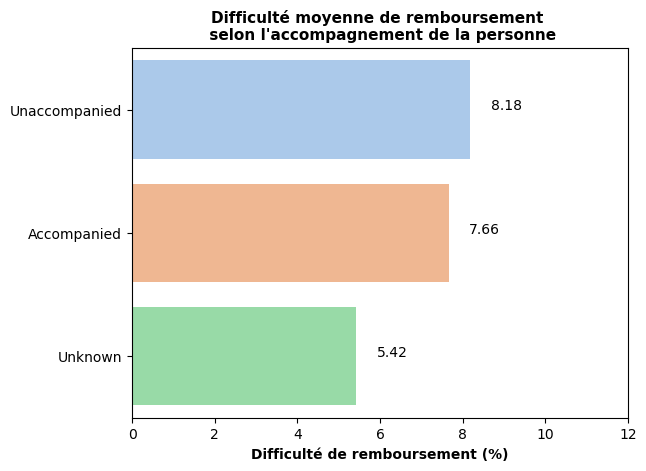

In [160]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette='pastel'):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = accompagnement_data_sorted, y= "NAME_TYPE_SUITE", x = accompagnement_data_sorted["TARGET"]*100)
    ax.set_ylabel("")
    ax.set_xlim(0,12)
    ax.set_xlabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_title("Difficulté moyenne de remboursement \n selon l'accompagnement de la personne", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
accompagnement_nombre = accompagnement_data_sorted["TARGET"]*100
for i, v in enumerate(accompagnement_nombre):
    ax.text(v+0.5, i, round(v, 2), fontsize=10, fontname="sans-serif")

plt.show()

**Le fait qu'une personne accompagne l'emprunteur ne semble pas impacter sur sa difficulté ou non de rembourser son prêt.**

**A NOTER: Un encodage manuel pour cette variable catégorielle sera effectué dès à présent.**

In [161]:
# Encodage "Unknown": -1, "Unaccompanied": 0, "Accompanied": 1 dans le jeu d'entraînement
train["NAME_TYPE_SUITE"] = train["NAME_TYPE_SUITE"].replace({"Unknown": -1, "Unaccompanied": 0, "Accompanied": 1})

# Encodage "Unknown": -1, "Unaccompanied": 0, "Accompanied": 1 dans le jeu de test
test["NAME_TYPE_SUITE"] = test["NAME_TYPE_SUITE"].replace({"Unknown": -1, "Unaccompanied": 0, "Accompanied": 1})

### 13. Remboursement en fonction du type de crédit

In [162]:
# Création d'une variable par client
type_credit_client = train[["TARGET", "NAME_CONTRACT_TYPE"]]

# Réalisation d'un groupby
type_credit_client = type_credit_client.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
type_credit_client_sorted = type_credit_client.sort_values(by="TARGET", ascending=False)
type_credit_client_sorted

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


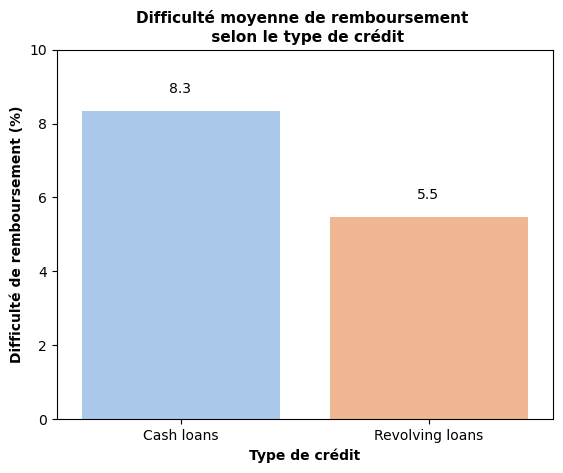

In [163]:
# Visualisation par histogramme

fig, ax = plt.subplots()
with sns.color_palette(palette='pastel'):
    plt.rcParams.update({"font.size" : 10})
    sns.barplot(data = type_credit_client_sorted, x= "NAME_CONTRACT_TYPE", y = type_credit_client_sorted["TARGET"]*100)
    ax.set_xlabel("Type de crédit", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
    ax.set_ylim(0,10)
    ax.set_title("Difficulté moyenne de remboursement \n selon le type de crédit", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
type_credit_nombre = type_credit_client_sorted["TARGET"]*100
for i, v in enumerate(type_credit_nombre):
    ax.text(i-0.05, v+0.5, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

**Bien que les 'revolving loans' soient minoritaires dans le jeu de données, ces derniers sont plus facilement remboursés.**

### 14. Remboursement en fonction du revenu du client

In [164]:
# Petit rappel sur la description de la variable
train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

**Afin de faciliter la visualisation, nous allons réaliser des tranches de 50000 et nous focaliser uniquement sur les clients ayant des difficultés de remboursement.**

In [165]:
# Création d'un dataframe spécial
revenu_data = train[["TARGET", "AMT_INCOME_TOTAL"]]

In [166]:
# Réalisation des tranches de revenu de 5000 via la création d'une nouvelle variable

# Génération des intervalles de 5000005 à 1500000 puis un > 1500000
bins = list(np.arange(25000, 1505000, 50000))
bins.append(np.inf)  # Ajoute une borne supérieure pour représenter les valeurs > 1500000

# Étiquettes pour chaque intervalle. -2 car nous avons un intervalle de plus pour > 1500000
labels = [f"{i}-{i+49999}" for i in bins[:-2]] + [">1500000"]

# Création de la la variable
revenu_data['INCOME_BINNED'] = pd.cut(revenu_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False, include_lowest=True)
revenu_data.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\2695836626.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenu_data['INCOME_BINNED'] = pd.cut(revenu_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False, include_lowest=True)


,TARGET,AMT_INCOME_TOTAL,INCOME_BINNED
0,1,202500.0,175000-224999
1,0,270000.0,225000-274999
2,0,67500.0,25000-74999
3,0,135000.0,125000-174999
4,0,121500.0,75000-124999


In [167]:
# Groupement par intervalle et calcul de la moyenne du revenu
revenu_groups  = revenu_data.groupby('INCOME_BINNED').mean()
revenu_groups

,TARGET,AMT_INCOME_TOTAL
INCOME_BINNED,,
25000-74999,0.078227,6.102612e+04
75000-124999,0.086184,1.010448e+05
125000-174999,0.085170,1.452561e+05
175000-224999,0.082203,1.906840e+05
225000-274999,0.073091,2.420231e+05
275000-324999,0.064750,3.052137e+05
325000-374999,0.058567,3.527852e+05
375000-424999,0.065020,3.965342e+05
425000-474999,0.058987,4.467784e+05


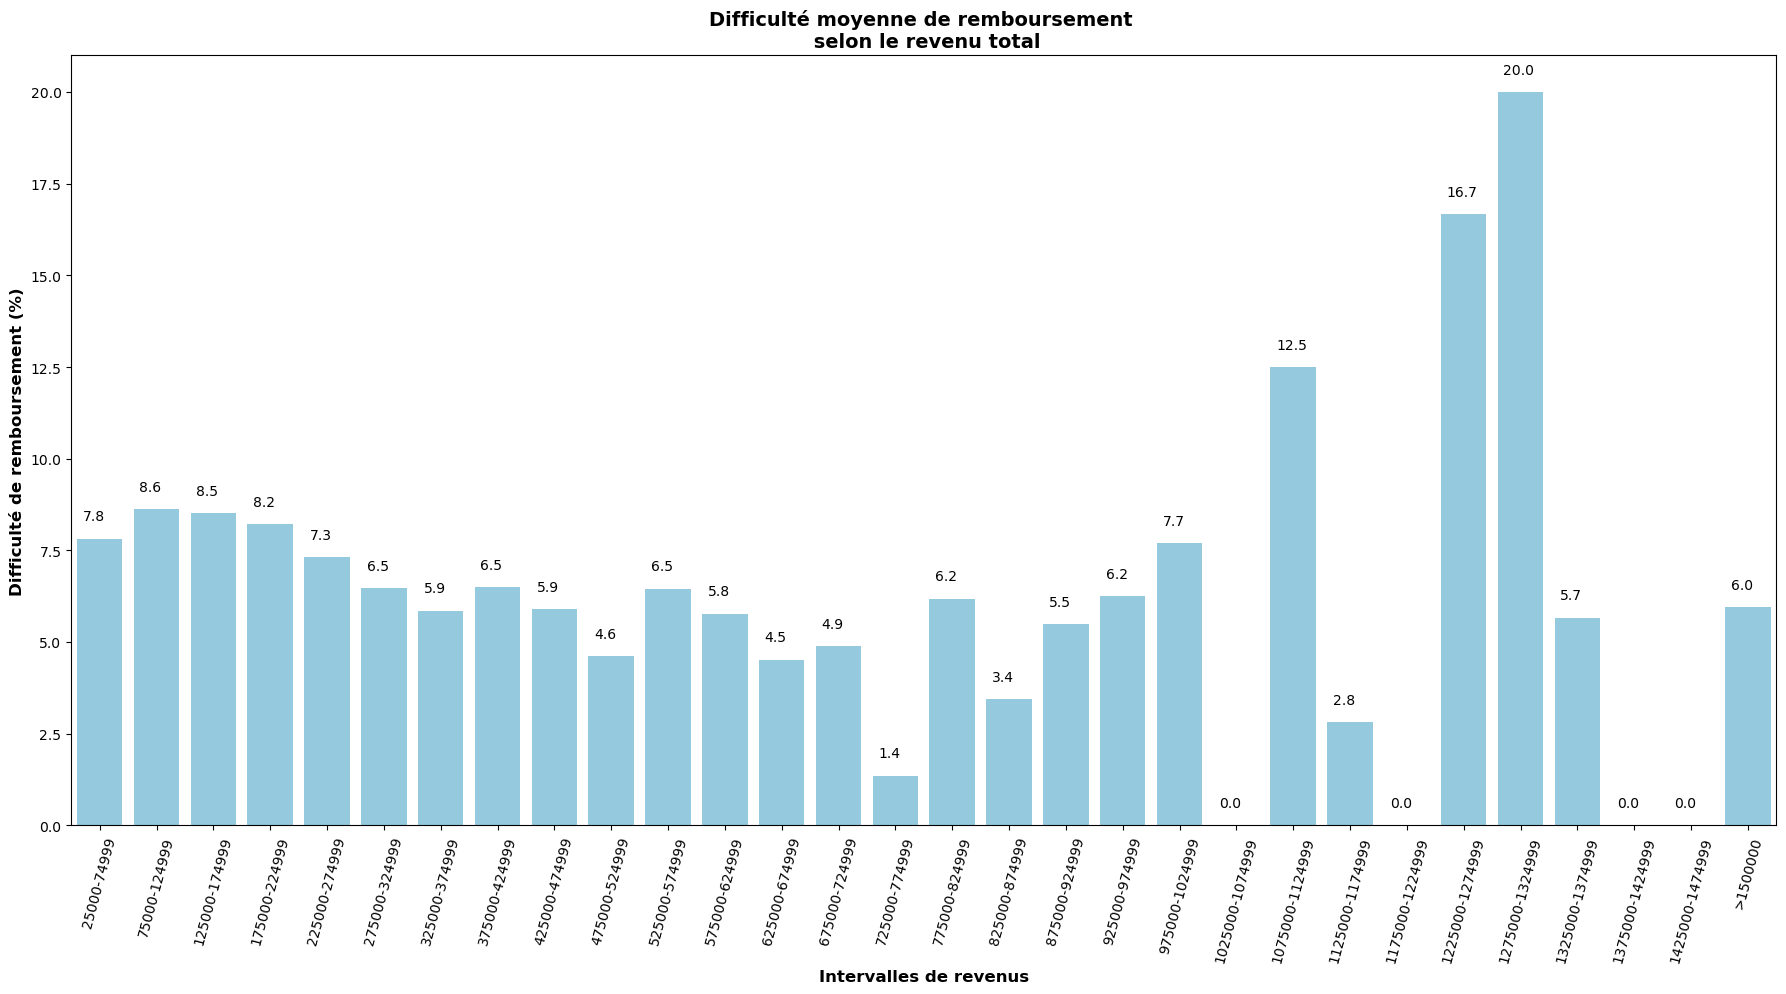

In [168]:
# Visualisation graphique

plt.figure(figsize = (22, 10))
plt.rcParams.update({"font.size" : 10})
sns.barplot(data = revenu_groups, x= revenu_groups.index.astype(str), y = revenu_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 75)
plt.xlabel("Intervalles de revenus", fontname = "sans-serif", fontsize = 12, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 12, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement \n selon le revenu total", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
    
revenu_total_nombre = revenu_groups["TARGET"]*100
indices = revenu_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.3, revenu_total_nombre[idx]+0.5, round(revenu_total_nombre[idx], 1))

plt.show()

**Je dois avouer que je suis assez surprise du résultat obtenu. En effet, les clients présentant d'importantes difficultés de paiements peuvent appartenir à des classes possédant des revenus élevés!!!**

### 15. Remboursement en fonction du montant du crédit

In [169]:
# Petit rappel sur le montant des crédits
train["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [170]:
# Création d'un dataframe spécial
montant_credit_data = train[["TARGET", "AMT_CREDIT"]]

In [171]:
# Réalisation des tranches de revenu de 50000 via la création d'une nouvelle variable

# Génération des intervalles de 45000 à 1000000 puis un > 1000000
bins =  list(np.arange(45000, 1005000, 50000)) + [np.inf]

# Étiquettes pour chaque intervalle
labels = [f"{i}-{i+49999}" for i in bins[:-2]] + [">1000000"]

# Création de la la variable
montant_credit_data['CREDIT_BINNED'] = pd.cut(montant_credit_data['AMT_CREDIT'], bins=bins, labels=labels, right=False, include_lowest=True)
montant_credit_data.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\1906305213.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  montant_credit_data['CREDIT_BINNED'] = pd.cut(montant_credit_data['AMT_CREDIT'], bins=bins, labels=labels, right=False, include_lowest=True)


,TARGET,AMT_CREDIT,CREDIT_BINNED
0,1,406597.5,395000-444999
1,0,1293502.5,>1000000
2,0,135000.0,95000-144999
3,0,312682.5,295000-344999
4,0,513000.0,495000-544999


In [172]:
# Groupement par intervalle et calcul de la moyenne du montant du crédit
credit_groups  = montant_credit_data.groupby('CREDIT_BINNED').mean()
credit_groups

,TARGET,AMT_CREDIT
CREDIT_BINNED,,
45000-94999,0.055721,7.096218e+04
95000-144999,0.062859,1.239228e+05
145000-194999,0.075713,1.721022e+05
195000-244999,0.076685,2.220697e+05
245000-294999,0.079900,2.680206e+05
295000-344999,0.098877,3.199017e+05
345000-394999,0.098594,3.681095e+05
395000-444999,0.106894,4.171424e+05
445000-494999,0.096810,4.602496e+05


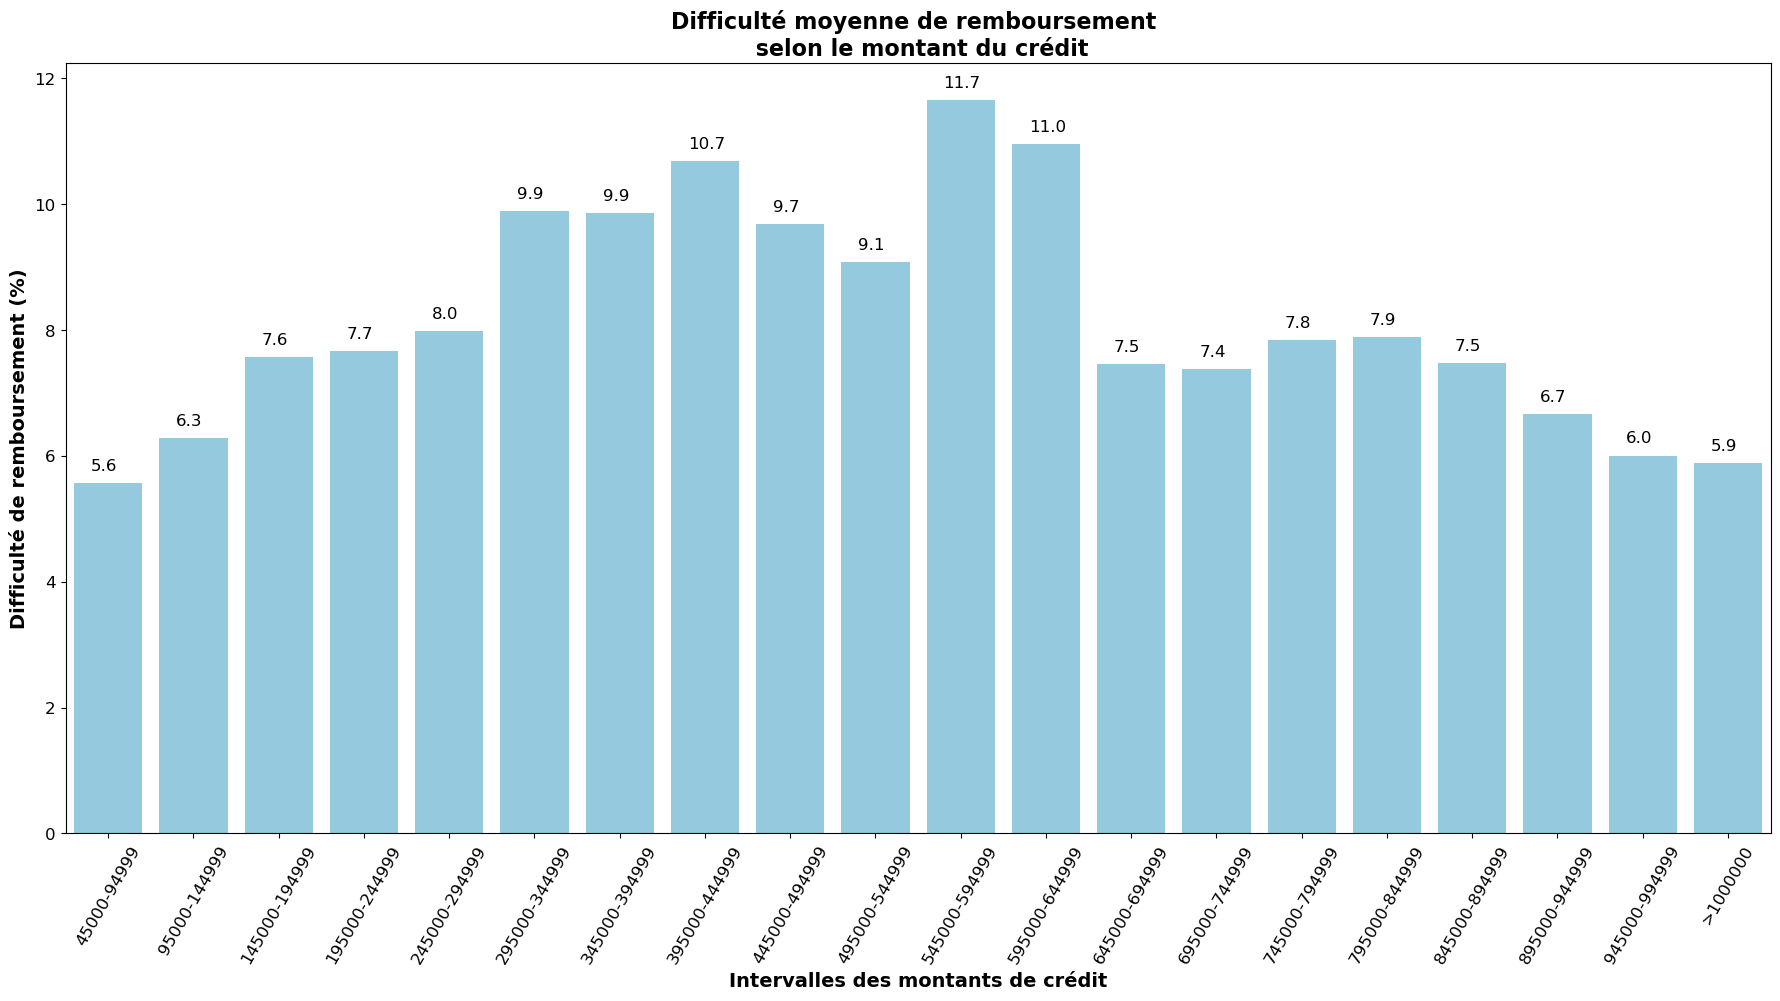

In [173]:
# Visualisation par histogramme

plt.figure(figsize = (22, 10))
plt.rcParams.update({"font.size" : 12})
sns.barplot(data = credit_groups, x= credit_groups.index.astype(str), y = credit_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 60)
plt.xlabel("Intervalles des montants de crédit", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement \n selon le montant du crédit", fontname = "sans-serif", fontsize = 16, fontweight = "bold")
    
credit_total_nombre = credit_groups["TARGET"]*100
indices = credit_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.2, credit_total_nombre[idx]+0.2, round(credit_total_nombre[idx], 1))

plt.show()

**Nous sommes davantage en présence d'une distribution gaussienne.**

### 16. Remboursement en fonction de montant versé périodiquement

In [174]:
# Petit rappel de la variable
train["AMT_ANNUITY"].describe()

count    307511.000000
mean      27107.515973
std       14494.443903
min          -2.000000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [175]:
# Création d'un dataframe
loan_data = train[["TARGET", "AMT_ANNUITY"]]

# Génération des intervalles
bins = [-np.inf] + list(np.arange(0, 201000, 10000)) + [np.inf]

# Étiquettes pour chaque intervalle
labels =  ["<0"] + [f"{i}-{i+9999}" for i in bins[1:-2]] + [">200000"]

# Création de la la variable
loan_data['ANNUITY_BINNED'] = pd.cut(loan_data['AMT_ANNUITY'], bins=bins, labels=labels, right=False)
loan_data.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\1099932455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['ANNUITY_BINNED'] = pd.cut(loan_data['AMT_ANNUITY'], bins=bins, labels=labels, right=False)


,TARGET,AMT_ANNUITY,ANNUITY_BINNED
0,1,24700.5,20000-29999
1,0,35698.5,30000-39999
2,0,6750.0,0-9999
3,0,29686.5,20000-29999
4,0,21865.5,20000-29999


In [176]:
# Groupement par intervalle et calcul de la moyenne du montant versé périodiquement
loan_groups = loan_data.groupby('ANNUITY_BINNED').mean()
loan_groups

,TARGET,AMT_ANNUITY
ANNUITY_BINNED,,
<0,0.000000,-2.000000
0-9999,0.070867,7933.850213
10000-19999,0.077311,15123.163659
20000-29999,0.089309,24812.754331
30000-39999,0.089666,34404.340741
40000-49999,0.070076,44439.810039
50000-59999,0.067452,54132.203266
60000-69999,0.042962,64845.449911
70000-79999,0.046855,73931.103659


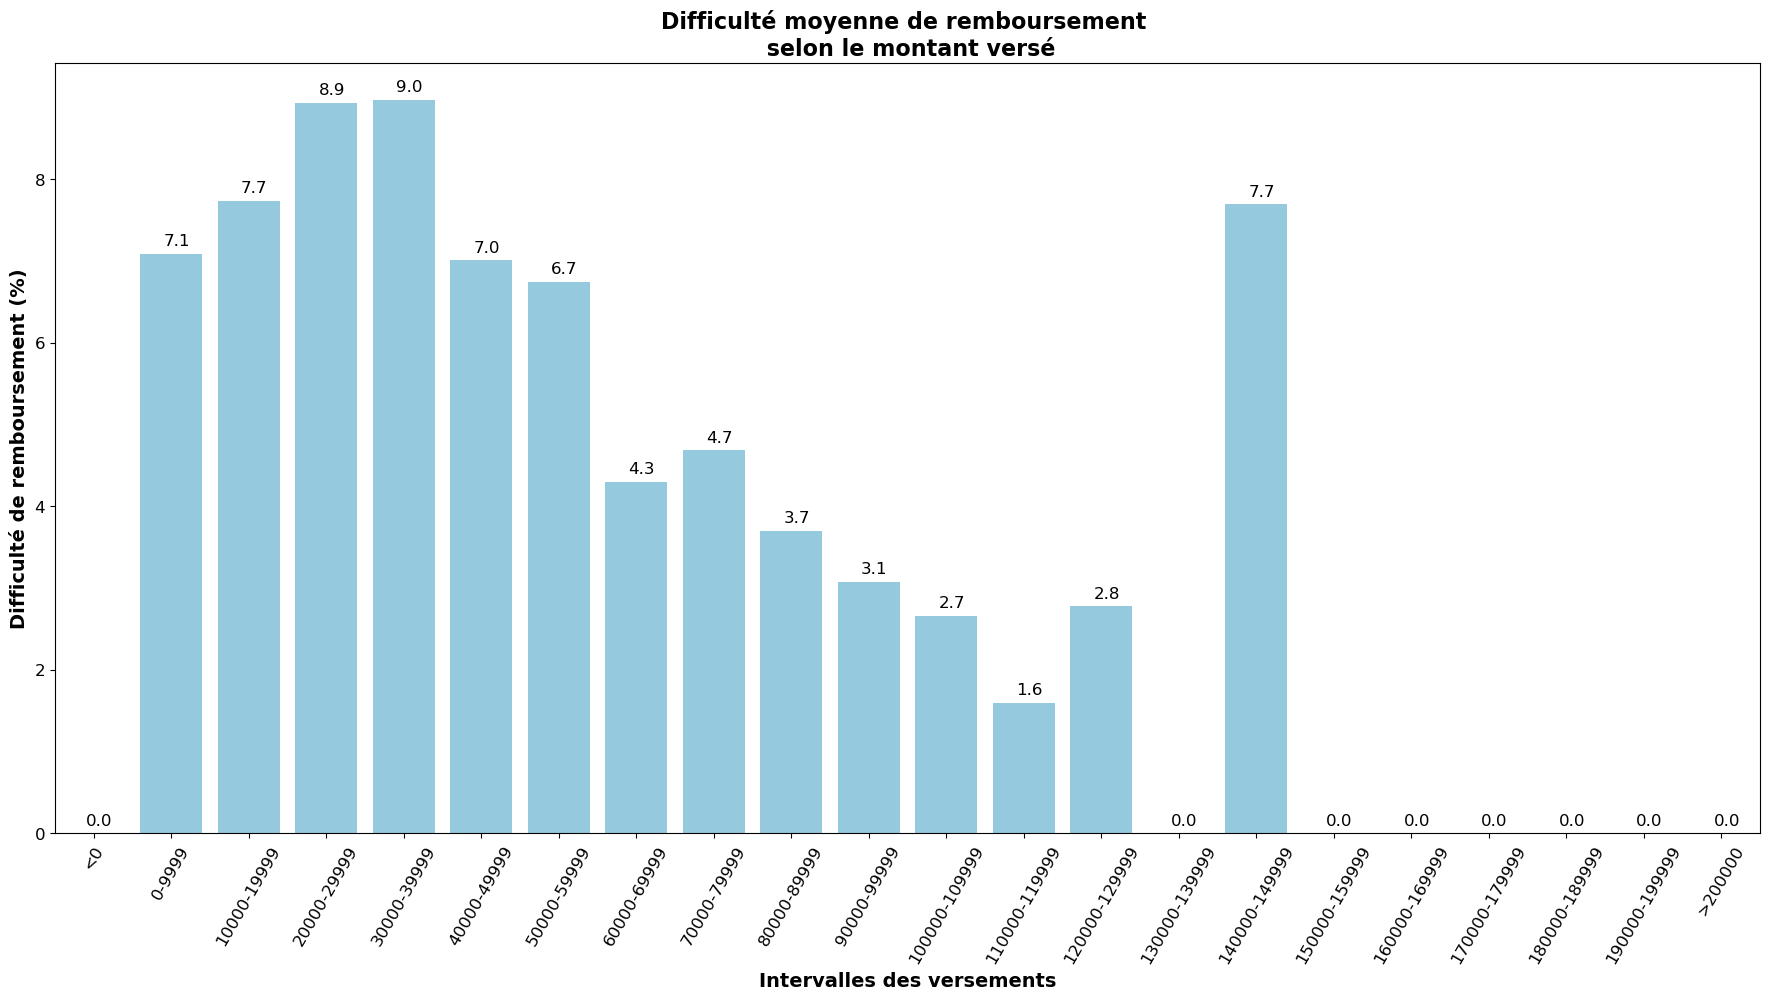

In [177]:
# Visualisation graphique

plt.figure(figsize = (22, 10))
plt.rcParams.update({"font.size" : 12})
sns.barplot(data = loan_groups, x= loan_groups.index.astype(str), y = loan_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 60)
plt.xlabel("Intervalles des versements", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement \n selon le montant versé", fontname = "sans-serif", fontsize = 16, fontweight = "bold")
    
loan_nombre = loan_groups["TARGET"]*100
indices = loan_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.1, loan_nombre[idx]+0.1, round(loan_nombre[idx], 1))

plt.show()

**Il ne semble pas y avoir de relation linéaire entre le montant versé et la difficulté de remboursement.**

### 17. Difficulté de remboursement selon le montant de l'annuité par rapport au revenu total du client (%)

In [178]:
# Création d'un dataframe
remb_rev = train[["TARGET", "ANNUITY_INCOME_PERC"]]

# Génération des intervalles
bins = list(np.arange(0, 204, 40))

# Étiquettes pour chaque intervalle
labels = [f"{i}-{i+39}" for i in bins[:-1]]

# Création de la la variable
remb_rev['REMB_REV_BINNED_BINNED'] = pd.cut(remb_rev['ANNUITY_INCOME_PERC'], bins=bins, labels=labels, right=False)
remb_rev.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\1755138658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remb_rev['REMB_REV_BINNED_BINNED'] = pd.cut(remb_rev['ANNUITY_INCOME_PERC'], bins=bins, labels=labels, right=False)


,TARGET,ANNUITY_INCOME_PERC,REMB_REV_BINNED_BINNED
0,1,12.197778,0-39
1,0,13.221667,0-39
2,0,10.000000,0-39
3,0,21.990000,0-39
4,0,17.996296,0-39


In [179]:
# Groupement par intervalle et calcul de la moyenne du montant versé périodiquement
remb_rev_groups = remb_rev.groupby('REMB_REV_BINNED_BINNED').mean()
remb_rev_groups

,TARGET,ANNUITY_INCOME_PERC
REMB_REV_BINNED_BINNED,,
0-39,0.080681,17.265069
40-79,0.082582,48.357558
80-119,0.066667,90.686804
120-159,0.375000,137.681693
160-199,1.000000,187.596491


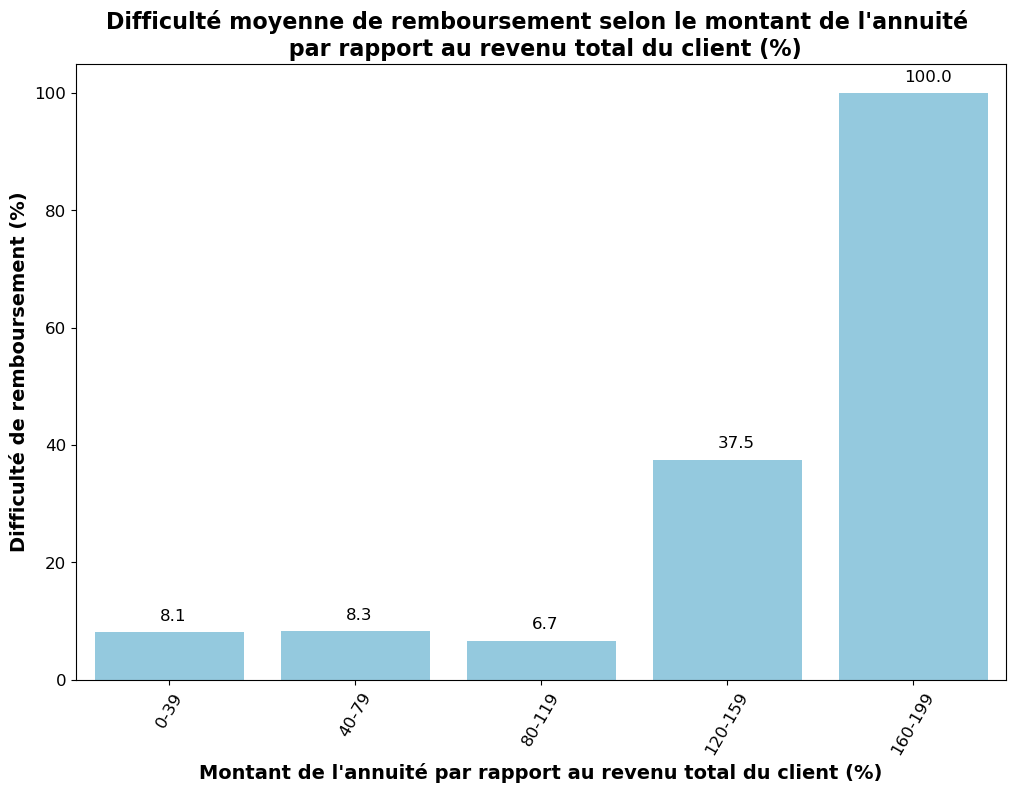

In [180]:
# Visualisation par histogramme

plt.figure(figsize = (12, 8))
plt.rcParams.update({"font.size" : 12})
sns.barplot(data = remb_rev_groups, x= remb_rev_groups.index.astype(str), y = remb_rev_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 60)
plt.xlabel("Montant de l'annuité par rapport au revenu total du client (%)", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement selon le montant de l'annuité \n par rapport au revenu total du client (%)", fontname = "sans-serif", fontsize = 16, fontweight = "bold")
    
remb_rev_nombre = remb_rev_groups["TARGET"]*100
indices = remb_rev_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.05, remb_rev_nombre[idx]+2, round(remb_rev_nombre[idx], 1))

plt.show()

**Je dois avouer que je suis assez surprise du résultat obtenu. En effet, les clients présentant davantage de difficulté de paiements appartiennent aux classes possédant des revenus élevés!!!** 

### 18. Difficulté de paiement selon le montant de l'annuité par rapport au montant du crédit (%)

In [181]:
# Description de la variable
train['ANNUITY_RATE_PERC'].describe()

count    307511.000000
mean          5.369212
std           2.248548
min          -2.000000
25%           3.690039
50%           5.000000
75%           6.404281
max          12.442958
Name: ANNUITY_RATE_PERC, dtype: float64

In [182]:
# Création d'un dataframe
remb_mont = train[["TARGET", "ANNUITY_RATE_PERC"]]

# Génération des intervalles
bins = [-np.inf] + list(np.arange(0, 13, 3)) + [np.inf]

# Étiquettes pour chaque intervalle
labels =  ["<0"] + [f"{i}-{i+2}" for i in bins[1:-2]] + [">12"]

# Création de la la variable
remb_mont['REMB_MONT_BINNED'] = pd.cut(remb_mont['ANNUITY_RATE_PERC'], bins=bins, labels=labels, right=False)
remb_mont.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\3284341224.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remb_mont['REMB_MONT_BINNED'] = pd.cut(remb_mont['ANNUITY_RATE_PERC'], bins=bins, labels=labels, right=False)


,TARGET,ANNUITY_RATE_PERC,REMB_MONT_BINNED
0,1,6.074927,6-8
1,0,2.759832,0-2
2,0,5.000000,3-5
3,0,9.494135,9-11
4,0,4.262281,3-5


In [183]:
# Groupement par intervalle et calcul de la moyenne du montant versé périodiquement
remb_mont_groups = remb_mont.groupby('REMB_MONT_BINNED').mean()
remb_mont_groups

,TARGET,ANNUITY_RATE_PERC
REMB_MONT_BINNED,,
<0,0.000000,-2.000000
0-2,0.058429,2.857541
3-5,0.080828,4.511672
6-8,0.118316,7.116766
9-11,0.052257,10.338462
>12,0.103152,12.101759


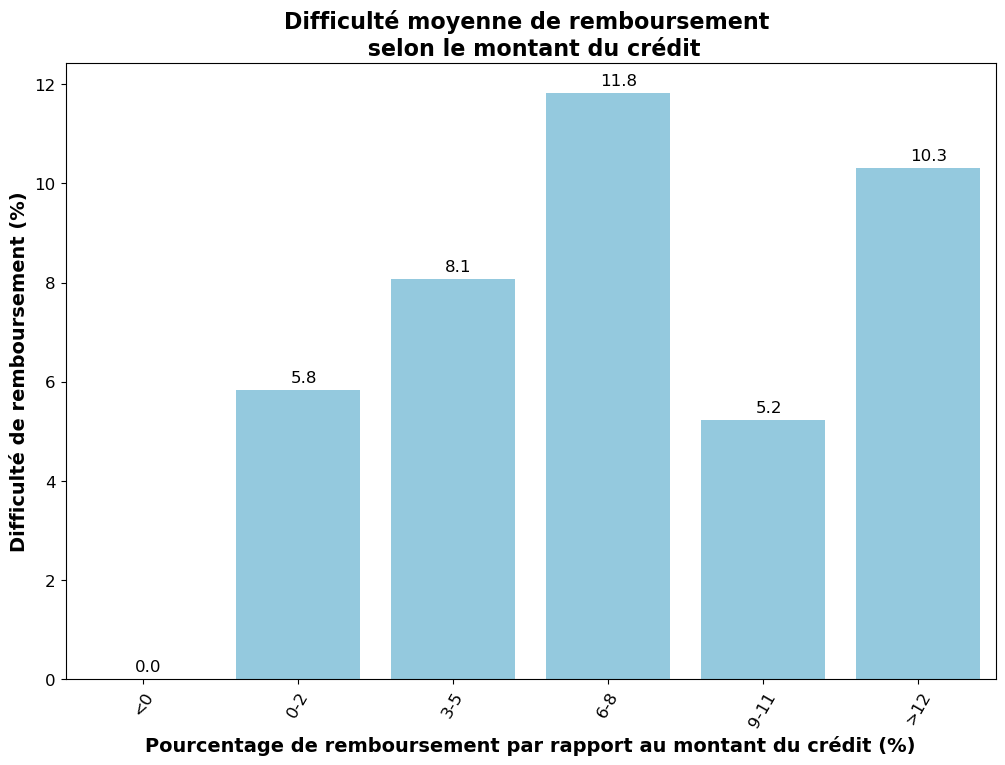

In [184]:
# Visualisation par histogramme

plt.figure(figsize = (12, 8))
plt.rcParams.update({"font.size" : 12})
sns.barplot(data = remb_mont_groups, x= remb_mont_groups.index.astype(str), y = remb_mont_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 60)
plt.xlabel("Pourcentage de remboursement par rapport au montant du crédit (%)", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement \n selon le montant du crédit", fontname = "sans-serif", fontsize = 16, fontweight = "bold")
    
remb_mont_nombre = remb_mont_groups["TARGET"]*100
indices = remb_mont_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.05, remb_mont_nombre[idx]+0.15, round(remb_mont_nombre[idx], 1))

plt.show()

**Il ne semble pas y avoir de lien entre la difficulté de remboursement de l'annuité par rapport au montant du crédit.**

###  19. Difficulté de paiement selon le montant du crédit par rapport au revenu total du client (%)

In [185]:
# Création d'un dataframe
cred_revenu = train[["TARGET", "CREDIT_INCOME_PERC"]]

# Génération des intervalles
bins = list(np.arange(0, 3050, 500))
bins.append(np.inf)

# Étiquettes pour chaque intervalle
labels = [f"{i}-{i+499}" for i in bins[:-2]] + ["> 3500"]

# Création de la la variable
cred_revenu['CRED_MONT_BINNED_BINNED'] = pd.cut(cred_revenu['CREDIT_INCOME_PERC'], bins=bins, labels=labels, right=False, include_lowest=True)
cred_revenu.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_9696\371787804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cred_revenu['CRED_MONT_BINNED_BINNED'] = pd.cut(cred_revenu['CREDIT_INCOME_PERC'], bins=bins, labels=labels, right=False, include_lowest=True)


,TARGET,CREDIT_INCOME_PERC,CRED_MONT_BINNED_BINNED
0,1,200.788889,0-499
1,0,479.075000,0-499
2,0,200.000000,0-499
3,0,231.616667,0-499
4,0,422.222222,0-499


In [186]:
# Groupement par intervalle et calcul de la moyenne du montant versé périodiquement
cred_revenu_groups = cred_revenu.groupby('CRED_MONT_BINNED_BINNED').mean()
cred_revenu_groups

,TARGET,CREDIT_INCOME_PERC
CRED_MONT_BINNED_BINNED,,
0-499,0.083342,264.880142
500-999,0.074955,669.232289
1000-1499,0.063500,1159.077061
1500-1999,0.079199,1668.867545
2000-2499,0.064865,2185.092346
2500-2999,0.142857,2687.419909
> 3500,0.250000,3553.815784


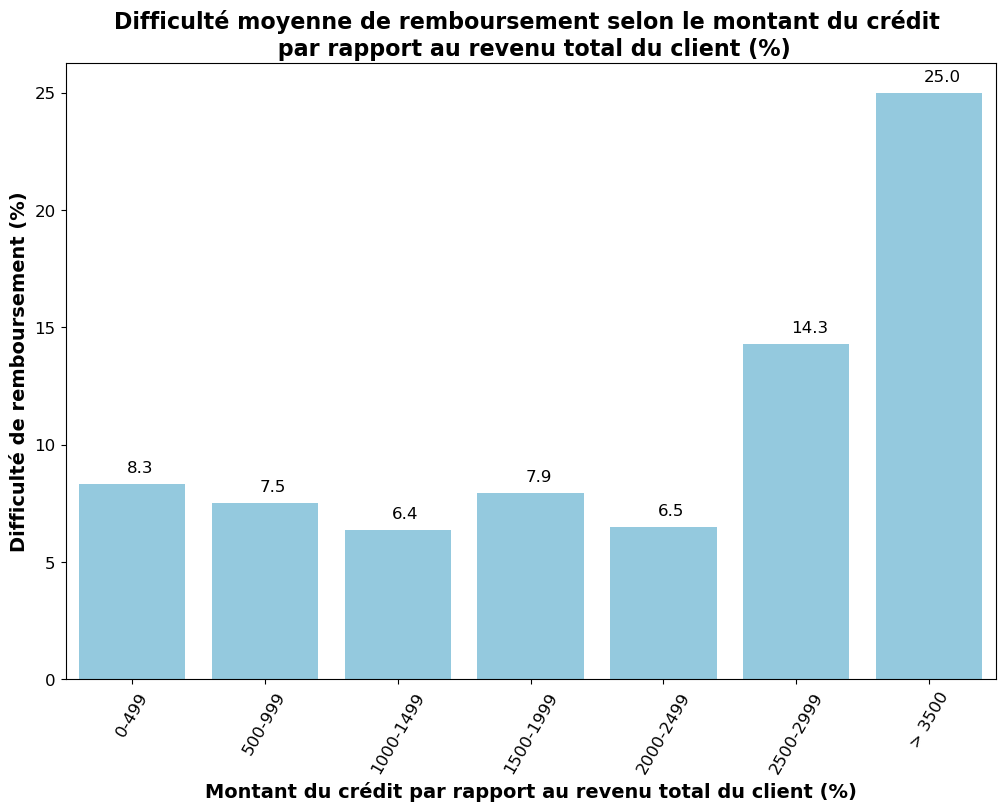

In [187]:
# Visualisation par histogramme

plt.figure(figsize = (12, 8))
plt.rcParams.update({"font.size" : 12})
sns.barplot(data = cred_revenu_groups, x= cred_revenu_groups.index.astype(str), y = cred_revenu_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 60)
plt.xlabel("Montant du crédit par rapport au revenu total du client (%)", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement selon le montant du crédit \n par rapport au revenu total du client (%)", fontname = "sans-serif", fontsize = 16, fontweight = "bold")
    
cred_revenu_nombre = cred_revenu_groups["TARGET"]*100
indices = cred_revenu_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.04, cred_revenu_nombre[idx]+0.5, round(cred_revenu_nombre[idx], 1))

plt.show()

**Plus le montant du crédit est important par rapport aux revenus du client, plus ce dernier semble rencontrer des difficultés de remboursement.**

## 1.3. Les corrélations linéaires

### 1. Détection des corrélations linéaires

**Nous pouvons dire que nous sommes en présence de fortes corrélations linéaires positives au-dessus du seuil de 0.8 et de fortes corrélations linéaires négatives en-dessous du seuil de -0.8.** 

**Etant en présence d'un grand nombre de variables numériques, une heatmap est inenvisageable. C'est pourquoi, nous nous baserons sur les seuils fixés ci-dessus.**

**A NOTER: Cette dernière nous servira à éliminer les fortes corrélations pour les variables n'étant présentes que dans les jeux d'entraînement et de test.**

In [188]:
# Matrice des corrélations
train_numerique = train.select_dtypes(exclude='object')
corr_mat_train = train_numerique.corr()

# Combinaisons de paires de variables triées par leurs valeurs de corrélation
corr_pairs_train = corr_mat_train.unstack()
sorted_pairs_train = corr_pairs_train.sort_values(kind="quicksort")

In [189]:
# Les fortes corrélations
strong_pairs_train = sorted_pairs_train[abs(sorted_pairs_train >= 0.8) & abs(sorted_pairs_train!=1)]
print(strong_pairs_train)

REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825575
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.825575
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860627
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.871103
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.871103
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879117
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879117
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
AMT_GOODS_PRICE              AMT_CREDIT                     0.986687
AMT_CREDIT                   AMT_GOODS_PRICE                0.986687
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998500
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998500
dtype: float64


**Présence de 7 fortes corrélations sur des variables dans le jeux d'entraînement**
- **REGION_RATING_CLIENT_W_CITY et REGION_RATING_CLIENT**: Il est préférable de conserver la variable REGION_RATING_CLIENT_W_CITY car plus précise (notation du client basée sur sa région de résidence, influencée ou ajustée en fonction de la ville spécifique dans laquelle il vit)
- **AMT_CREDIT et AMT_GOODS_PRICE**: Cette corrélation est tout à fait logique pour les crédits à la consommation. La variable AMT_CREDIT reflétant vraiment le montant du crédit, cette dernière sera conservéé. Ceci est d'autant plus justifiable que la variable AMT_GOODS_PRICE présente des valeurs manquantes.
- **REG_CITY_NOT_WORK_CITY et LIVE_CITY_NOT_WORK_CITY**: Envisageant dès le départ de supprimer ces 2 variables et de ne conserver éventuellement que la variable REG_REGION_NOT_LIVE_REGION (signale si l'adresse permanente d'un client est la même que son adresse de contact), ces 2 variables seront supprimées.
- **REG_REGION_NOT_WORK_REGION et REGION_RATING_CLIENT**: Suppression des 2 variables (idem que pour les 2 variables précédentes).
- **DEF_60_CNT_SOCIAL_CIRCLE et DEF_30_CNT_SOCIAL_CIRCLE**: Il ne s'agit pas du retard de remboursement du client mais de son entourage... Si non sommes déjà en possession de retard jusque 30 jours, je pense que nous sommes déjà en présence d'une information importante. Par conséquent, seule la variable DEF_30_CNT_SOCIAL_CIRCLE sera conservée.
- **OBS_60_CNT_SOCIAL_CIRCLE et OBS_30_CNT_SOCIAL_CIRCLE**: Même raisonnement que prédemment. 
- **CNT_CHILDREN et CNT_FAM_MEMBERS**: Il est préférable de conserver CNT_FAM_MEMBERS car elle prend en compte le conjoint.

### 2. Elimination des variables fortement corrélées dans les jeux d'entraînement et de test ainsi que de la variable 'OWN_CAR_AGE'

**A NOTER**: Il n'est nullement question d'éliminer des variables en fonction des pourcentages de valeurs manquantes. Néanmoins, la variable 'OWN_CAR_AGE' sera tout de même éliminée pour 4 raisons:
- Plus de 65% de valeurs manquantes.
- Présence de voitures de plus de 90 ans.
- Concerne uniquement les personnes possèdant une voiture, alors que la variable 'FLAG_OWN_CAR' concerne tous les clients.
- Cette dernière est fortement corrélée avec 'FLAG_OWN_CAR' si nous faisons une analyse des corrélations après imputation des valeurs manquantes (-9999 corrélation et -1 pas de corrélation)

In [190]:
# Elimination du jeu d'entraînement
train = train.drop(["REGION_RATING_CLIENT", "AMT_GOODS_PRICE", "REG_CITY_NOT_WORK_CITY", 
                    "LIVE_CITY_NOT_WORK_CITY", "REG_REGION_NOT_WORK_REGION", "REGION_RATING_CLIENT",
                   "DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "CNT_CHILDREN", "OWN_CAR_AGE"], axis=1)

# Elimination du jeu de test
test = test.drop(["REGION_RATING_CLIENT", "AMT_GOODS_PRICE", "REG_CITY_NOT_WORK_CITY", 
                    "LIVE_CITY_NOT_WORK_CITY", "REG_REGION_NOT_WORK_REGION", "REGION_RATING_CLIENT",
                   "DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "CNT_CHILDREN", "OWN_CAR_AGE"], axis=1)

In [191]:
# Informations sur le jeu de données d'entraînement
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  int64  
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  int64  
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [192]:
print("Dimension du jeu de données d'entraînement")
print(f"Le jeu d'entraînement comprend {train.shape[0]} clients et {train.shape[1]} variables.")
print("---------------------------------------------------------------------------------------")
print("Dimension du jeu de données de test")
print(f"Le jeu de test comprend {test.shape[0]} clients et {test.shape[1]} variables.")

Dimension du jeu de données d'entraînement
Le jeu d'entraînement comprend 307511 clients et 35 variables.
---------------------------------------------------------------------------------------
Dimension du jeu de données de test
Le jeu de test comprend 48744 clients et 34 variables.


## 1.4. Encodage des variables catégorielles

**L'encodage sera réalisé via one hot encoder et non pd.get_dummies. Initialement, j'avais réalisé un pd.get_dummies mais cela engendrait des différences au niveau du nombre de variables entre les jeux de d'entraînement et de test. Afin d'éviter celà, j'ai réalisé un one hot encoder en concaténant provisoirement les 2 jeux de données et en ajoutant une colonne temporairement 'target' dans le jeu de test.**

In [193]:
from sklearn.preprocessing import OneHotEncoder

# Ajout d'une colonne pour identifier l'origine du jeu de données
train['set'] = 'train'
test['set'] = 'test'

# Ajout temporaire d'une colonne target avec une valeur fictive dans le jeu de données test
if 'TARGET' not in test.columns:
    test['TARGET'] = -1  

# Concaténation des 2 jeux de données
combined = pd.concat([train, test], axis=0, sort=False)

# Application de l'encodage
object_cols = combined.select_dtypes(include=['object']).columns.tolist()

# Exclusion de la colonne 'set' car elle n'a pas besoin d'être encodée
object_cols.remove('set')

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(combined[object_cols])

encoded_cols = encoder.get_feature_names_out(object_cols)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)
combined = combined.reset_index(drop=True)

# Mise à jour du dataFrame combiné
encoded_df = encoded_df.reset_index(drop=True)
combined = combined.drop(object_cols, axis=1)         # Suppression des colonnes catégorielles originales du DataFrame combiné
combined = pd.concat([combined, encoded_df], axis=1)  # Ajout des colonnes encodées au DataFrame combiné

# Séparation des jeux d'entraînement et de test
train_encoded = combined[combined['set'] == 'train'].drop('set', axis=1)
test_encoded = combined[combined['set'] == 'test'].drop('set', axis=1)

# Elimination de la colonne fictive 'target' dans le jeu de test encodé
test_encoded = test_encoded.drop("TARGET", axis=1)

## 1.5. Point sur les 2 jeux de données

### 1. Le jeu d'entraînement

In [194]:
train_encoded.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown
0,100002,1,0,0,1,202500.0,406597.5,24700.5,0,0.018801,1.0,2,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,26.0,3.0,1.7,4,1,12.197778,6.074927,200.788889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,1,0,0,270000.0,1293502.5,35698.5,1,0.003541,2.0,1,0,0,0,0.311267,0.622246,-2.000000,1.0,0.0,46.0,2.0,3.3,4,1,13.221667,2.759832,479.075000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,100004,0,0,1,1,67500.0,135000.0,6750.0,0,0.010032,1.0,2,0,0,0,-2.000000,0.555912,0.729567,0.0,0.0,52.0,2.0,0.6,5,0,10.000000,5.000000,200.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100006,0,1,0,1,135000.0,312682.5,29686.5,0,0.008019,2.0,2,0,0,0,-2.000000,0.650442,-2.000000,2.0,0.0,52.0,2.0,8.3,3,1,21.990000,9.494135,231.616667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100007,0,0,0,1,121500.0,513000.0,21865.5,0,0.028663,1.0,2,0,0,0,-2.000000,0.322738,-2.000000,0.0,0.0,55.0,3.0,8.3,3,1,17.996296,4.262281,422.222222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [195]:
# Description du jeu d'entraînement
train_encoded.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.658344,0.340108,0.693673,1.687979e+05,5.990260e+05,27107.515973,0.183411,0.020868,2.152638,2.031521,0.015144,0.040659,0.078173,-0.908598,0.508996,0.013069,1.410883,0.136304,43.938646,2.632855,4.995551,3.355174,0.930155,18.092217,5.369212,395.757024,0.904787,0.095213,0.000033,0.232892,0.000016,0.180033,0.070576,0.000059,0.000072,0.516320,0.000533,0.243448,0.033420,0.012409,0.710189,0.735606,0.06429,0.147787,0.052317,0.003649,0.887344,0.036366,0.008510,0.015873,0.048258,0.388363,0.234323,0.069802,0.089083,0.093515,0.124913,0.176403,0.172007,0.136737,0.201398,0.313455
std,102790.175348,0.272419,0.474266,0.473746,0.460968,2.371231e+05,4.024908e+05,14494.443903,0.397712,0.013831,0.910740,0.502737,0.122126,0.197499,0.268444,1.248642,0.223530,1.016127,2.405070,0.462688,11.964047,2.281356,6.663397,0.865288,0.344295,9.458028,2.248548,268.972819,0.293509,0.293509,0.005702,0.422675,0.004032,0.384215,0.256116,0.007651,0.008458,0.499734,0.023087,0.429164,0.179731,0.110704,0.453675,0.441011,0.24527,0.354889,0.222666,0.060294,0.316173,0.187200,0.091858,0.124983,0.214312,0.487379,0.423576,0.254814,0.284864,0.291154,0.330620,0.381164,0.377387,0.343570,0.401045,0.463899
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,-2.00

In [196]:
# Informations sur le jeu de données d'entraînement
train_encoded.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 0 to 307510
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   SK_ID_CURR                                                    307511 non-null  int64  
 1   TARGET                                                        307511 non-null  int64  
 2   CODE_GENDER                                                   307511 non-null  int64  
 3   FLAG_OWN_CAR                                                  307511 non-null  int64  
 4   FLAG_OWN_REALTY                                               307511 non-null  int64  
 5   AMT_INCOME_TOTAL                                              307511 non-null  float64
 6   AMT_CREDIT                                                    307511 non-null  float64
 7   AMT_ANNUITY                                                  

**Le jeu d'entraînement est bien complet, uniquement numérique et ne présente pas d'anomalie...**

### 2. Le jeu de test

In [197]:
test_encoded.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown
307511,100001,1,0,1,135000.0,568800.0,20560.5,0,0.018850,2.0,2,0,0,0,0.752614,0.789654,0.159520,0.0,0.0,53.0,5.0,6.4,4,1,15.230000,3.614715,421.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
307512,100005,0,0,1,99000.0,222768.0,17370.0,0,0.035792,2.0,2,0,0,0,0.564990,0.291656,0.432962,0.0,0.0,49.0,-0.0,12.2,3,1,17.545455,7.797350,225.018182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
307513,100013,0,1,1,202500.0,663264.0,69777.0,-1,0.019101,2.0,2,0,0,0,-2.000000,0.699787,0.610991,0.0,0.0,55.0,2.0,12.2,3,1,34.457778,10.520245,327.537778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
307514,100028,1,0,1,315000.0,1575000.0,49018.5,0,0.026392,4.0,2,0,0,0,0.525734,0.509677,0.612704,0.0,0.0,38.0,5.0,5.1,4,1,15.561429,3.112286,500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
307515,100038,0,1,0,180000.0,625500.0,32067.0,0,0.010032,3.0,2,0,0,0,0.202145,0.425687,-2.000000,0.0,0.0,36.0,2.0,6.0,4,1,17.815000,5.126619,347.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [198]:
# Description du jeu de données
test_encoded.describe()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown
count,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,277796.676350,0.670400,0.337129,0.690505,1.784318e+05,5.167404e+05,29411.750677,0.147608,0.021226,2.146767,2.012596,0.018833,0.042036,0.077466,-0.552370,0.517608,0.055519,1.445593,0.142376,44.014894,2.964673,5.113975,3.438577,0.984675,18.288388,6.658134,316.754443,0.990994,0.009006,0.000021,0.233916,0.0,0.190239,0.072460,0.000041,0.000021,0.503303,0.000841,0.256770,0.035368,0.009745,0.697276,0.749713,0.060623,0.144346,0.045318,0.002523,0.895392,0.033173,0.008350,0.014730,0.045831,0.387186,0.245794,0.070491,0.086144,0.088934,0.121451,0.182751,0.165128,0.135381,0.196599,0.320142
std,103169.547296,0.470073,0.472734,0.462290,1.015226e+05,3.653970e+05,16025.727670,0.403983,0.014428,0.890423,0.515804,0.135937,0.200673,0.267332,1.244804,0.184111,0.971287,3.607959,0.516910,11.854680,2.425761,6.653291,0.893827,0.122843,9.556136,2.462830,213.717349,0.094474,0.094474,0.004529,0.423324,0.0,0.392494,0.259251,0.006405,0.004529,0.499994,0.028990,0.436856,0.184711,0.098235,0.459442,0.433183,0.238640,0.351444,0.208004,0.050170,0.306050,0.179091,0.090996,0.120471,0.209121,0.487112,0.430562,0.255975,0.280579,0.284651,0.326654,0.386466,0.371300,0.342133,0.397430,0.466536
min,100001.000000,0.000000,0.000000,0.000000,2.694150e+04,4.500000e+04,-2.000000,-1.000000,0.000253,1.000000,-1.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,2

In [199]:
# Informations sur le jeu de données de test
test_encoded.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 48744 entries, 307511 to 356254
Data columns (total 63 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SK_ID_CURR                                                    48744 non-null  int64  
 1   CODE_GENDER                                                   48744 non-null  int64  
 2   FLAG_OWN_CAR                                                  48744 non-null  int64  
 3   FLAG_OWN_REALTY                                               48744 non-null  int64  
 4   AMT_INCOME_TOTAL                                              48744 non-null  float64
 5   AMT_CREDIT                                                    48744 non-null  float64
 6   AMT_ANNUITY                                                   48744 non-null  float64
 7   NAME_TYPE_SUITE                                               4874

**Le jeu de test est bien complet, uniquement numérique et ne présente pas d'anomalie...**

In [200]:
print("Dimension du jeu de données d'entraînement")
print(f"Le jeu d'entraînement comprend {train_encoded.shape[0]} clients et {train_encoded.shape[1]} variables.")
print("---------------------------------------------------------------------------------------")
print("Dimension du jeu de données de test")
print(f"Le jeu de test comprend {test_encoded.shape[0]} clients et {test_encoded.shape[1]} variables.")

Dimension du jeu de données d'entraînement
Le jeu d'entraînement comprend 307511 clients et 64 variables.
---------------------------------------------------------------------------------------
Dimension du jeu de données de test
Le jeu de test comprend 48744 clients et 63 variables.


**NICKEL**

### Conclusion sur l'EDA en fonction de la target
- **Certaines variables analysées ont un impact sur la difficulté du remboursement du prêt:**
    - **L'âge du client**
    - **L'ancienneté dans le dernier emploi**
    - **Le pourcentage de crédits par rapport aux revenus du client**
    - **Le pourcentage de remboursement par rapport aux revenus du client**
    
- **D'autres variables n'ont aucun impact:**
    - **L'accompagnement du client**
    - **La possession d'une voiture**
    - **La possession d'un bien immonilier**
    - **Le revenu du client**
    - **...**
    
### Prochaine étape: Import et jointure avec le jeu de données concernant l'historique des crédits
- **Nous avons la chance d'avoir en notre possession des données portant sur l'historique des crédits des clients. Ces fichiers étant volumineux, un prétraitement/nettoyage a déjà été réalisé dans un autre notebook (temps de lancement du kernel de plus d'une heure). La jointure ainsi que les dernières étapes de nettoyage/features engineering seront donc effectuées dans ce notebook.**

# 2. L'historique de prêts des clients: Jointure et Features engineering

In [201]:
# Ouverture du fichier
file_3 = pd.read_csv("complete_history.csv", sep=',')
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)
file_3.head()

,SK_ID_CURR,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
0,100001,3951.000,23787.00,23787.0,2520.000000,1740.0,8.0,0.0,0.0,0.0,1.0,0.0,5885.132143,5885.132143,9.0,3.0,4.0,0.0,0.0,49.0,0.0,441.571429,-2.0,0.0,1453365.000,207623.571429,596686.5,-2.000000,0.0,-2.000000,3545.357143,1.0,0.0,0.0,8.0
1,100002,9251.775,179055.00,179055.0,0.000000,606.0,24.0,0.0,0.0,0.0,-1.0,0.0,11559.247105,11559.247105,19.0,2.0,6.0,0.0,0.0,103.0,0.0,115.625000,-2.0,0.0,865055.565,108131.945625,245775.0,3997.570625,0.0,1049.893125,0.000000,1.0,0.0,0.0,9.0
2,100003,56553.990,484191.00,1452573.0,2294.333333,1305.0,10.0,0.0,0.0,0.0,1.0,1.0,64754.586000,64754.586000,28.0,1.0,3.0,0.0,0.0,606.0,0.0,304.000000,-2.0,0.0,1017400.500,254350.125000,0.0,202500.000000,0.0,0.000000,-2.000000,3.0,33.3,0.0,7.0
3,100004,5357.250,20106.00,20106.0,4860.000000,815.0,4.0,0.0,0.0,0.0,0.0,0.0,7096.155000,7096.155000,4.0,0.0,2.0,0.0,0.0,408.0,0.0,0.000000,382.0,0.0,189037.800,94518.900000,0.0,0.000000,0.0,-2.000000,0.000000,1.0,0.0,0.0,3.0
4,100005,2406.600,20076.75,40153.5,2232.000000,536.0,5.0,1.0,0.0,0.0,-1.0,-1.0,6240.205000,6240.205000,11.0,2.0,1.0,0.0,0.0,62.0,0.0,482.000000,-2.0,0.0,657126.000,219042.000000,568408.5,0.000000,0.0,-2.000000,1420.500000,2.0,50.0,0.0,4.0


In [202]:
# Copie du fichier
historique = file_3.copy()

In [203]:
# Informations sur le jeu de données
historique.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353577 entries, 0 to 353576
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SK_ID_CURR                        353577 non-null  int64  
 1   prev_AMT_ANNUITY_mean             353577 non-null  float64
 2   prev_AMT_CREDIT_mean              353577 non-null  float64
 3   prev_AMT_CREDIT_sum               353577 non-null  float64
 4   prev_AMT_DOWN_PAYMENT_mean        353577 non-null  float64
 5   prev_DAYS_DECISION_mean           353577 non-null  float64
 6   prev_CNT_PAYMENT_mean             353577 non-null  float64
 7   prev_canceled                     353577 non-null  float64
 8   prev_refused                      353577 non-null  float64
 9   prev_unused_offer                 353577 non-null  float64
 10  prev_NAME_TYPE_SUITE              353577 non-null  float64
 11  prev_NFLAG_INSURED_ON_APPROVAL    353577 non-null  f

## 2.1. Le jeu d'entraînement

### 1. La jointure 

In [204]:
# La jointure en elle-même
train_data = pd.merge(train_encoded, historique, on="SK_ID_CURR", how="left")
train_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
0,100002,1,0,0,1,202500.0,406597.5,24700.5,0,0.018801,1.0,2,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,26.0,3.0,1.7,4,1,12.197778,6.074927,200.788889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9251.775,179055.00,179055.0,0.000000,606.000000,24.000000,0.0,0.0,0.0,-1.0,0.0,11559.247105,11559.247105,19.0,2.0,6.0,0.0,0.0,103.0,0.0,115.625,-2.0,0.0,865055.565,108131.945625,245775.0,3997.570625,0.0,1049.893125,0.0,1.0,0.0,0.0,9.0
1,100003,0,1,0,0,270000.0,1293502.5,35698.5,1,0.003541,2.0,1,0,0,0,0.311267,0.622246,-2.000000,1.0,0.0,46.0,2.0,3.3,4,1,13.221667,2.759832,479.075000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,56553.990,484191.00,1452573.0,2294.333333,1305.000000,10.000000,0.0,0.0,0.0,1.0,1.0,64754.586000,64754.586000,28.0,1.0,3.0,0.0,0.0,606.0,0.0,304.000,-2.0,0.0,1017400.500,254350.125000,0.0,202500.000000,0.0,0.000000,-2.0,3.0,33.3,0.0,7.0
2,100004,0,0,1,1,67500.0,135000.0,6750.0,0,0.010032,1.0,2,0,0,0,-2.000000,0.555912,0.729567,0.0,0.0,52.0,2.0,0.6,5,0,10.000000,5.000000,200.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5357.250,20106.00,20106.0,4860.000000,815.000000,4.000000,

In [205]:
print(f"Le jeu d'entraînement comprend toujours {train_data.shape[0]} clients mais désormais {train_data.shape[1]} variables.")

Le jeu d'entraînement comprend toujours 307511 clients mais désormais 98 variables.


In [206]:
# Description du jeu de données
train_data.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,305041.000000,3.050410e+05,3.050410e+05,3.050410e+05,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,3.050410e+05,3.050410e+05,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,305041.000000,3.050410e+05,3.050410e+05,3.050410e+05,3.050410e+05,3.050410e+05,3.050410e+05,3.050410e+05,305041.000000,305041.000000,305041.000000,305041.000000
mean,278180.518577,0.080729,0.658344,0.34010

In [207]:
# Informations sur le jeu de données
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 98 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   SK_ID_CURR                                                    307511 non-null  int64  
 1   TARGET                                                        307511 non-null  int64  
 2   CODE_GENDER                                                   307511 non-null  int64  
 3   FLAG_OWN_CAR                                                  307511 non-null  int64  
 4   FLAG_OWN_REALTY                                               307511 non-null  int64  
 5   AMT_INCOME_TOTAL                                              307511 non-null  float64
 6   AMT_CREDIT                                                    307511 non-null  float64
 7   AMT_ANNUITY                                             

**ATTENTION**: Des valeurs manquantes apparaissent après la jointure, ce qui est logique. En effet, il nous a bien été stipulé que certains clients n'avaient pas d'historique de prêt. Pour ces clients, une imputation pour les valeurs manquantes est donc indispensable.

**Après recherche sur internet, le Bureau de crédits ne référence pas forcément tous les crédits obtenus pour un client, ce que nous avons déjà constater avec le jeu de données 'previous_application'. Par conséquent, nous ne pouvons pas conclure qu'un client n'a pas du tout d'historique de prêt. De ce fait, les données manquantes seront imputées comme précédémment.**

*Home Credit est une institution financière internationale qui propose des services de prêt, notamment des prêts à la consommation. Elle est présente dans plusieurs pays et est notamment connue pour ses services destinés aux personnes ayant peu ou pas d'antécédents de crédit, permettant ainsi à ces individus d'accéder plus facilement au financement.*

*Il existe de nombreux autres prêteurs, banques et institutions financières dans le monde, et chacune a sa propre base de clients et d'antécédents de prêts. Les registres de crédit d'un individu dans un pays sont généralement détenus par des bureaux de crédit ou des agences d'évaluation du crédit qui recueillent des informations de plusieurs prêteurs pour fournir des rapports de crédit. Home Credit n'est qu'une parmi de nombreuses sources d'informations pour ces bureaux.*

In [208]:
# Vérification avant imputation
absence_historique = train_data[(train_data["prev_unused_offer"].isna()) & (train_data["home_active_sum"].isna())]
absence_historique.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
20,100024,0,0,1,1,135000.0,427500.0,21375.0,0,0.015221,2.0,2,0,0,0,0.565655,0.113375,-2.0,0.0,0.0,50.0,1.0,11.7,3,0,15.833333,5.000000,316.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,100140,0,1,0,0,157500.0,675000.0,33750.0,0,0.030755,2.0,2,0,0,1,0.370342,0.715861,-2.0,0.0,0.0,25.0,0.0,2.2,3,0,21.428571,5.000000,428.571429,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,100236,0,0,1,1,112500.0,312768.0,20353.5,0,0.028663,2.0,2,0,0,0,-2.000000,0.430618,-2.0,2.0,0.0,64.0,0.0,5.2,3,1,18.092000,6.507539,278.016000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,100282,1,1,1,1,73341.0,135000.0,6750.0,0,0.018801,1.0,2,0,0,0,-2.000000,0.523230,-2.0,1.0,1.0,25.0,0.0,0.4,3,1,9.203583,5.00

### 2. L'imputation des valeurs manquantes

**A NOTER**: Pour l'accompagnement du client et la prise ou non d'une assurance, l'imputation sera réalisée par -1 (correspondant jusqu'à maintenant à 'Unknown') et pour les autres variables par -2 (comme précédemment).

In [209]:
# Remplacement des valeurs manquantes par -1 pour les variables 'prev_NAME_TYPE_SUITE' et 'prev_NFLAG_INSURED_ON_APPROVAL'
train_data["prev_NAME_TYPE_SUITE"] = train_data["prev_NAME_TYPE_SUITE"].fillna(value = -1)
train_data["prev_NFLAG_INSURED_ON_APPROVAL"] = train_data["prev_NFLAG_INSURED_ON_APPROVAL"].fillna(value =-1)

# Remplacement de toutes les autres valeurs manquantes par -2
train_data = train_data.fillna(value=-2)

In [210]:
# Description du jeu de données
train_data.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.658344,0.34010

**Il ne semble pas y avoir d'anomalie.**

In [211]:
# Informations sur le jeu de données
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 98 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   SK_ID_CURR                                                    307511 non-null  int64  
 1   TARGET                                                        307511 non-null  int64  
 2   CODE_GENDER                                                   307511 non-null  int64  
 3   FLAG_OWN_CAR                                                  307511 non-null  int64  
 4   FLAG_OWN_REALTY                                               307511 non-null  int64  
 5   AMT_INCOME_TOTAL                                              307511 non-null  float64
 6   AMT_CREDIT                                                    307511 non-null  float64
 7   AMT_ANNUITY                                             

**Notre jeu d'entraînement est désormais complet et prêt à être utilisé.**

## 2.2. Le jeu de test

In [212]:
# La jointure en elle-même
test_data = pd.merge(test_encoded, historique, on="SK_ID_CURR", how="left")
test_data.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
0,100001,1,0,1,135000.0,568800.0,20560.5,0,0.018850,2.0,2,0,0,0,0.752614,0.789654,0.159520,0.0,0.0,53.0,5.0,6.4,4,1,15.230000,3.614715,421.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3951.00000,23787.000,23787.0,2520.00,1740.0,8.0,0.0,0.0,0.0,1.0,0.0,5885.132143,5885.132143,9.0,3.0,4.0,0.0,0.0,49.0,0.0,441.571429,-2.0,0.0,1453365.00,207623.571429,596686.5,-2.000000,0.0,-2.00,3545.357143,1.0,0.0,0.0,8.0
1,100005,0,0,1,99000.0,222768.0,17370.0,0,0.035792,2.0,2,0,0,0,0.564990,0.291656,0.432962,0.0,0.0,49.0,-0.0,12.2,3,1,17.545455,7.797350,225.018182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2406.60000,20076.750,40153.5,2232.00,536.0,5.0,1.0,0.0,0.0,-1.0,-1.0,6240.205000,6240.205000,11.0,2.0,1.0,0.0,0.0,62.0,0.0,482.000000,-2.0,0.0,657126.00,219042.000000,568408.5,0.000000,0.0,-2.00,1420.500000,2.0,50.0,0.0,4.0
2,100013,0,1,1,202500.0,663264.0,69777.0,-1,0.019101,2.0,2,0,0,0,-2.000000,0.699787,0.610991,0.0,0.0,55.0,2.0,12.2,3,1,34.457778,10.520245,327.537778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8608.64625,146134.125,584536.5,1687.00,837.5,12.5,1.0,0.0,0.0,-1.0,0.0,9740.235774,10897.898

In [213]:
print(f"Le jeu d'entraînement comprend toujours {test_data.shape[0]} clients mais désormais {test_data.shape[1]} variables.")

Le jeu d'entraînement comprend toujours 48744 clients mais désormais 97 variables.


In [214]:
# Description du jeu de données
test_data.describe()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
count,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48536.000000,4.853600e+04,4.853600e+04,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,48536.000000,4.853600e+04,4.853600e+04,4.853600e+04,4.853600e+04,48536.000000,4.853600e+04,4.853600e+04,48536.000000,48536.000000,48536.000000,48536.000000
mean,277796.676350,0.670400,0.337129,0.690505,1.784318e+05,5.167404e+05,29411.750677,0.147608,0.021226,2.146767,2.012596,0.018833,0.042036,0.077466,-0.5

In [215]:
# Informations sur le jeu de données
test_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 97 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SK_ID_CURR                                                    48744 non-null  int64  
 1   CODE_GENDER                                                   48744 non-null  int64  
 2   FLAG_OWN_CAR                                                  48744 non-null  int64  
 3   FLAG_OWN_REALTY                                               48744 non-null  int64  
 4   AMT_INCOME_TOTAL                                              48744 non-null  float64
 5   AMT_CREDIT                                                    48744 non-null  float64
 6   AMT_ANNUITY                                                   48744 non-null  float64
 7   NAME_TYPE_SUITE                                               48744

**Dans le jeu de test, nous avons aussi des clients n'ayant à priori pas d'historique de prêt. Les mêmes imputations que celles effectuées sur le jeu d'entraînement seront donc réalisées.**

In [216]:
# Remplacement des valeurs manquantes par -1 pour les variables 'prev_NAME_TYPE_SUITE' et 'prev_NFLAG_INSURED_ON_APPROVAL'
test_data["prev_NAME_TYPE_SUITE"] = test_data["prev_NAME_TYPE_SUITE"].fillna(value = -1)
test_data["prev_NFLAG_INSURED_ON_APPROVAL"] = test_data["prev_NFLAG_INSURED_ON_APPROVAL"].fillna(value =-1)

# Remplacement de toutes les autres valeurs manquantes par -2
test_data = test_data.fillna(value=-2)

In [217]:
# Description du jeu de données
test_data.describe()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_EMPLOYED,FLAG_CONTACT,FLAG_DOCUMENT_SUM,ANNUITY_INCOME_PERC,ANNUITY_RATE_PERC,CREDIT_INCOME_PERC,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,"ORGANIZATION_TYPE_Commerce, finance, services et business",ORGANIZATION_TYPE_Divers,"ORGANIZATION_TYPE_Gouvernement, Securite et Services publics","ORGANIZATION_TYPE_Industrie, construction et agriculture","ORGANIZATION_TYPE_Sante, education et religion",ORGANIZATION_TYPE_Self employed,"EMPLOI_Personnel administratif, de gestion et specialise","EMPLOI_Personnel de securite, transport et logistique",EMPLOI_Personnel de vente et de service client,EMPLOI_Personnel manuel et entretien,EMPLOI_Unknown,prev_AMT_ANNUITY_mean,prev_AMT_CREDIT_mean,prev_AMT_CREDIT_sum,prev_AMT_DOWN_PAYMENT_mean,prev_DAYS_DECISION_mean,prev_CNT_PAYMENT_mean,prev_canceled,prev_refused,prev_unused_offer,prev_NAME_TYPE_SUITE,prev_NFLAG_INSURED_ON_APPROVAL,prev_AMT_PAYMENT_mean,prev_AMT_INSTALMENT_mean,prev_SK_DPD_count,home_active_sum,home_closed_sum,home_bad_debt_sum,home_sold_sum,home_DAYS_CREDIT_min,home_CREDIT_DAY_OVERDUE_mean,home_DAYS_CREDIT_ENDDATE_mean,home_DAYS_ENDDATE_FACT_min,home_CNT_CREDIT_PROLONG_sum,home_AMT_CREDIT_SUM_sum,home_AMT_CREDIT_SUM_mean,home_AMT_CREDIT_SUM_DEBT_sum,home_AMT_CREDIT_SUM_LIMIT_mean,home_AMT_CREDIT_SUM_OVERDUE_mean,home_AMT_CREDIT_MAX_OVERDUE_mean,home_AMT_ANNUITY_mean,prev_type_loans,prev_cash_loans_perc,prev_revolving_loans_perc,total_accepted_loans
count,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000
mean,277796.676350,0.670400,0.337129,0.690505,1.784318e+05,5.167404e+05,29411.750677,0.147608,0.021226,2.146767,2.012596,0.018833,0.042036,0.077466,-0.5

In [218]:
# Informations sur le jeu de données
test_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 97 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SK_ID_CURR                                                    48744 non-null  int64  
 1   CODE_GENDER                                                   48744 non-null  int64  
 2   FLAG_OWN_CAR                                                  48744 non-null  int64  
 3   FLAG_OWN_REALTY                                               48744 non-null  int64  
 4   AMT_INCOME_TOTAL                                              48744 non-null  float64
 5   AMT_CREDIT                                                    48744 non-null  float64
 6   AMT_ANNUITY                                                   48744 non-null  float64
 7   NAME_TYPE_SUITE                                               48744

**Notre jeu de test est désormais complet et prêt à être utilisé.**

In [219]:
# Copie des 2 jeux de données
train_df = train_data.copy()
test_df = test_data.copy()

# Sauvegarde des 2 jeux de données
train_df = train_df.to_csv("trainset.csv", index= False)
test_df = test_df.to_csv("testset.csv", index = False)

### Conclusion
**Ce notebook a permis:**
- **L'appropriation des données grâce à l'EDA et un premier aperçu de variables pouvant impacter sur la décision de l'octroi ou d'un crédit**.
- **La jointure avec le dataset préalablement créé (historique.prets sur GitHub ou Ple_Coline_notebook_historique_prets_092023 dans les livrables).**
- **Le feature engineering.**

**A NOTER: Ce notebook sera nommé eda_feature_engineering sur GitHub et Ple_Coline_4_notebook_eda_092023 dans les livrables.**